In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as tck

# stuff for plots formatting
def multiple_formatter(denominator=2, number=np.pi, latex='\\pi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = np.int64(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        sgn = np.sign(num/den)
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\frac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$-\frac{%s}{%s}$'%(latex,den)
            else:
                if sgn >= 0:
                    return r'$\frac{%s%s}{%s}$'%(num,latex,den)
                else:
                    return r'$-\frac{%s%s}{%s}$'%(np.abs(num),latex,den)
    return _multiple_formatter

class Multiple:
    """This class lets you change the ticks in matplotlib axes and colorbars to be multiples of some value, e.g. pi"""
    def __init__(self, denominator=2, number=np.pi, latex='\\pi'):
        self.denominator = denominator
        self.number = number
        self.latex = latex

    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)

    def formatter(self):
        return plt.FuncFormatter(multiple_formatter(self.denominator, self.number, self.latex))

plt.rcParams.update({'font.size': 18, 'savefig.dpi': 300})

In [2]:
# load data
import sys
import os 

repo_path = "D:\\photoionization_analysis"
sys.path.append(repo_path)

from fortran_output_analysis.constants_and_parameters import g_eV_per_Hartree, fine_structure

from fortran_output_analysis.onephoton.onephoton import OnePhoton
from fortran_output_analysis.onephoton.onephoton import Channels as Channels_1ph

from fortran_output_analysis.twophotons.twophotons import TwoPhotons
from fortran_output_analysis.twophotons.twophotons import Channels as Channels_2ph

path_to_data_emi = "D:\\photoionization_analysis\\fortran_data\\paper_radon_emi\\"
path_to_data_abs = "D:\\photoionization_analysis\\fortran_data\\paper_radon_abs\\"
path_to_data_low_en = "D:\\photoionization_analysis\\fortran_data\\paper_radon_low_energies\\"

g_omega_IR_eV = 1.55
g_omega_IR = (
    g_omega_IR_eV / g_eV_per_Hartree
) 
atom_name = "Radon"

# hole's parameters
hole_kappa_6p3half = -2
hole_n_6p3half = 6

# initialize OnePhoton for absorption and emission and load hole
one_photon_emi = OnePhoton(atom_name)
one_photon_abs = OnePhoton(atom_name)
one_photon_low_en = OnePhoton(atom_name)
one_photon_emi.load_hole(hole_n_6p3half, hole_kappa_6p3half, path_to_data_emi)
one_photon_abs.load_hole(hole_n_6p3half, hole_kappa_6p3half, path_to_data_abs)
one_photon_low_en.load_hole(hole_n_6p3half, hole_kappa_6p3half, path_to_data_low_en)

channels_6p3half: Channels_1ph = one_photon_abs.get_channels_for_hole(
    hole_n_6p3half, hole_kappa_6p3half
)
hole_6p3half = channels_6p3half.get_hole_object()
print(f"\nBinding energy for Radon 6p_3/2 is {hole_6p3half.binding_energy}\n")

labels_from_6p3half_1ph = one_photon_abs.get_channel_labels_for_hole(
    hole_n_6p3half, hole_kappa_6p3half
)
print(f"\nPossible one photon channels for Radon 6p_3/2: {labels_from_6p3half_1ph}\n")


# initialize TwoPhotons for absorption and emission and load hole
two_photons_emi = TwoPhotons(atom_name, g_omega_IR)
two_photons_abs = TwoPhotons(atom_name, g_omega_IR)
two_photons_low_en = TwoPhotons(atom_name, g_omega_IR)
path_to_second_photon_emi = path_to_data_emi + os.path.sep + "second_photon" + os.path.sep
path_to_second_photon_abs = path_to_data_abs + os.path.sep + "second_photon" + os.path.sep
path_to_matrix_emi = path_to_second_photon_emi + "m_elements_eF1_-2_5.dat"
path_to_matrix_abs = path_to_second_photon_abs + "m_elements_eF2_-2_5.dat"
path_to_phases_emi = path_to_second_photon_emi + "phase_eF1_-2_5.dat"
path_to_phases_abs = path_to_second_photon_abs + "phase_eF2_-2_5.dat"

path_to_second_photon_low_en = path_to_data_low_en + os.path.sep + "second_photon" + os.path.sep
path_to_matrix_emi_low_en = path_to_second_photon_low_en+ "m_elements_eF1_-2_5.dat"
path_to_matrix_abs_low_en = path_to_second_photon_low_en + "m_elements_eF2_-2_5.dat"
path_to_phases_emi_low_en = path_to_second_photon_low_en + "phase_eF1_-2_5.dat"
path_to_phases_abs_low_en = path_to_second_photon_low_en + "phase_eF2_-2_5.dat"

two_photons_emi.load_hole(
    "emi",
    hole_n_6p3half,
    hole_kappa_6p3half,
    path_to_data_emi,
    path_to_matrix_elements_emi=path_to_matrix_emi,
    path_to_phases_emi=path_to_phases_emi
) 

two_photons_abs.load_hole(
    "abs",
    hole_n_6p3half,
    hole_kappa_6p3half,
    path_to_data_abs,
    path_to_matrix_elements_abs=path_to_matrix_abs,
    path_to_phases_abs=path_to_phases_abs
) 

two_photons_low_en.load_hole(
    "both",
    hole_n_6p3half,
    hole_kappa_6p3half,
    path_to_data_low_en,
    path_to_matrix_elements_emi=path_to_matrix_emi_low_en,
    path_to_phases_emi=path_to_phases_emi_low_en,
    path_to_matrix_elements_abs=path_to_matrix_abs_low_en,
    path_to_phases_abs=path_to_phases_abs_low_en,
)

labels_from_6p3half_2ph = two_photons_abs.get_channel_labels_for_hole(
    "abs", hole_n_6p3half, hole_kappa_6p3half
) 
print(
    f"\nPossible two photons ionisation channels for absorption path in Radon 6p_3/2: {labels_from_6p3half_2ph}\n"
)




Binding energy for Radon 6p_3/2 is 0.395005703


Possible one photon channels for Radon 6p_3/2: ['Radon 6p_{3/2} to s_{1/2}', 'Radon 6p_{3/2} to d_{3/2}', 'Radon 6p_{3/2} to d_{5/2}']


Possible two photons ionisation channels for absorption path in Radon 6p_3/2: ['Radon 6p_{3/2} to s_{1/2} to p_{1/2}', 'Radon 6p_{3/2} to s_{1/2} to p_{3/2}', 'Radon 6p_{3/2} to d_{3/2} to p_{1/2}', 'Radon 6p_{3/2} to d_{3/2} to p_{3/2}', 'Radon 6p_{3/2} to d_{3/2} to f_{5/2}', 'Radon 6p_{3/2} to d_{5/2} to p_{3/2}', 'Radon 6p_{3/2} to d_{5/2} to f_{5/2}', 'Radon 6p_{3/2} to d_{5/2} to f_{7/2}']



In [3]:
# comput Fano q for radon resonances

E_0 = 0
E_binding = 0.395005703 * g_eV_per_Hartree

resonance_data = [
    ("7s", 0.397536472436E+00, 0.693517292212E-03, 0.447630540736E+00, -0.185354676309E-01),
    ("6d", 0.471991672445E+00, 0.273400323709E-02, -0.113897476232E+01, 0.387783144421E+00),
    ("8s", 0.478737753532E+00, 0.104837081223E-03, 0.313010483925E+00, -0.331377746838E-01),
    ("7d", 0.500519263351E+00, 0.114861946704E-02, -0.722168033029E+00, 0.266508850239E+00),
    ("9s", 0.504148255294E+00, 0.380805862200E-04, 0.185868164139E+00, -0.194566084369E-01),
    ("8d", 0.513673429950E+00, 0.550996276255E-03, -0.494121426074E+00, 0.188061744076E+00),
    ("10s", 0.515636334923E+00, 0.183185289781E-04, 0.128445441303E+00, -0.133262131524E-01)
]

for res in resonance_data:
    name, E_res, width_res_half, M_R, M_I = res

    print(f"{name} resonance:")

    # in the data, we have a half width of the resonance, so it should be converted to the full width
    width_res = 2 * width_res_half

    # convert the resonance position and width to eV
    E_res *= g_eV_per_Hartree
    width_res *= g_eV_per_Hartree

    print("E_res (relative to the threshold) [eV]: ", E_res - E_binding)
    print("width_res [eV]: ", width_res)

    M = M_R + 1j * M_I
    M_squar = M * M
    R = np.real(M_squar)
    I = np.imag(M_squar)
    b = ((E_res - E_0) / (width_res/ 2) * R / I + 1) / (R / I - (E_res - E_0) / (width_res / 2))

    if np.sign(I) > 0:
        q = b - np.sqrt(b ** 2 + 1) 
    else:
        q= b + np.sqrt(b ** 2 + 1) 
    print("q: ", q)

    print("\n")

7s resonance:
E_res (relative to the threshold) [eV]:  0.06886574462253847
width_res [eV]:  0.037743133813304915
q:  23.650862840658966


6d resonance:
E_res (relative to the threshold) [eV]:  2.094894950089726
width_res [eV]:  0.14879203616447498
q:  2.9094973930620203


8s resonance:
E_res (relative to the threshold) [eV]:  2.2784651681948365
width_res [eV]:  0.005705524620122138
q:  9.43586187413994


7d resonance:
E_res (relative to the threshold) [eV]:  2.871170244900428
width_res [eV]:  0.06251105593457265
q:  2.7001908623742366


9s resonance:
E_res (relative to the threshold) [eV]:  2.969920146344977
width_res [eV]:  0.0020724510802121363
q:  9.54947493491526


8d resonance:
E_res (relative to the threshold) [eV]:  3.2291133529698897
width_res [eV]:  0.029986744986551822
q:  2.623209649139928


10s resonance:
E_res (relative to the threshold) [eV]:  3.2825267183543634
width_res [eV]:  0.0009969451349628059
q:  9.636887522843097




In [4]:
bind_en_rn_6p3 = hole_6p3half.binding_energy * g_eV_per_Hartree
rn_resonances = [
    (0.069, 0.0377, "$7s$", 23.65), 
    (2.095, 0.1488, "$6d$", 2.91), 
    (2.278, 0.0057, "$8s$", 9.44), 
    (2.871, 0.0625, "$7d$", 2.70), 
    (2.970, 0.0021, "$9s$", 9.55), 
    (3.229, 0.0300, "$8d$", 2.62), 
    (3.283, 0.0010, "$10s$", 9.64)
]

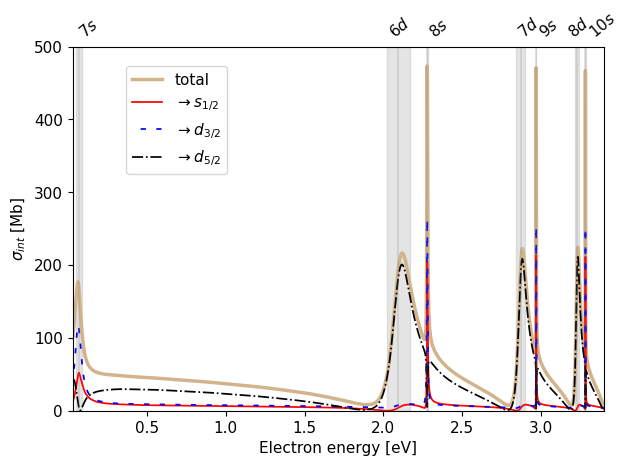

In [5]:
# one-photon cross-section

fontsize = "11"

import fortran_output_analysis.onephoton.onephoton_cross_sections as cs

# data for the first (7s) resonance in radon
one_photon_first_res = OnePhoton(atom_name)
path_to_data_first_res = "D:\\photoionization_analysis\\fortran_data\\radon_first_res\\"
one_photon_first_res.load_hole(hole_n_6p3half, hole_kappa_6p3half, path_to_data_first_res)
en_first_res, cs_data_tot_first_res = cs.get_total_integrated_cross_section_for_hole(one_photon_first_res, hole_n_6p3half, hole_kappa_6p3half)
en_first_res, cs_data_s_1_first_res = cs.get_partial_integrated_cross_section_1_channel(one_photon_first_res, hole_n_6p3half, hole_kappa_6p3half, -1)
en_first_res, cs_data_d_3_first_res = cs.get_partial_integrated_cross_section_1_channel(one_photon_first_res, hole_n_6p3half, hole_kappa_6p3half, 2)
en_first_res, cs_data_d_5_first_res = cs.get_partial_integrated_cross_section_1_channel(one_photon_first_res, hole_n_6p3half, hole_kappa_6p3half, -3)

# data for the other 3 pairs of resonances
en, cs_data_tot = cs.get_total_integrated_cross_section_for_hole(one_photon_abs, hole_n_6p3half, hole_kappa_6p3half)
en, cs_data_s_1= cs.get_partial_integrated_cross_section_1_channel(one_photon_abs, hole_n_6p3half, hole_kappa_6p3half, -1)
en, cs_data_d_3 = cs.get_partial_integrated_cross_section_1_channel(one_photon_abs, hole_n_6p3half, hole_kappa_6p3half, 2)
en, cs_data_d_5 = cs.get_partial_integrated_cross_section_1_channel(one_photon_abs, hole_n_6p3half, hole_kappa_6p3half, -3)

region_mask = np.logical_and(en >= 1.95, en < 3.5)
region_mask_first_res = np.logical_and(en_first_res < 1.95, en_first_res > 0)

en_concat = np.concatenate((en_first_res[region_mask_first_res], en[region_mask]))
cs_data_tot_concat = np.concatenate((cs_data_tot_first_res[region_mask_first_res], cs_data_tot[region_mask]))
cs_data_s_1_concat = np.concatenate((cs_data_s_1_first_res[region_mask_first_res], cs_data_s_1[region_mask]))
cs_data_d_3_concat = np.concatenate((cs_data_d_3_first_res[region_mask_first_res], cs_data_d_3[region_mask]))
cs_data_d_5_concat = np.concatenate((cs_data_d_5_first_res[region_mask_first_res], cs_data_d_5[region_mask]))

# default blue color in matplotlib
default_blue = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]

plt.plot(en_concat, cs_data_tot_concat, linewidth=2.5, color="tan", label="total");
plt.plot(en_concat, cs_data_s_1_concat, "-", linewidth=1.25, color="red", label="$\\to s_{1/2}$");
plt.plot(en_concat, cs_data_d_3_concat, linestyle=(4, (3, 6)), linewidth=1.25, color="blue", label="$\\to d_{3/2}$");
plt.plot(en_concat, cs_data_d_5_concat, "-.", linewidth=1.25, color="black", label="$\\to d_{5/2}$");

plt.xticks([0.5 * i for i in range(7)], fontsize=fontsize);
plt.yticks([100 * i for i in range(6)], fontsize=fontsize);
plt.legend(fontsize=fontsize, loc =(0.1, 0.65));

ax= plt.gca()
ymin, ymax = ax.get_ylim()
ymin = 0
ax.set_ylim([ymin, ymax])
ax.set_ymargin(0)
ax.set_xmargin(0)
for i, (r, width, name, _) in enumerate(rn_resonances):
	# if i > 1:
	# 	break
	# r = res + 1.55
	plt.fill_betweenx([ymin, ymax], r-width/2,r+width/2, color="gray", alpha=.2)
	ax.plot([r, r],[ymin,ymax], color="gray",alpha=.2)
	if name == "$8d$":
		ax.text((r - 2.4 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
	elif name == "$10s$":
		ax.text((r + 4.8 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
	else:
		ax.text((r - width/2), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)

plt.tight_layout()
plt.xlabel("Electron energy [eV]", fontsize=fontsize);
plt.ylabel("$\\sigma_{int}$ [Mb]", fontsize=fontsize);
plt.savefig("Radon_total_cs.pdf", format="pdf", bbox_inches="tight")

In [6]:
import fortran_output_analysis.complex_q_parameter as complex_q

E_0 [eV]:  0


E_res_6d [eV]:  12.843547703790746
width_res_6d [eV]:  0.14879203616447498
q_6d:  2.9094973930620203
sigma_0_6d:  21.98850430142637
sigma_bg_6d:  8.3628208019601


E_res_8s [eV]:  13.027117921895856
width_res_8s [eV]:  0.005705524620122138
q_8s:  9.43586187413994
sigma_0_8s:  4.093231603057859
sigma_bg_8s:  101.53759132238474


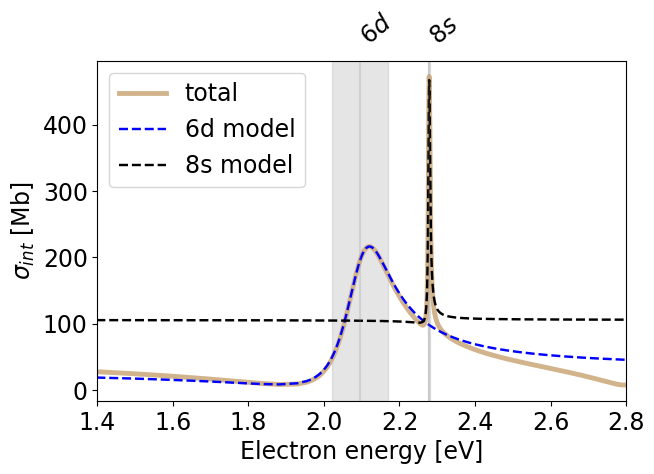

In [7]:
# test approximation formula for the photoelectron cross-section, 6d and 8s resonances
# NOTE: all energy-dependent variables are provided in eV


fontsize = "17"

# index corresponding to the 6d resonance in the resonance_data list
res_id_6d = 1

# index corresponding to the 6d resonance in the resonance_data list
res_id_8s = 2

# ground state energy is zero since everything is computed relative to that energy
E_0 = 0
print("E_0 [eV]: ", E_0)
print("\n")

# cross-section constant, already contains conversion to Mbarn
au_to_Mbarn = 5.29177210903 ** 2
C = 4 * np.pi / 3 * fine_structure * au_to_Mbarn

# calculate total photoemission cross-section
ekin, cs_tot = cs.get_total_integrated_cross_section_for_hole(one_photon_abs, hole_n_6p3half, hole_kappa_6p3half)
ekin_first_res, cs_tot_first_res = cs.get_total_integrated_cross_section_for_hole(one_photon_first_res, hole_n_6p3half, hole_kappa_6p3half)
region_mask = np.logical_and(en >= 1.95, en < 3.5)
region_mask_first_res = np.logical_and(en_first_res < 1.95, en_first_res > 0)

cs_tot_concat = np.concatenate((cs_tot_first_res[region_mask_first_res], cs_tot[region_mask]))
ekin_concat = np.concatenate((ekin_first_res[region_mask_first_res], ekin[region_mask]))

# calculate 6d resonance contribution
E_res_6d = resonance_data[res_id_6d][1] * g_eV_per_Hartree
width_res_6d = resonance_data[res_id_6d][2] * 2 * g_eV_per_Hartree
print("E_res_6d [eV]: ", E_res_6d)
print("width_res_6d [eV]: ", width_res_6d)

M_R_6d = resonance_data[res_id_6d][3] 
M_I_6d = resonance_data[res_id_6d][4]
M_6d = M_R_6d + 1j * M_I_6d
M_6d_squar = M_6d * M_6d 
R_6d = np.real(M_6d_squar)
I_6d = np.imag(M_6d_squar)
b_6d = ((E_res_6d - E_0) / (width_res_6d / 2) * R_6d / I_6d + 1) / (R_6d / I_6d - (E_res_6d - E_0) / (width_res_6d / 2))

if np.sign(I_6d) > 0:
    q_6d = b_6d - np.sqrt(b_6d ** 2 + 1) 
else:
    q_6d = b_6d + np.sqrt(b_6d ** 2 + 1) 
print("q_6d: ", q_6d)

# sigma_0_6d = - I_6d * C / (2 * q_6d) * ((E_res_6d - E_0) / (width_res_6d / 2) - R_6d / I_6d)
# sigma_bg_6d = (
#     C * I_6d / (1 + (-q_6d) ** 2) * (-q_6d + (E_res_6d - E_0) / (width_res_6d / 2)) * (R_6d / I_6d - (-q_6d))
# )
# sigma_bg_6d = 0

eps_6d = complex_q.get_epsilon(ekin_concat, "abs", 0, E_res_6d - E_binding, width_res_6d)
sigma_bg_6d = np.interp(-q_6d, eps_6d, cs_tot_concat)
eps_6d_point = 1 / q_6d
sigma_0_6d = (
    (np.interp(eps_6d_point, eps_6d, cs_tot_concat) - sigma_bg_6d) * (eps_6d_point ** 2 + 1) / (eps_6d_point + q_6d) ** 2
)
print("sigma_0_6d: ", sigma_0_6d)
print("sigma_bg_6d: ", sigma_bg_6d)
cs_6d_approx = sigma_0_6d * ((eps_6d + q_6d) ** 2) / (eps_6d ** 2 + 1) + sigma_bg_6d

print("\n")
# calculate 8s resonance contribution
E_res_8s = resonance_data[res_id_8s][1] * g_eV_per_Hartree
width_res_8s = resonance_data[res_id_8s][2] * 2 * g_eV_per_Hartree
print("E_res_8s [eV]: ", E_res_8s)
print("width_res_8s [eV]: ", width_res_8s)

M_R_8s = resonance_data[res_id_8s][3] 
M_I_8s = resonance_data[res_id_8s][4]
M_8s = M_R_8s + 1j * M_I_8s
M_8s_squar = M_8s * M_8s 
R_8s = np.real(M_8s_squar)
I_8s = np.imag(M_8s_squar)
b_8s = ((E_res_8s - E_0) / (width_res_8s / 2) * R_8s / I_8s + 1) / (R_8s / I_8s - (E_res_8s - E_0) / (width_res_8s / 2))

if np.sign(I_8s) > 0:
    q_8s = b_8s - np.sqrt(b_8s ** 2 + 1) 
else:
    q_8s = b_8s + np.sqrt(b_8s ** 2 + 1) 
print("q_8s: ", q_8s)

eps_8s = complex_q.get_epsilon(ekin_concat, "abs", 0, E_res_8s - E_binding, width_res_8s)
sigma_bg_8s = np.interp(-q_8s, eps_8s, cs_tot_concat)
eps_8s_point = 1 / q_8s
sigma_0_8s = (
    (np.interp(eps_8s_point, eps_8s, cs_tot_concat) - sigma_bg_8s) * (eps_8s_point ** 2 + 1) / (eps_8s_point + q_8s) ** 2
)
print("sigma_0_8s: ", sigma_0_8s)
print("sigma_bg_8s: ", sigma_bg_8s)
cs_8s_approx = sigma_0_8s * ((eps_8s + q_8s) ** 2) / (eps_8s ** 2 + 1) + sigma_bg_8s

default_blue = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
plt.plot(ekin_concat, cs_tot_concat, color="tan", linewidth=3.5, label="total");
plt.plot(ekin_concat, cs_6d_approx, "--", color="blue", linewidth=1.75, label="6d model");
plt.plot(ekin_concat, cs_8s_approx, "--", color="black", linewidth=1.75, label="8s model");

ax= plt.gca()
ymin, ymax = ax.get_ylim()
ax.set_ymargin(0)
ax.set_xmargin(0)
for i, (r, width, name, _) in enumerate(rn_resonances[res_id_6d: res_id_8s + 1]):
	# if i > 1:
	# 	break
	# r = res + 1.55
	plt.fill_betweenx([ymin, ymax], r-width/2,r+width/2, color="gray", alpha=.2)
	ax.plot([r, r],[ymin,ymax], color="gray",alpha=.2)
	ax.text((r - 0.01), ymax+(ymax-ymin)/20, name, rotation=40, fontsize=fontsize)

plt.tight_layout()

plt.legend(fontsize=fontsize);
# plt.title("Photoemission cross-section, $\\sigma_0$ formula");
plt.xlabel("Electron energy [eV]", fontsize=fontsize);
plt.ylabel("$\\sigma_{int}$ [Mb]", fontsize=fontsize);
# plt.xticks([0.2 + i * 0.1 for i in range(5)]);
plt.xlim([1.4, 2.8]);
plt.xticks(fontsize=fontsize);
plt.yticks(fontsize=fontsize);
plt.savefig(f"cs_model_6d_and_8s.pdf", format="pdf", bbox_inches="tight")

E_0 [eV]:  0


E_res_7d [eV]:  13.619822998601448
width_res_7d [eV]:  0.06251105593457265
q_7d:  2.7001908623742366
sigma_0_7d:  25.912236993326502
sigma_bg_7d:  7.680547715784217


E_res_9s [eV]:  13.718572900045997
width_res_9s [eV]:  0.0020724510802121363
q_9s:  9.54947493491526
sigma_0_9s:  4.126667522000628
sigma_bg_9s:  83.2583379377624


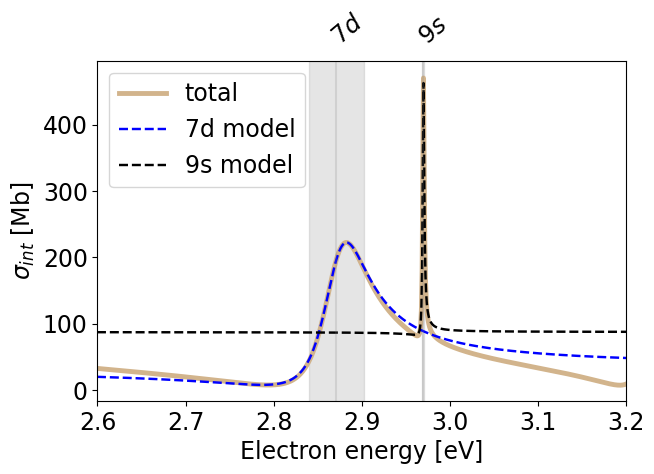

In [8]:
# test approximation formula for the photoelectron cross-section, 7d and 9s resonances
# NOTE: all energy-dependent variables are provided in eV


fontsize = "17"

# index corresponding to the 7d resonance in the resonance_data list
res_id_7d = 3

# index corresponding to the 7d resonance in the resonance_data list
res_id_9s = 4

# ground state energy is zero since everything is computed relative to that energy
E_0 = 0
print("E_0 [eV]: ", E_0)
print("\n")

# cross-section constant, already contains conversion to Mbarn
au_to_Mbarn = 5.29177210903 ** 2
C = 4 * np.pi / 3 * fine_structure * au_to_Mbarn

# calculate total photoemission cross-section
ekin, cs_tot = cs.get_total_integrated_cross_section_for_hole(one_photon_abs, hole_n_6p3half, hole_kappa_6p3half)

# calculate 7d resonance contribution
E_res_7d = resonance_data[res_id_7d][1] * g_eV_per_Hartree
width_res_7d = resonance_data[res_id_7d][2] * 2 * g_eV_per_Hartree
print("E_res_7d [eV]: ", E_res_7d)
print("width_res_7d [eV]: ", width_res_7d)

M_R_7d = resonance_data[res_id_7d][3] 
M_I_7d = resonance_data[res_id_7d][4]
M_7d = M_R_7d + 1j * M_I_7d
M_7d_squar = M_7d * M_7d 
R_7d = np.real(M_7d_squar)
I_7d = np.imag(M_7d_squar)
b_7d = ((E_res_7d - E_0) / (width_res_7d / 2) * R_7d / I_7d + 1) / (R_7d / I_7d - (E_res_7d - E_0) / (width_res_7d / 2))

if np.sign(I_7d) > 0:
    q_7d = b_7d - np.sqrt(b_7d ** 2 + 1) 
else:
    q_7d = b_7d + np.sqrt(b_7d ** 2 + 1) 
print("q_7d: ", q_7d)

# sigma_0_7d = - I_7d * C / (2 * q_7d) * ((E_res_7d - E_0) / (width_res_7d / 2) - R_7d / I_7d)
# sigma_bg_7d = (
#     C * I_7d / (1 + (-q_7d) ** 2) * (-q_7d + (E_res_7d - E_0) / (width_res_7d / 2)) * (R_7d / I_7d - (-q_7d))
# )
# sigma_bg_7d = 0

eps_7d = complex_q.get_epsilon(ekin, "abs", 0, E_res_7d - E_binding, width_res_7d)
sigma_bg_7d = np.interp(-q_7d, eps_7d, cs_tot)
eps_7d_point = 1 / q_7d
sigma_0_7d = (
    (np.interp(eps_7d_point, eps_7d, cs_tot) - sigma_bg_7d) * (eps_7d_point ** 2 + 1) / (eps_7d_point + q_7d) ** 2
)
print("sigma_0_7d: ", sigma_0_7d)
print("sigma_bg_7d: ", sigma_bg_7d)
cs_7d_approx = sigma_0_7d * ((eps_7d + q_7d) ** 2) / (eps_7d ** 2 + 1) + sigma_bg_7d

print("\n")
# calculate 9s resonance contribution
E_res_9s = resonance_data[res_id_9s][1] * g_eV_per_Hartree
width_res_9s = resonance_data[res_id_9s][2] * 2 * g_eV_per_Hartree
print("E_res_9s [eV]: ", E_res_9s)
print("width_res_9s [eV]: ", width_res_9s)

M_R_9s = resonance_data[res_id_9s][3] 
M_I_9s = resonance_data[res_id_9s][4]
M_9s = M_R_9s + 1j * M_I_9s
M_9s_squar = M_9s * M_9s 
R_9s = np.real(M_9s_squar)
I_9s = np.imag(M_9s_squar)
b_9s = ((E_res_9s - E_0) / (width_res_9s / 2) * R_9s / I_9s + 1) / (R_9s / I_9s - (E_res_9s - E_0) / (width_res_9s / 2))

if np.sign(I_9s) > 0:
    q_9s = b_9s - np.sqrt(b_9s ** 2 + 1) 
else:
    q_9s = b_9s + np.sqrt(b_9s ** 2 + 1) 
print("q_9s: ", q_9s)

eps_9s = complex_q.get_epsilon(ekin, "abs", 0, E_res_9s - E_binding, width_res_9s)
sigma_bg_9s = np.interp(-q_9s, eps_9s, cs_tot)
eps_9s_point = 1 / q_9s
sigma_0_9s = (
    (np.interp(eps_9s_point, eps_9s, cs_tot) - sigma_bg_9s) * (eps_9s_point ** 2 + 1) / (eps_9s_point + q_9s) ** 2
)
print("sigma_0_9s: ", sigma_0_9s)
print("sigma_bg_9s: ", sigma_bg_9s)
cs_9s_approx = sigma_0_9s * ((eps_9s + q_9s) ** 2) / (eps_9s ** 2 + 1) + sigma_bg_9s

plt.plot(ekin, cs_tot, linewidth=3.5, color="tan", label="total");
plt.plot(ekin, cs_7d_approx, "--", color="blue", linewidth=1.75, label="7d model");
plt.plot(ekin, cs_9s_approx, "--", color="black", linewidth=1.75, label="9s model");


ax= plt.gca()
ymin, ymax = ax.get_ylim()
ax.set_ymargin(0)
ax.set_xmargin(0)
for i, (r, width, name, _) in enumerate(rn_resonances[res_id_7d: res_id_9s + 1]):
	# if i > 1:
	# 	break
	# r = res + 1.55
	plt.fill_betweenx([ymin, ymax], r-width/2,r+width/2, color="gray", alpha=.2)
	ax.plot([r, r],[ymin,ymax], color="gray",alpha=.2)
	ax.text((r - 0.01), ymax+(ymax-ymin)/20, name, rotation=40, fontsize=fontsize)

plt.tight_layout()

plt.legend(fontsize=fontsize);
# plt.title("Photoemission cross-section, $\\sigma_0$ formula");
plt.xlabel("Electron energy [eV]", fontsize=fontsize);
plt.ylabel("$\\sigma_{int}$ [Mb]", fontsize=fontsize);
# plt.xticks([2.55 + i * 0.1 for i in range(8)]);
plt.xlim([2.6, 3.2]);
plt.xticks(fontsize=fontsize);
plt.yticks(fontsize=fontsize);
plt.savefig(f"cs_model_7d_and_9s.pdf", format="pdf", bbox_inches="tight")

E_0 [eV]:  0


E_res_8d [eV]:  13.97776610667091
width_res_8d [eV]:  0.029986744986551822
q_8d:  2.623209649139928
sigma_0_8d:  27.55340937950987
sigma_bg_8d:  7.395878191232582


E_res_10s [eV]:  14.031179472055383
width_res_10s [eV]:  0.0009969451349628059
q_10s:  9.636887522843097
sigma_0_10s:  3.9527917583413403
sigma_bg_10s:  77.15188674841336


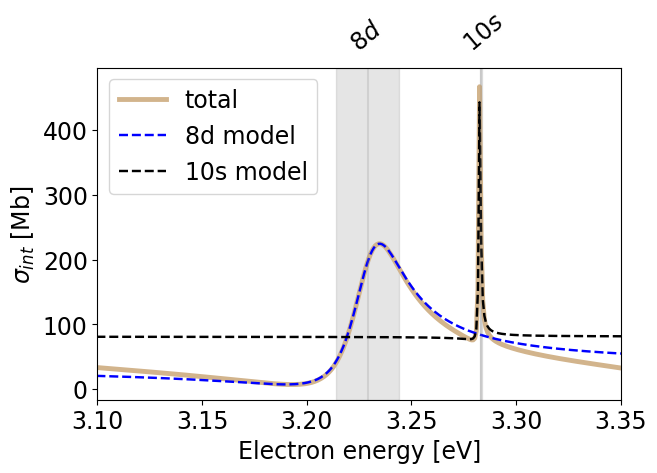

In [9]:
# test approximation formula for the photoelectron cross-section, 8d and 10s resonances
# NOTE: all energy-dependent variables are provided in eV


fontsize = "17"

# index corresponding to the 8d resonance in the resonance_data list
res_id_8d = 5

# index corresponding to the 8d resonance in the resonance_data list
res_id_10s = 6

# ground state energy is zero since everything is computed relative to that energy
E_0 = 0
print("E_0 [eV]: ", E_0)
print("\n")

# cross-section constant, already contains conversion to Mbarn
au_to_Mbarn = 5.29177210903 ** 2
C = 4 * np.pi / 3 * fine_structure * au_to_Mbarn

# calculate total photoemission cross-section
ekin, cs_tot = cs.get_total_integrated_cross_section_for_hole(one_photon_abs, hole_n_6p3half, hole_kappa_6p3half)

# calculate 8d resonance contribution
E_res_8d = resonance_data[res_id_8d][1] * g_eV_per_Hartree
width_res_8d = resonance_data[res_id_8d][2] * 2 * g_eV_per_Hartree
print("E_res_8d [eV]: ", E_res_8d)
print("width_res_8d [eV]: ", width_res_8d)

M_R_8d = resonance_data[res_id_8d][3] 
M_I_8d = resonance_data[res_id_8d][4]
M_8d = M_R_8d + 1j * M_I_8d
M_8d_squar = M_8d * M_8d 
R_8d = np.real(M_8d_squar)
I_8d = np.imag(M_8d_squar)
b_8d = ((E_res_8d - E_0) / (width_res_8d / 2) * R_8d / I_8d + 1) / (R_8d / I_8d - (E_res_8d - E_0) / (width_res_8d / 2))

if np.sign(I_8d) > 0:
    q_8d = b_8d - np.sqrt(b_8d ** 2 + 1) 
else:
    q_8d = b_8d + np.sqrt(b_8d ** 2 + 1) 
print("q_8d: ", q_8d)

# sigma_0_8d = - I_8d * C / (2 * q_8d) * ((E_res_8d - E_0) / (width_res_8d / 2) - R_8d / I_8d)
# sigma_bg_8d = (
#     C * I_8d / (1 + (-q_8d) ** 2) * (-q_8d + (E_res_8d - E_0) / (width_res_8d / 2)) * (R_8d / I_8d - (-q_8d))
# )
# sigma_bg_8d = 0

eps_8d = complex_q.get_epsilon(ekin, "abs", 0, E_res_8d - E_binding, width_res_8d)
sigma_bg_8d = np.interp(-q_8d, eps_8d, cs_tot)
eps_8d_point = 1 / q_8d
sigma_0_8d = (
    (np.interp(eps_8d_point, eps_8d, cs_tot) - sigma_bg_8d) * (eps_8d_point ** 2 + 1) / (eps_8d_point + q_8d) ** 2
)
print("sigma_0_8d: ", sigma_0_8d)
print("sigma_bg_8d: ", sigma_bg_8d)
cs_8d_approx = sigma_0_8d * ((eps_8d + q_8d) ** 2) / (eps_8d ** 2 + 1) + sigma_bg_8d

print("\n")
# calculate 10s resonance contribution
E_res_10s = resonance_data[res_id_10s][1] * g_eV_per_Hartree
width_res_10s = resonance_data[res_id_10s][2] * 2 * g_eV_per_Hartree
print("E_res_10s [eV]: ", E_res_10s)
print("width_res_10s [eV]: ", width_res_10s)

M_R_10s = resonance_data[res_id_10s][3] 
M_I_10s = resonance_data[res_id_10s][4]
M_10s = M_R_10s + 1j * M_I_10s
M_10s_squar = M_10s * M_10s 
R_10s = np.real(M_10s_squar)
I_10s = np.imag(M_10s_squar)
b_10s = ((E_res_10s - E_0) / (width_res_10s / 2) * R_10s / I_10s + 1) / (R_10s / I_10s - (E_res_10s - E_0) / (width_res_10s / 2))

if np.sign(I_10s) > 0:
    q_10s = b_10s - np.sqrt(b_10s ** 2 + 1) 
else:
    q_10s = b_10s + np.sqrt(b_10s ** 2 + 1) 
print("q_10s: ", q_10s)

eps_10s = complex_q.get_epsilon(ekin, "abs", 0, E_res_10s - E_binding, width_res_10s)
sigma_bg_10s = np.interp(-q_10s, eps_10s, cs_tot)
eps_10s_point = 1 / q_10s
sigma_0_10s = (
    (np.interp(eps_10s_point, eps_10s, cs_tot) - sigma_bg_10s) * (eps_10s_point ** 2 + 1) / (eps_10s_point + q_10s) ** 2
)
print("sigma_0_10s: ", sigma_0_10s)
print("sigma_bg_10s: ", sigma_bg_10s)
cs_10s_approx = sigma_0_10s * ((eps_10s + q_10s) ** 2) / (eps_10s ** 2 + 1) + sigma_bg_10s

plt.plot(ekin, cs_tot, linewidth=3.5, color="tan", label="total");
plt.plot(ekin, cs_8d_approx, "--", color="blue", linewidth=1.75, label="8d model");
plt.plot(ekin, cs_10s_approx, "--", color="black", linewidth=1.75, label="10s model");


ax= plt.gca()
ymin, ymax = ax.get_ylim()
ax.set_ymargin(0)
ax.set_xmargin(0)
for i, (r, width, name, _) in enumerate(rn_resonances[res_id_8d: res_id_10s + 1]):
	# if i > 1:
	# 	break
	# r = res + 1.55
	plt.fill_betweenx([ymin, ymax], r-width/2,r+width/2, color="gray", alpha=.2)
	ax.plot([r, r],[ymin,ymax], color="gray",alpha=.2)
	ax.text((r - 0.01), ymax+(ymax-ymin)/20, name, rotation=40, fontsize=fontsize)

plt.tight_layout()

plt.legend(fontsize=fontsize);
# plt.title("Photoemission cross-section, $\\sigma_0$ formula");
plt.xlabel("Electron energy [eV]", fontsize=fontsize);
plt.ylabel("$\\sigma_{int}$ [Mb]", fontsize=fontsize);
# plt.xticks([0.2 + i * 0.1 for i in range(5)]);
plt.xlim([3.1, 3.35]);
plt.xticks([3.1 + i * 0.05 for i in range(6)],fontsize=fontsize);
plt.yticks(fontsize=fontsize);
plt.savefig(f"cs_model_8d_and_10s.pdf", format="pdf", bbox_inches="tight")

In [10]:
Z = 1

In [11]:
# import fortran_output_analysis.onephoton.onephoton_utilities as utils_1ph
# import fortran_output_analysis.onephoton.onephoton_asymmetry_parameters as asymp_1ph

# M_1ph = utils_1ph.get_matrix_elements_with_coulomb_phase(
#     one_photon_abs, 
#     hole_n_6p3half, 
#     hole_kappa_6p3half, 
#     Z
# )

# ekin = utils_1ph.get_electron_kinetic_energy_eV(
#     one_photon_abs, 
#     hole_n_6p3half, 
#     hole_kappa_6p3half
# )

# plt.figure("1")
# for i in range(3):
#     M_1ph_channel = M_1ph.copy()
#     for j in range(3):
#         if j != i:
#             M_1ph_channel[j, :] = 0.0 + 1j * 0.0
#     plt.plot(ekin, np.abs(M_1ph_channel[i, :]) ** 2)

# plt.figure("2")
# for i in range(3):
#     M_1ph_channel = M_1ph.copy()
#     for j in range(3):
#         if j != i:
#             M_1ph_channel[j, :] = 0.0 + 1j * 0.0

#     b2_channel, _ = asymp_1ph.one_photon_asymmetry_parameter(
#         hole_kappa_6p3half,
#         M_1ph_channel,
#         M_1ph_channel,
#         "abs"
#     )
#     plt.plot(ekin, b2_channel)



In [12]:
def blue_red_cmap(pts):
	return ['#%02x%02x%02x' % (int(r), int(g), int(b)) for [r, g, b] in np.array([np.linspace(0, 255, pts), np.zeros(pts), np.linspace(255, 0, pts)]).T]

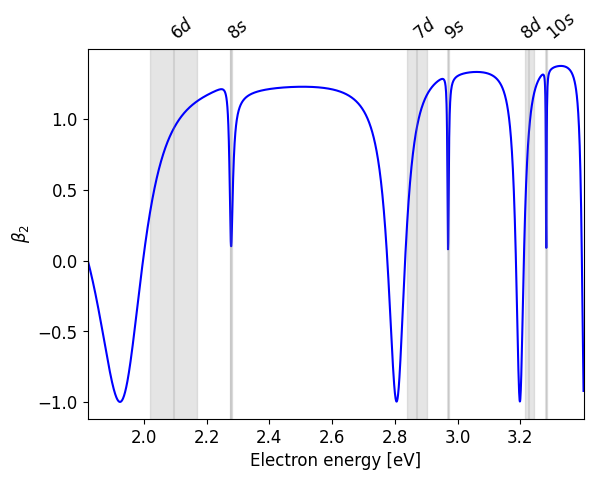

In [13]:
# real asymmetry parameter b2 and angular part of the cross-section

fontsize = "12"

import fortran_output_analysis.onephoton.onephoton_asymmetry_parameters as asym_p

# compute real asymmetry parameter
en, b2_real = asym_p.get_real_asymmetry_parameter(
    one_photon_abs, hole_n_6p3half, hole_kappa_6p3half, Z
)
en_low_en, b2_real_low_en = asym_p.get_real_asymmetry_parameter(
    one_photon_low_en, hole_n_6p3half, hole_kappa_6p3half, Z
)

region_mask = np.logical_and(en >= 1.95, en < 3.5)
region_mask_low_en = np.logical_and(en_low_en >= 1.82, en_low_en < 1.95)

en_concat = np.concatenate((en_low_en[region_mask_low_en], en[region_mask]))
b2_real_concat = np.concatenate((b2_real_low_en[region_mask_low_en], b2_real[region_mask]))

default_blue = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
plt.plot(en_concat, b2_real_concat, color="blue")
plt.ylabel("$\\beta_2$")
plt.xlabel("Electron energy [eV]")
ax= plt.gca()
ymin, ymax = ax.get_ylim()
ax.set_ymargin(0)
ax.set_xmargin(0)
for i, (r, width, name, _) in enumerate(rn_resonances[1:]):
	plt.fill_betweenx([ymin, ymax], r-width/2,r+width/2, color="gray", alpha=.2)
	ax.plot([r, r],[ymin,ymax], color="gray",alpha=.2)
	if name == "$8d$":
		ax.text((r - 1.2 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
	elif name == "$10s$":
		ax.text((r - 8.5 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
	else:
		ax.text((r - 0.02), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
      
plt.xlabel("Electron energy [eV]", fontsize=fontsize);
plt.ylabel("$\\beta_2$", fontsize=fontsize);

plt.xticks([2.0 + i * 0.2 for i in range(7)],fontsize=fontsize);
plt.yticks(fontsize=fontsize);
# plt.xlim([1.8, 3.42]);
plt.ylim([ymin, ymax]);
# plt.legend(fontsize=fontsize, loc=(0.25, 0.02));
plt.savefig(f"b2_param_cs.pdf", format="pdf", bbox_inches="tight")

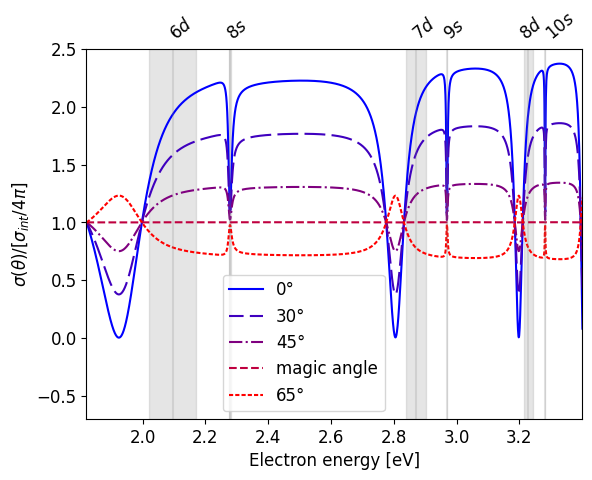

In [14]:
# real asymmetry parameter b2 and angular part of the cross-section

fontsize = "12"

# specify angles to compute angular part of the hole's cross section
angles = np.array([0, 30, 45, 54.7, 65])

# angular part of the cross section for 5p_3/2
en, ang_cs = cs.get_angular_part_of_cross_section(
    one_photon_abs, hole_n_6p3half, hole_kappa_6p3half, Z, angles
)
en_low_en, ang_cs_low_en = cs.get_angular_part_of_cross_section(
    one_photon_low_en, hole_n_6p3half, hole_kappa_6p3half, Z, angles 
)
region_mask_low_en = np.logical_and(en_low_en >= 1.82, en_low_en < 1.95)
region_mask = np.logical_and(en >= 1.95, en < 3.5)


en_concat = np.concatenate((en_low_en[region_mask_low_en], en[region_mask]))
ang_cs_concat = np.zeros((len(angles), len(en_concat)))

for i in range(len(angles)):
	ang_cs_concat[i, :] = np.concatenate((ang_cs_low_en[i, region_mask_low_en], ang_cs[i, region_mask]))

labels = ["0°", "30°", "45°", "magic angle", "65°"]
line_styles = ["solid", (3, (10, 3)), "dashdot", "dashed", (3, (2, 1))]

cmap = blue_red_cmap(5)
for i in range(len(angles)):
	plt.plot(en_concat, ang_cs_concat[i, :], label=labels[i], linestyle = line_styles[i], color=cmap[i])

ax= plt.gca()
ymin, ymax = ax.get_ylim()
ymin = -0.7
ymax = 2.5
ax.set_ymargin(0)
ax.set_xmargin(0)
plt.legend(fontsize="10", loc=(0.2, 0.05));
for i, (r, width, name, _) in enumerate(rn_resonances[1:]):
	plt.fill_betweenx([ymin, ymax], r-width/2,r+width/2, color="gray", alpha=.2)
	ax.plot([r, r],[ymin,ymax], color="gray",alpha=.2)
	if name == "$8d$":
		ax.text((r - 1.2 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
	elif name == "$10s$":
		ax.text((r - 8.5 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
	else:
		ax.text((r - 0.02), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
plt.xlabel("Electron energy [eV]", fontsize=fontsize);
plt.ylabel("$\\sigma(\\theta) / [\\sigma_{int} / 4\\pi$]", fontsize=fontsize);

plt.xticks([2.0 + i * 0.2 for i in range(7)],fontsize=fontsize);
plt.yticks(fontsize=fontsize);
plt.ylim([ymin, ymax]);
# plt.xlim([1.8, 3.5]);
plt.legend(fontsize=fontsize, loc=(0.275, 0.02));


plt.savefig(f"cs_ang_part.pdf", format="pdf", bbox_inches="tight")

In [15]:
import fortran_output_analysis.onephoton.onephoton_delays_and_phases as wigner
import fortran_output_analysis.twophotons.twophotons_delays_and_phases as atomic

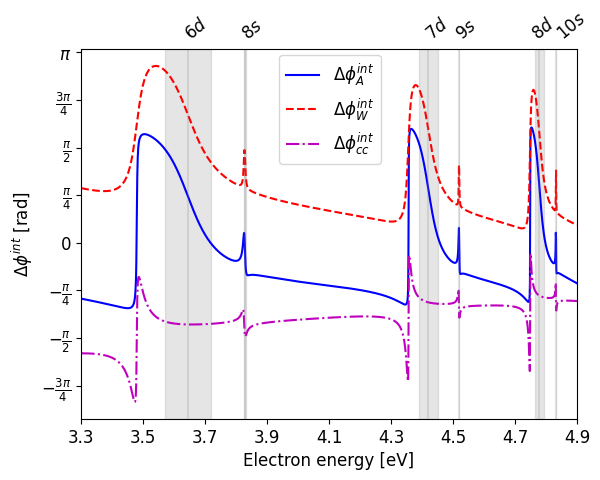

In [16]:
# integrated phases

fontsize = "12"

en, phase_int_a = atomic.get_integrated_atomic_phase(
    two_photons_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_abs,
    energies_mode="abs"
)

en_low_en, phase_int_a_low_en = atomic.get_integrated_atomic_phase(
    two_photons_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_low_en,
    energies_mode="abs"
)

en, phase_int_w = wigner.get_integrated_wigner_phase(
    one_photon_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    g_omega_IR_1=g_omega_IR,
    one_photon_2=one_photon_abs,
    g_omega_IR_2=g_omega_IR,
    energies_mode="abs"
)

en_low_en, phase_int_w_low_en = wigner.get_integrated_wigner_phase(
    one_photon_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    g_omega_IR_1=g_omega_IR,
    one_photon_2=one_photon_low_en,
    g_omega_IR_2=g_omega_IR,
    energies_mode="abs"
)

region_mask = np.logical_and(en >= 3.5, en < 4.9)
region_mask_low_en = np.logical_and(en_low_en >= 3.3, en_low_en < 3.5)


en_concat = np.concatenate((en_low_en[region_mask_low_en], en[region_mask]))
phase_int_a_concat = np.concatenate((phase_int_a_low_en[region_mask_low_en], phase_int_a[region_mask]))
phase_int_w_concat = np.concatenate((phase_int_w_low_en[region_mask_low_en], phase_int_w[region_mask]))

default_color = plt.rcParams['axes.prop_cycle'].by_key()['color']

line_styles = ["solid", "dashed",  "dashdot", (3, (2, 1))]

plt.plot(en_concat, phase_int_a_concat, color="blue", linestyle=line_styles[0], label="$\\Delta \\phi_A^{int}$")
plt.plot(en_concat, phase_int_w_concat, color="red", linestyle=line_styles[1], label="$\\Delta \\phi_W^{int}$")
plt.plot(en_concat, phase_int_a_concat - phase_int_w_concat, color="m", linestyle=line_styles[2], label="$\\Delta \\phi_{cc}^{int}$")
plt.legend(fontsize=fontsize, loc=(0.4, 0.69));

ax= plt.gca()
ymin, ymax = ax.get_ylim()
ax.set_ymargin(0)
ax.set_xmargin(0)
for i, (r, width, name, _) in enumerate(rn_resonances[1:]):
    r += g_omega_IR_eV
    plt.fill_betweenx([ymin, ymax], r-width/2,r+width/2, color="gray", alpha=.2)
    ax.plot([r, r],[ymin,ymax], color="gray",alpha=.2)
    if name == "$8d$":
        ax.text((r - 1.2 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    elif name == "$10s$":
        ax.text((r - 8.5 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    else:
        ax.text((r - 0.02), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)

plt.xlabel("Electron energy [eV]", fontsize=fontsize);
plt.ylabel("$\\Delta \\phi^{int}$ [rad]", fontsize=fontsize);


major = Multiple(4, np.pi, '\\pi')
minor = Multiple(16, np.pi, '\\pi')
ax.yaxis.set_major_locator(major.locator())
ax.yaxis.set_major_formatter(major.formatter())

plt.xticks([3.3 + i * 0.2 for i in range(9)],fontsize=fontsize);
plt.yticks(fontsize=fontsize);
plt.ylim([ymin, ymax]);

plt.savefig(f"int_phases.pdf", format="pdf", bbox_inches="tight")

In [17]:
import fortran_output_analysis.onephoton.onephoton_utilities as utils_1ph
import fortran_output_analysis.onephoton.onephoton_delays_and_phases as wigner

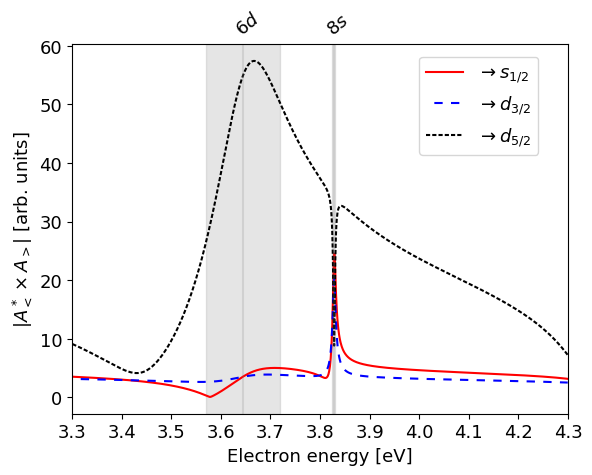

In [18]:
# channels contributions 1ph

fontsize = "13"

en, M_emi_matched, M_abs_matched = utils_1ph.get_prepared_matrices(
    one_photon_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    g_omega_IR,
    one_photon_2=one_photon_abs,
    g_omega_IR_2=g_omega_IR,
    energies_mode="abs"
)

en_low_en, M_emi_matched_low_en, M_abs_matched_low_en = utils_1ph.get_prepared_matrices(
    one_photon_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    g_omega_IR,
    one_photon_2=one_photon_low_en,
    g_omega_IR_2=g_omega_IR,
    energies_mode="abs"
)

region_mask = np.logical_and(en >= 3.5, en < 4.9)
region_mask_low_en = np.logical_and(en_low_en >= 3.3, en_low_en < 3.5)


en_concat = np.concatenate((en_low_en[region_mask_low_en], en[region_mask]))
M_emi_matched_concat = np.zeros((3, len(en_concat)), dtype=np.complex128)
M_abs_matched_concat = np.zeros((3, len(en_concat)), dtype=np.complex128)
for i in range(3):
    M_emi_matched_concat[i, :] = np.concatenate((M_emi_matched_low_en[i, region_mask_low_en], M_emi_matched[i, region_mask]))
    M_abs_matched_concat[i, :] = np.concatenate((M_abs_matched_low_en[i, region_mask_low_en], M_abs_matched[i, region_mask]))


int_intens_arr = np.zeros((3, len(en_concat)), dtype=np.complex128)

for i in range(3):
    M_emi_channel = M_emi_matched_concat.copy()
    M_abs_channel = M_abs_matched_concat.copy()

    for j in range(3):
        if j != i:
            M_emi_channel[j, :] = 0.0 + 1j * 0.0
            M_abs_channel[j, :] = 0.0 + 1j * 0.0

    int_intens_arr[i, :] = wigner.get_wigner_intensity(
        hole_kappa_6p3half,
        M_emi_channel,
        M_abs_channel
    )

region_plot = np.logical_and(en_concat <= 4.3, en_concat >= 3.3)
plt.plot(en_concat[region_plot], np.abs(int_intens_arr[0][region_plot]), linestyle="-", color="red", label="$\\to s_{1/2}$");
plt.plot(en_concat[region_plot], np.abs(int_intens_arr[1][region_plot]), linestyle=(4, (4, 4)), color="blue", label="$\\to d_{3/2}$");
plt.plot(en_concat[region_plot], np.abs(int_intens_arr[2][region_plot]), linestyle=(3, (2, 1)), color="black", label="$\\to d_{5/2}$");

plt.legend(fontsize=fontsize, loc=(0.7, 0.7));


ax= plt.gca()
ymin, ymax = ax.get_ylim()
ax.set_ymargin(0)
ax.set_xmargin(0)
for i, (r, width, name, _) in enumerate(rn_resonances[1:3]):
    r += g_omega_IR_eV
    plt.fill_betweenx([ymin, ymax], r-width/2,r+width/2, color="gray", alpha=.2)
    ax.plot([r, r],[ymin,ymax], color="gray",alpha=.2)
    if name == "$8d$":
        ax.text((r - 0.8 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    elif name == "$10s$":
        ax.text((r - 8.5 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    else:
        ax.text((r - 0.02), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)

plt.xlabel("Electron energy [eV]", fontsize=fontsize);
plt.ylabel("$|A_<^* \\times A_>|$ [arb. units]", fontsize=fontsize);

plt.xticks([3.3 + i * 0.1 for i in range(11)],fontsize=fontsize);
plt.yticks(fontsize=fontsize);
plt.ylim([ymin, ymax]);
plt.savefig(f"int_wigner_channels_amp.pdf", format="pdf", bbox_inches="tight")

In [19]:
from fortran_output_analysis.common_utility import unwrap_phase_with_nans

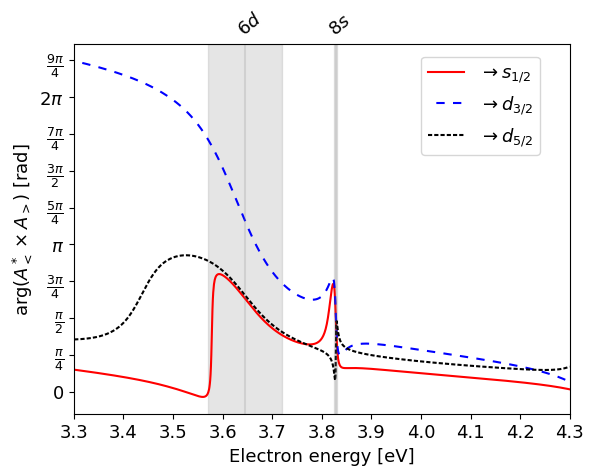

In [20]:
# channels contributions 1ph

fontsize = "13"

en, M_emi_matched, M_abs_matched = utils_1ph.get_prepared_matrices(
    one_photon_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    g_omega_IR,
    one_photon_2=one_photon_abs,
    g_omega_IR_2=g_omega_IR,
    energies_mode="abs"
)

en_low_en, M_emi_matched_low_en, M_abs_matched_low_en = utils_1ph.get_prepared_matrices(
    one_photon_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    g_omega_IR,
    one_photon_2=one_photon_low_en,
    g_omega_IR_2=g_omega_IR,
    energies_mode="abs"
)

region_mask = np.logical_and(en >= 3.5, en < 4.9)
region_mask_low_en = np.logical_and(en_low_en >= 3.3, en_low_en < 3.5)


en_concat = np.concatenate((en_low_en[region_mask_low_en], en[region_mask]))
M_emi_matched_concat = np.zeros((3, len(en_concat)), dtype=np.complex128)
M_abs_matched_concat = np.zeros((3, len(en_concat)), dtype=np.complex128)
for i in range(3):
    M_emi_matched_concat[i, :] = np.concatenate((M_emi_matched_low_en[i, region_mask_low_en], M_emi_matched[i, region_mask]))
    M_abs_matched_concat[i, :] = np.concatenate((M_abs_matched_low_en[i, region_mask_low_en], M_abs_matched[i, region_mask]))


int_intens_arr = np.zeros((3, len(en_concat)), dtype=np.complex128)

for i in range(3):
    M_emi_channel = M_emi_matched_concat.copy()
    M_abs_channel = M_abs_matched_concat.copy()

    for j in range(3):
        if j != i:
            M_emi_channel[j, :] = 0.0 + 1j * 0.0
            M_abs_channel[j, :] = 0.0 + 1j * 0.0

    int_intens_arr[i, :] = wigner.get_wigner_intensity(
        hole_kappa_6p3half,
        M_emi_channel,
        M_abs_channel
    )


region_plot = np.logical_and(en_concat <= 4.3, en_concat >= 3.3)
plt.plot(en_concat[region_plot], np.angle(int_intens_arr[0][region_plot]), "-", color="red", label="$\\to s_{1/2}$");
plt.plot(en_concat[region_plot], unwrap_phase_with_nans(np.angle(int_intens_arr[1])[region_plot]) + 2 * np.pi, linestyle=(4, (4, 4)), color="blue", label="$\\to d_{3/2}$");
plt.plot(en_concat[region_plot], np.angle(int_intens_arr[2][region_plot]), linestyle=(3, (2, 1)), color="black", label="$\\to d_{5/2}$");

plt.legend(fontsize=fontsize, loc=(0.7, 0.7));


ax= plt.gca()
ymin, ymax = ax.get_ylim()
ax.set_ymargin(0)
ax.set_xmargin(0)
for i, (r, width, name, _) in enumerate(rn_resonances[1:3]):
    r += g_omega_IR_eV
    plt.fill_betweenx([ymin, ymax], r-width/2,r+width/2, color="gray", alpha=.2)
    ax.plot([r, r],[ymin,ymax], color="gray",alpha=.2)
    if name == "$8d$":
        ax.text((r - 0.8 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    elif name == "$10s$":
        ax.text((r - 8.5 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    else:
        ax.text((r - 0.02), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)

plt.xlabel("Electron energy [eV]", fontsize=fontsize);
plt.ylabel("arg($A_<^* \\times A_>$) [rad]", fontsize=fontsize);

major = Multiple(4, np.pi, '\\pi')
minor = Multiple(16, np.pi, '\\pi')
ax.yaxis.set_major_locator(major.locator())
ax.yaxis.set_major_formatter(major.formatter())
plt.xticks([3.3 + i * 0.1 for i in range(11)],fontsize=fontsize);
plt.yticks(fontsize=fontsize);

plt.savefig(f"int_wigner_channels_phase.pdf", format="pdf", bbox_inches="tight")


In [21]:
import fortran_output_analysis.twophotons.twophotons_utilities as utils_2ph
import fortran_output_analysis.twophotons.twophotons_delays_and_phases as atomic

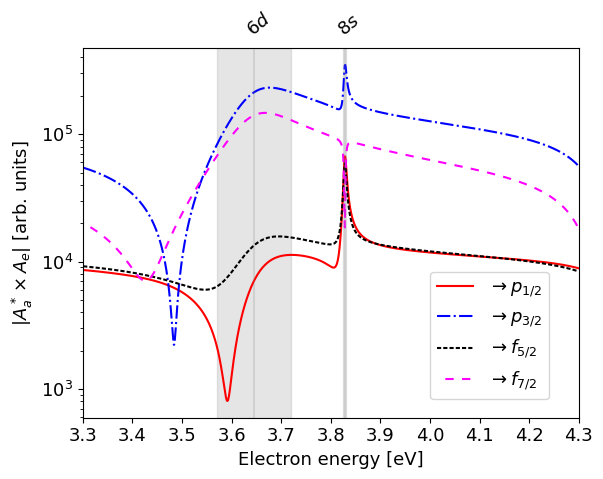

In [22]:
# channels contributions 1ph

fontsize = "13"

en, M_emi_matched, M_abs_matched = utils_2ph.get_prepared_matrices(
    two_photons_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_abs,
    energies_mode="abs"
)

en_low_en, M_emi_matched_low_en, M_abs_matched_low_en = utils_2ph.get_prepared_matrices(
    two_photons_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_low_en,
    energies_mode="abs"
)

region_mask = np.logical_and(en >= 3.5, en < 4.9)
region_mask_low_en = np.logical_and(en_low_en >= 3.3, en_low_en < 3.5)


en_concat = np.concatenate((en_low_en[region_mask_low_en], en[region_mask]))
M_emi_matched_concat = np.zeros((5, 3, len(en_concat)), dtype=np.complex128)
M_abs_matched_concat = np.zeros((5, 3, len(en_concat)), dtype=np.complex128)
for i in range(5):
    for K in range(3):
        M_emi_matched_concat[i, K, :] = np.concatenate((M_emi_matched_low_en[i, K, region_mask_low_en], M_emi_matched[i, K, region_mask]))
        M_abs_matched_concat[i, K, :] = np.concatenate((M_abs_matched_low_en[i, K, region_mask_low_en], M_abs_matched[i, K, region_mask]))


int_intens_arr = np.zeros((5, len(en_concat)), dtype=np.complex128)

for i in range(5):
    M_emi_channel = M_emi_matched_concat.copy()
    M_abs_channel = M_abs_matched_concat.copy()

    for j in range(5):
        if j != i:
            M_emi_channel[j, :, :] = 0.0 + 1j * 0.0
            M_abs_channel[j, :, :] = 0.0 + 1j * 0.0

    int_intens_arr[i, :] = atomic.get_integrated_two_photons_intensity(
        hole_kappa_6p3half,
        M_emi_channel,
        M_abs_channel
    )

region_plot = np.logical_and(en_concat <= 4.3, en_concat >= 3.3)
plt.plot(en_concat[region_plot], np.abs(int_intens_arr[1][region_plot]), "-", color="red", label="$\\to p_{1/2}$");
plt.plot(en_concat[region_plot], np.abs(int_intens_arr[2][region_plot]), linestyle="-.", color="blue", label="$\\to p_{3/2}$");
plt.plot(en_concat[region_plot], np.abs(int_intens_arr[3][region_plot]), linestyle=(3, (2, 1)), color="black", label="$\\to f_{5/2}$");
plt.plot(en_concat[region_plot], np.abs(int_intens_arr[4][region_plot]), linestyle=(4, (4, 4)), color="magenta", label="$\\to f_{7/2}$");

plt.legend(fontsize=fontsize, loc=(0.7, 0.05));


ax= plt.gca()
ax.set_yscale("log")
ymin, ymax = ax.get_ylim()
# ymin = 1
# ymax = 1e6
# ax.set_ylim([ymin, ymax])
ax.set_ymargin(0)
ax.set_xmargin(0)
for i, (r, width, name, _) in enumerate(rn_resonances[1:3]):
    r += g_omega_IR_eV
    plt.fill_betweenx([ymin, ymax], r-width/2,r+width/2, color="gray", alpha=.2)
    ax.plot([r, r],[ymin,ymax], color="gray",alpha=.2)
    if name == "$8d$":
        ax.text((r - 0.8 * width), ymax+(ymax-ymin)/4, name, rotation=40, fontsize=fontsize)
    elif name == "$10s$":
        ax.text((r - 8.5 * width), ymax+(ymax-ymin)/4, name, rotation=40, fontsize=fontsize)
    else:
        ax.text((r - 0.02), ymax+(ymax-ymin)/4, name, rotation=40, fontsize=fontsize)

plt.xlabel("Electron energy [eV]", fontsize=fontsize);
plt.ylabel("$|A_a^* \\times A_e|$ [arb. units]", fontsize=fontsize);

plt.xticks([3.3 + i * 0.1 for i in range(11)],fontsize=fontsize);
plt.yticks(fontsize=fontsize);
# plt.ylim([ymin, ymax]);

plt.savefig(f"int_atomic_channels_amp.pdf", format="pdf", bbox_inches="tight")


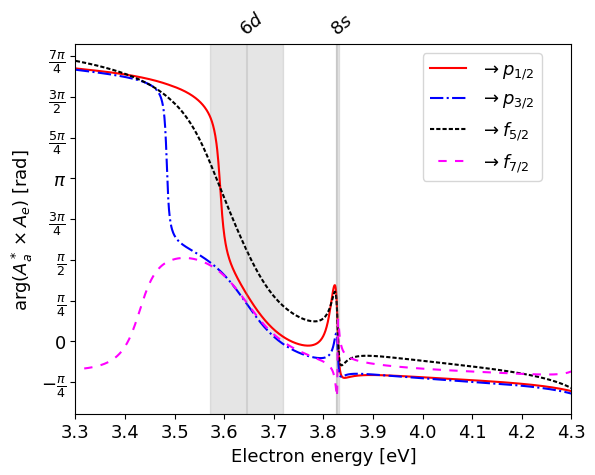

In [23]:
# channels contributions 1ph

fontsize = "13"

en, M_emi_matched, M_abs_matched = utils_2ph.get_prepared_matrices(
    two_photons_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_abs,
    energies_mode="abs"
)

en_low_en, M_emi_matched_low_en, M_abs_matched_low_en = utils_2ph.get_prepared_matrices(
    two_photons_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_low_en,
    energies_mode="abs"
)

region_mask = np.logical_and(en >= 3.5, en < 4.9)
region_mask_low_en = np.logical_and(en_low_en >= 3.3, en_low_en < 3.5)


en_concat = np.concatenate((en_low_en[region_mask_low_en], en[region_mask]))
M_emi_matched_concat = np.zeros((5, 3, len(en_concat)), dtype=np.complex128)
M_abs_matched_concat = np.zeros((5, 3, len(en_concat)), dtype=np.complex128)
for i in range(5):
    for K in range(3):
        M_emi_matched_concat[i, K, :] = np.concatenate((M_emi_matched_low_en[i, K, region_mask_low_en], M_emi_matched[i, K, region_mask]))
        M_abs_matched_concat[i, K, :] = np.concatenate((M_abs_matched_low_en[i, K, region_mask_low_en], M_abs_matched[i, K, region_mask]))


int_intens_arr = np.zeros((5, len(en_concat)), dtype=np.complex128)

for i in range(5):
    M_emi_channel = M_emi_matched_concat.copy()
    M_abs_channel = M_abs_matched_concat.copy()

    for j in range(5):
        if j != i:
            M_emi_channel[j, :, :] = 0.0 + 1j * 0.0
            M_abs_channel[j, :, :] = 0.0 + 1j * 0.0

    int_intens_arr[i, :] = atomic.get_integrated_two_photons_intensity(
        hole_kappa_6p3half,
        M_emi_channel,
        M_abs_channel
    )

region_plot = np.logical_and(en_concat <= 4.3, en_concat >= 3.3)
plt.plot(en_concat[region_plot], unwrap_phase_with_nans(np.angle(int_intens_arr[1][region_plot])) + 2 * np.pi, "-", color="red", label="$\\to p_{1/2}$");
plt.plot(en_concat[region_plot], unwrap_phase_with_nans(np.angle(int_intens_arr[2][region_plot])) + 2 * np.pi, linestyle="-.", color="blue", label="$\\to p_{3/2}$");
plt.plot(en_concat[region_plot], unwrap_phase_with_nans(np.angle(int_intens_arr[3][region_plot])) + 2 * np.pi, linestyle=(3, (2, 1)), color="black", label="$\\to f_{5/2}$");
plt.plot(en_concat[region_plot], unwrap_phase_with_nans(np.angle(int_intens_arr[4][region_plot])), linestyle=(4, (4, 4)), color="magenta", label="$\\to f_{7/2}$");

plt.legend(fontsize=fontsize, loc=(0.7, 0.63));


ax= plt.gca()
ymin, ymax = ax.get_ylim()
ax.set_ymargin(0)
ax.set_xmargin(0)
for i, (r, width, name, _) in enumerate(rn_resonances[1:3]):
    r += g_omega_IR_eV
    plt.fill_betweenx([ymin, ymax], r-width/2,r+width/2, color="gray", alpha=.2)
    ax.plot([r, r],[ymin,ymax], color="gray",alpha=.2)
    if name == "$8d$":
        ax.text((r - 0.8 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    elif name == "$10s$":
        ax.text((r - 8.5 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    else:
        ax.text((r - 0.02), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)

plt.xlabel("Electron energy [eV]", fontsize=fontsize);
plt.ylabel("arg($A_a^* \\times A_e$) [rad]", fontsize=fontsize);

major = Multiple(4, np.pi, '\\pi')
minor = Multiple(16, np.pi, '\\pi')
ax.yaxis.set_major_locator(major.locator())
ax.yaxis.set_major_formatter(major.formatter())
plt.xticks([3.3 + i * 0.1 for i in range(11)],fontsize=fontsize);
plt.yticks(fontsize=fontsize);
# plt.ylim([ymin, ymax]);

plt.savefig(f"int_atomic_channels_phase.pdf", format="pdf", bbox_inches="tight")


In [24]:
from fortran_output_analysis import complex_q_parameter as complex_q

6d resonance:
E_res_6d [eV]:  2.095
width_res_6d [eV]:  0.1488
q_6d [eV]:  2.91
A_0_6d:  (15.659148088083967-11.410872466979374j)
A_bg_6d:  (4.060669175154439-4.465111821834039j)
q_complex_6d:  (2.261367491351058+0.34262310699818843j)
im_zero_6d:  -3.43998627792478
re_zero_1_6d:  -0.16330448926331087
re_zero_2_6d:  -2.098063002087747


8s resonance:
E_res_8s [eV]:  2.278
width_res_8s [eV]:  0.0057
q_8s [eV]:  9.44
A_0_8s:  (1.3400766443188705-2.2381592873531986j)
A_bg_8s:  (24.007338913089207-34.978924618931465j)
q_complex_8s:  (0.5425747421820085+0.9102373728571505j)
im_zero_8s:  -6.044550604769479
re_zero_1_8s:  nan
re_zero_2_8s:  nan


D:\photoionization_analysis\fortran_output_analysis\complex_q_parameter.py:258: RuntimeWarning: invalid value encountered in sqrt
  re_zero_1 = -np.real(q_complex) / 2 + np.sqrt(
D:\photoionization_analysis\fortran_output_analysis\complex_q_parameter.py:261: RuntimeWarning: invalid value encountered in sqrt
  re_zero_2 = -np.real(q_complex) / 2 - np.sqrt(


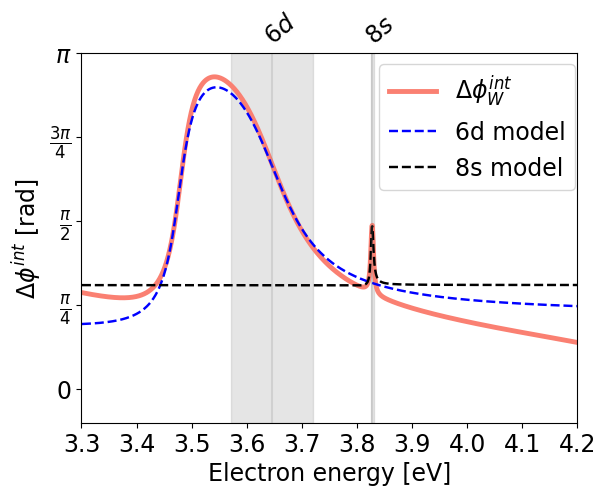

In [25]:
# integrated phases

fontsize = "17"

en, phase_int_w = wigner.get_integrated_wigner_phase(
    one_photon_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    g_omega_IR_1=g_omega_IR,
    one_photon_2=one_photon_abs,
    g_omega_IR_2=g_omega_IR,
    energies_mode="abs"
)

en_low_en, phase_int_w_low_en = wigner.get_integrated_wigner_phase(
    one_photon_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    g_omega_IR_1=g_omega_IR,
    one_photon_2=one_photon_low_en,
    g_omega_IR_2=g_omega_IR,
    energies_mode="abs"
)

_, M_emi_matched, M_abs_matched = utils_1ph.get_prepared_matrices(
    one_photon_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    g_omega_IR,
    one_photon_2=one_photon_abs,
    g_omega_IR_2=g_omega_IR,
    energies_mode="abs"
)

_, M_emi_matched_low_en, M_abs_matched_low_en = utils_1ph.get_prepared_matrices(
    one_photon_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    g_omega_IR,
    one_photon_2=one_photon_low_en,
    g_omega_IR_2=g_omega_IR,
    energies_mode="abs"
)


region_mask = np.logical_and(en >= 3.5, en < 4.9)
region_mask_low_en = np.logical_and(en_low_en >= 3.3, en_low_en < 3.5)

en_concat = np.concatenate((en_low_en[region_mask_low_en], en[region_mask]))
phase_int_w_concat = np.concatenate((phase_int_w_low_en[region_mask_low_en], phase_int_w[region_mask]))

M_emi_matched_concat = np.zeros((3, len(en_concat)), dtype=np.complex128)
M_abs_matched_concat = np.zeros((3, len(en_concat)), dtype=np.complex128)

for i in range(3):
    M_emi_matched_concat[i, :] = np.concatenate((M_emi_matched_low_en[i, region_mask_low_en], M_emi_matched[i, region_mask]))
    M_abs_matched_concat[i, :] = np.concatenate((M_abs_matched_low_en[i, region_mask_low_en], M_abs_matched[i, region_mask]))


int_intens_concat = wigner.get_wigner_intensity(hole_kappa_6p3half, M_emi_matched_concat, M_abs_matched_concat)

# index corresponding to the 6d resonance in the resonance_data list
res_id_6d = 1

# index corresponding to the 6d resonance in the resonance_data list
res_id_8s = 2

print("6d resonance:")

# calculate 6d resonance contribution
E_res_6d = rn_resonances[res_id_6d][0]
width_res_6d = rn_resonances[res_id_6d][1]
q_6d = rn_resonances[res_id_6d][3]
print("E_res_6d [eV]: ", E_res_6d)
print("width_res_6d [eV]: ", width_res_6d)
print("q_6d [eV]: ", q_6d)

eps_6d = complex_q.get_epsilon(en_concat, "abs", g_omega_IR_eV, E_res_6d, width_res_6d)

A_bg_6d, A_0_6d = complex_q.get_coefficients_for_integrated(
"abs",
eps_6d,
int_intens_concat,
q_6d,
eps_1=-q_6d/1.3,
eps_2=1/q_6d,
)
print("A_0_6d: ", A_0_6d)
print("A_bg_6d: ", A_bg_6d)

q_complex_6d = complex_q.get_complex_q_integrated(A_bg_6d, A_0_6d, q_6d)
print("q_complex_6d: ", q_complex_6d)

im_zero_6d, re_zero_1_6d, re_zero_2_6d = complex_q.get_zeros(q_complex_6d)
print("im_zero_6d: ", im_zero_6d)
print("re_zero_1_6d: ", re_zero_1_6d)
print("re_zero_2_6d: ", re_zero_2_6d)

phase_6d_approx = np.angle(
    np.conjugate((A_0_6d + A_bg_6d) * (eps_6d + q_complex_6d) / (eps_6d + 1 * 1j))
)

print("\n")

print("8s resonance:")
# calculate 8s resonance contribution
E_res_8s = rn_resonances[res_id_8s][0]
width_res_8s = rn_resonances[res_id_8s][1]
q_8s = rn_resonances[res_id_8s][3]
print("E_res_8s [eV]: ", E_res_8s)
print("width_res_8s [eV]: ", width_res_8s)
print("q_8s [eV]: ", q_8s)

eps_8s = complex_q.get_epsilon(en_concat, "abs", g_omega_IR_eV, E_res_8s, width_res_8s)

A_bg_8s, A_0_8s = complex_q.get_coefficients_for_integrated(
"abs",
eps_8s,
int_intens_concat,
q_8s,
eps_1=-q_8s,
eps_2=1/q_8s,
)
print("A_0_8s: ", A_0_8s)
print("A_bg_8s: ", A_bg_8s)

q_complex_8s = complex_q.get_complex_q_integrated(A_bg_8s, A_0_8s, q_8s)
print("q_complex_8s: ", q_complex_8s)

im_zero_8s, re_zero_1_8s, re_zero_2_8s = complex_q.get_zeros(q_complex_8s)
print("im_zero_8s: ", im_zero_8s)
print("re_zero_1_8s: ", re_zero_1_8s)
print("re_zero_2_8s: ", re_zero_2_8s)

phase_8s_approx = np.angle(
    np.conjugate((A_0_8s + A_bg_8s) * (eps_8s + q_complex_8s) / (eps_8s + 1 * 1j))
)


line_styles = ["solid", "dashed",  "dashdot", (3, (2, 1))]

plt.plot(en_concat, phase_int_w_concat, color="salmon", linewidth=3.5, label="$\\Delta \\phi_W^{int}$")
plt.plot(en_concat, phase_6d_approx, linestyle="--", color="blue", linewidth=1.75, label="6d model")
plt.plot(en_concat, phase_8s_approx, linestyle="--", color="black", linewidth=1.75, label="8s model")
plt.legend(fontsize=fontsize, loc=(0.6, 0.63));

ax= plt.gca()
ymin, ymax = ax.get_ylim()
ymin = -np.pi/10
ymax = np.pi
ax.set_ylim([ymin, ymax])
ax.set_ymargin(0)
ax.set_xmargin(0)
for i, (r, width, name, _) in enumerate(rn_resonances[res_id_6d: res_id_8s + 1]):
    r += g_omega_IR_eV
    plt.fill_betweenx([ymin, ymax], r-width/2,r+width/2, color="gray", alpha=.2)
    ax.plot([r, r],[ymin,ymax], color="gray",alpha=.2)
    if name == "$8d$":
        ax.text((r - 1.2 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    elif name == "$10s$":
        ax.text((r - 8.5 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    else:
        ax.text((r - 0.02), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)

plt.xlabel("Electron energy [eV]", fontsize=fontsize);
plt.ylabel("$\\Delta \\phi^{int}$ [rad]", fontsize=fontsize);


major = Multiple(4, np.pi, '\\pi')
minor = Multiple(16, np.pi, '\\pi')
ax.yaxis.set_major_locator(major.locator())
ax.yaxis.set_major_formatter(major.formatter())

plt.xticks([3.3 + i * 0.1 for i in range(17)],fontsize=fontsize);
plt.yticks(fontsize=fontsize);
plt.xlim([3.3, 4.2])

plt.savefig(f"wigner_int_model_6d_8s.pdf", format="pdf", bbox_inches="tight")

7d resonance:
E_res_7d [eV]:  2.871
width_res_7d [eV]:  0.0625
q_7d [eV]:  2.7
A_0_7d:  (17.642516488011157-7.264501311430035j)
A_bg_7d:  (5.504569277193324-2.8388887342439904j)
q_complex_7d:  (2.055091766600024+0.2874577604040247j)
im_zero_7d:  -2.8841683375364515
re_zero_1_7d:  -0.15096572046105228
re_zero_2_7d:  -1.9041260461389715


9s resonance:
E_res_9s [eV]:  2.97
width_res_9s [eV]:  0.0021
q_9s [eV]:  9.55
A_0_9s:  (2.2546415712931145-1.2824717939836026j)
A_bg_9s:  (28.259202243625246-20.913372655459014j)
q_complex_9s:  (0.6600703562822897+1.0048689948993157j)
im_zero_9s:  135.56603979500133
re_zero_1_9s:  nan
re_zero_2_9s:  nan


D:\photoionization_analysis\fortran_output_analysis\complex_q_parameter.py:258: RuntimeWarning: invalid value encountered in sqrt
  re_zero_1 = -np.real(q_complex) / 2 + np.sqrt(
D:\photoionization_analysis\fortran_output_analysis\complex_q_parameter.py:261: RuntimeWarning: invalid value encountered in sqrt
  re_zero_2 = -np.real(q_complex) / 2 - np.sqrt(


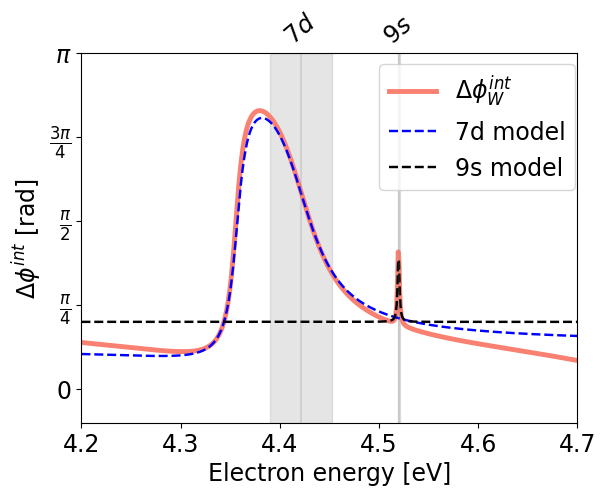

In [26]:
# integrated phases

fontsize = "17"

en, phase_int_w = wigner.get_integrated_wigner_phase(
    one_photon_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    g_omega_IR,
    one_photon_2=one_photon_abs,
    g_omega_IR_2=g_omega_IR,
    energies_mode="abs"
)

en_low_en, phase_int_w_low_en = wigner.get_integrated_wigner_phase(
    one_photon_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    g_omega_IR,
    one_photon_2=one_photon_low_en,
    g_omega_IR_2=g_omega_IR,
    energies_mode="abs"
)

_, M_emi_matched, M_abs_matched = utils_1ph.get_prepared_matrices(
    one_photon_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    g_omega_IR,
    one_photon_2=one_photon_abs,
    g_omega_IR_2=g_omega_IR,
    energies_mode="abs"
)

_, M_emi_matched_low_en, M_abs_matched_low_en = utils_1ph.get_prepared_matrices(
    one_photon_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    g_omega_IR,
    one_photon_2=one_photon_low_en,
    g_omega_IR_2=g_omega_IR,
    energies_mode="abs"
)


region_mask = np.logical_and(en >= 3.5, en < 4.9)
region_mask_low_en = np.logical_and(en_low_en >= 3.3, en_low_en < 3.5)

en_concat = np.concatenate((en_low_en[region_mask_low_en], en[region_mask]))
phase_int_w_concat = np.concatenate((phase_int_w_low_en[region_mask_low_en], phase_int_w[region_mask]))

M_emi_matched_concat = np.zeros((3, len(en_concat)), dtype=np.complex128)
M_abs_matched_concat = np.zeros((3, len(en_concat)), dtype=np.complex128)

for i in range(3):
    M_emi_matched_concat[i, :] = np.concatenate((M_emi_matched_low_en[i, region_mask_low_en], M_emi_matched[i, region_mask]))
    M_abs_matched_concat[i, :] = np.concatenate((M_abs_matched_low_en[i, region_mask_low_en], M_abs_matched[i, region_mask]))


int_intens_concat = wigner.get_wigner_intensity(hole_kappa_6p3half, M_emi_matched_concat, M_abs_matched_concat)

# index corresponding to the 7d resonance in the resonance_data list
res_id_7d = 3

# index corresponding to the 7d resonance in the resonance_data list
res_id_9s = 4

print("7d resonance:")

# calculate 7d resonance contribution
E_res_7d = rn_resonances[res_id_7d][0]
width_res_7d = rn_resonances[res_id_7d][1]
q_7d = rn_resonances[res_id_7d][3]
print("E_res_7d [eV]: ", E_res_7d)
print("width_res_7d [eV]: ", width_res_7d)
print("q_7d [eV]: ", q_7d)

eps_7d = complex_q.get_epsilon(en_concat, "abs", g_omega_IR_eV, E_res_7d, width_res_7d)

A_bg_7d, A_0_7d = complex_q.get_coefficients_for_integrated(
"abs",
eps_7d,
int_intens_concat,
q_7d,
eps_1=-q_7d,
eps_2=1/q_7d,
)
print("A_0_7d: ", A_0_7d)
print("A_bg_7d: ", A_bg_7d)

q_complex_7d = complex_q.get_complex_q_integrated(A_bg_7d, A_0_7d, q_7d)
print("q_complex_7d: ", q_complex_7d)

im_zero_7d, re_zero_1_7d, re_zero_2_7d = complex_q.get_zeros(q_complex_7d)
print("im_zero_7d: ", im_zero_7d)
print("re_zero_1_7d: ", re_zero_1_7d)
print("re_zero_2_7d: ", re_zero_2_7d)

phase_7d_approx = np.angle(
    np.conjugate((A_0_7d + A_bg_7d) * (eps_7d + q_complex_7d) / (eps_7d + 1 * 1j))
)

print("\n")

print("9s resonance:")
# calculate 9s resonance contribution
E_res_9s = rn_resonances[res_id_9s][0]
width_res_9s = rn_resonances[res_id_9s][1]
q_9s = rn_resonances[res_id_9s][3]
print("E_res_9s [eV]: ", E_res_9s)
print("width_res_9s [eV]: ", width_res_9s)
print("q_9s [eV]: ", q_9s)

eps_9s = complex_q.get_epsilon(en_concat, "abs", g_omega_IR_eV, E_res_9s, width_res_9s)

A_bg_9s, A_0_9s = complex_q.get_coefficients_for_integrated(
"abs",
eps_9s,
int_intens_concat,
q_9s,
eps_1=-q_9s,
eps_2=1/q_9s,
)
print("A_0_9s: ", A_0_9s)
print("A_bg_9s: ", A_bg_9s)

q_complex_9s = complex_q.get_complex_q_integrated(A_bg_9s, A_0_9s, q_9s)
print("q_complex_9s: ", q_complex_9s)

im_zero_9s, re_zero_1_9s, re_zero_2_9s = complex_q.get_zeros(q_complex_9s)
print("im_zero_9s: ", im_zero_9s)
print("re_zero_1_9s: ", re_zero_1_9s)
print("re_zero_2_9s: ", re_zero_2_9s)

phase_9s_approx = np.angle(
    np.conjugate((A_0_9s + A_bg_9s) * (eps_9s + q_complex_9s) / (eps_9s + 1 * 1j))
)


line_styles = ["solid", "dashed",  "dashdot", (3, (2, 1))]

plt.plot(en_concat, phase_int_w_concat, color="salmon", linewidth=3.5, label="$\\Delta \\phi_W^{int}$")
plt.plot(en_concat, phase_7d_approx, linestyle="--", color="blue", linewidth=1.75, label="7d model")
plt.plot(en_concat, phase_9s_approx, linestyle="--", color="black", linewidth=1.75, label="9s model")
plt.legend(fontsize=fontsize, loc=(0.6, 0.63));

ax= plt.gca()
ymin, ymax = ax.get_ylim()
ymin = -np.pi/10
ymax = np.pi
ax.set_ylim([ymin, ymax])
ax.set_ymargin(0)
ax.set_xmargin(0)
for i, (r, width, name, _) in enumerate(rn_resonances[res_id_7d: res_id_9s + 1]):
    r += g_omega_IR_eV
    plt.fill_betweenx([ymin, ymax], r-width/2,r+width/2, color="gray", alpha=.2)
    ax.plot([r, r],[ymin,ymax], color="gray",alpha=.2)
    if name == "$8d$":
        ax.text((r - 1.2 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    elif name == "$10s$":
        ax.text((r - 8.5 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    else:
        ax.text((r - 0.02), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)

plt.xlabel("Electron energy [eV]", fontsize=fontsize);
plt.ylabel("$\\Delta \\phi^{int}$ [rad]", fontsize=fontsize);


major = Multiple(4, np.pi, '\\pi')
minor = Multiple(16, np.pi, '\\pi')
ax.yaxis.set_major_locator(major.locator())
ax.yaxis.set_major_formatter(major.formatter())

plt.xticks([3.3 + i * 0.1 for i in range(17)],fontsize=fontsize);
plt.yticks(fontsize=fontsize);
plt.xlim([4.2, 4.7])

plt.savefig(f"wigner_int_model_7d_9s.pdf", format="pdf", bbox_inches="tight")

8d resonance:
E_res_8d [eV]:  3.229
width_res_8d [eV]:  0.03
q_8d [eV]:  2.62
A_0_8d:  (17.99052806814996-5.998342004114703j)
A_bg_8d:  (5.391959423433963-2.0917235025273886j)
q_complex_8d:  (2.0166405196240436+0.256219843244525j)
im_zero_8d:  -2.7113395017434354
re_zero_1_8d:  -0.13625953767000376
re_zero_2_8d:  -1.8803809819540398


10s resonance:
E_res_10s [eV]:  3.283
width_res_10s [eV]:  0.001
q_10s [eV]:  9.64
A_0_10s:  (2.5493798486724932+0.4357998612430626j)
A_bg_10s:  (27.63992319372888-16.47004262697999j)
q_complex_10s:  (0.6235437282387027+1.3858910658182593j)
im_zero_10s:  1.615854274616374
re_zero_1_10s:  nan
re_zero_2_10s:  nan


D:\photoionization_analysis\fortran_output_analysis\complex_q_parameter.py:258: RuntimeWarning: invalid value encountered in sqrt
  re_zero_1 = -np.real(q_complex) / 2 + np.sqrt(
D:\photoionization_analysis\fortran_output_analysis\complex_q_parameter.py:261: RuntimeWarning: invalid value encountered in sqrt
  re_zero_2 = -np.real(q_complex) / 2 - np.sqrt(


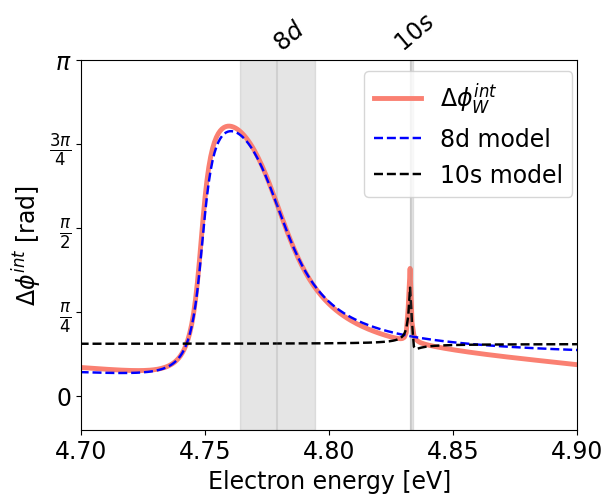

In [27]:
# integrated phases

fontsize = "17"

en, phase_int_w = wigner.get_integrated_wigner_phase(
    one_photon_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    g_omega_IR_1=g_omega_IR,
    one_photon_2=one_photon_abs,
    g_omega_IR_2=g_omega_IR,
    energies_mode="abs"
)

en_low_en, phase_int_w_low_en = wigner.get_integrated_wigner_phase(
    one_photon_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    g_omega_IR_1=g_omega_IR,
    one_photon_2=one_photon_low_en,
    g_omega_IR_2=g_omega_IR,
    energies_mode="abs"
)

_, M_emi_matched, M_abs_matched = utils_1ph.get_prepared_matrices(
    one_photon_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    g_omega_IR,
    one_photon_2=one_photon_abs,
    g_omega_IR_2=g_omega_IR,
    energies_mode="abs"
)

_, M_emi_matched_low_en, M_abs_matched_low_en = utils_1ph.get_prepared_matrices(
    one_photon_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    g_omega_IR,
    one_photon_2=one_photon_low_en,
    g_omega_IR_2=g_omega_IR,
    energies_mode="abs"
)


region_mask = np.logical_and(en >= 3.5, en < 4.9)
region_mask_low_en = np.logical_and(en_low_en >= 3.3, en_low_en < 3.5)

en_concat = np.concatenate((en_low_en[region_mask_low_en], en[region_mask]))
phase_int_w_concat = np.concatenate((phase_int_w_low_en[region_mask_low_en], phase_int_w[region_mask]))

M_emi_matched_concat = np.zeros((3, len(en_concat)), dtype=np.complex128)
M_abs_matched_concat = np.zeros((3, len(en_concat)), dtype=np.complex128)

for i in range(3):
    M_emi_matched_concat[i, :] = np.concatenate((M_emi_matched_low_en[i, region_mask_low_en], M_emi_matched[i, region_mask]))
    M_abs_matched_concat[i, :] = np.concatenate((M_abs_matched_low_en[i, region_mask_low_en], M_abs_matched[i, region_mask]))


int_intens_concat = wigner.get_wigner_intensity(hole_kappa_6p3half, M_emi_matched_concat, M_abs_matched_concat)

# index corresponding to the 8d resonance in the resonance_data list
res_id_8d = 5

# index corresponding to the 8d resonance in the resonance_data list
res_id_10s = 6

print("8d resonance:")

# calculate 8d resonance contribution
E_res_8d = rn_resonances[res_id_8d][0]
width_res_8d = rn_resonances[res_id_8d][1]
q_8d = rn_resonances[res_id_8d][3]
print("E_res_8d [eV]: ", E_res_8d)
print("width_res_8d [eV]: ", width_res_8d)
print("q_8d [eV]: ", q_8d)

eps_8d = complex_q.get_epsilon(en_concat, "abs", g_omega_IR_eV, E_res_8d, width_res_8d)

A_bg_8d, A_0_8d = complex_q.get_coefficients_for_integrated(
"abs",
eps_8d,
int_intens_concat,
q_8d,
eps_1=-q_8d,
eps_2=1/q_8d,
)
print("A_0_8d: ", A_0_8d)
print("A_bg_8d: ", A_bg_8d)

q_complex_8d = complex_q.get_complex_q_integrated(A_bg_8d, A_0_8d, q_8d)
print("q_complex_8d: ", q_complex_8d)

im_zero_8d, re_zero_1_8d, re_zero_2_8d = complex_q.get_zeros(q_complex_8d)
print("im_zero_8d: ", im_zero_8d)
print("re_zero_1_8d: ", re_zero_1_8d)
print("re_zero_2_8d: ", re_zero_2_8d)

phase_8d_approx = np.angle(
    np.conjugate((A_0_8d + A_bg_8d) * (eps_8d + q_complex_8d) / (eps_8d + 1 * 1j))
)

print("\n")

print("10s resonance:")
# calculate 10s resonance contribution
E_res_10s = rn_resonances[res_id_10s][0]
width_res_10s = rn_resonances[res_id_10s][1]
q_10s = rn_resonances[res_id_10s][3]
print("E_res_10s [eV]: ", E_res_10s)
print("width_res_10s [eV]: ", width_res_10s)
print("q_10s [eV]: ", q_10s)

eps_10s = complex_q.get_epsilon(en_concat, "abs", g_omega_IR_eV, E_res_10s, width_res_10s)

A_bg_10s, A_0_10s = complex_q.get_coefficients_for_integrated(
"abs",
eps_10s,
int_intens_concat,
q_10s,
eps_1=-q_10s,
# eps_2=1/q_10s,
eps_2=-q_10s/18,
)
print("A_0_10s: ", A_0_10s)
print("A_bg_10s: ", A_bg_10s)

q_complex_10s = complex_q.get_complex_q_integrated(A_bg_10s, A_0_10s, q_10s)
print("q_complex_10s: ", q_complex_10s)

im_zero_10s, re_zero_1_10s, re_zero_2_10s = complex_q.get_zeros(q_complex_10s)
print("im_zero_10s: ", im_zero_10s)
print("re_zero_1_10s: ", re_zero_1_10s)
print("re_zero_2_10s: ", re_zero_2_10s)

phase_10s_approx = np.angle(
    np.conjugate((A_0_10s + A_bg_10s) * (eps_10s + q_complex_10s) / (eps_10s + 1 * 1j))
)


line_styles = ["solid", "dashed",  "dashdot", (3, (2, 1))]

plt.plot(en_concat, phase_int_w_concat, color="salmon", linewidth=3.5, label="$\\Delta \\phi_W^{int}$")
plt.plot(en_concat, phase_8d_approx, linestyle="--", color="blue", linewidth=1.75, label="8d model")
plt.plot(en_concat, phase_10s_approx, linestyle="--", color="black", linewidth=1.75, label="10s model")
plt.legend(fontsize=fontsize, loc=(0.57, 0.63));

ax= plt.gca()
ymin, ymax = ax.get_ylim()
ymin = -np.pi/10
ymax = np.pi
ax.set_ylim([ymin, ymax])
ax.set_ymargin(0)
ax.set_xmargin(0)
for i, (r, width, name, _) in enumerate(rn_resonances[res_id_8d: res_id_10s + 1]):
    r += g_omega_IR_eV
    plt.fill_betweenx([ymin, ymax], r-width/2,r+width/2, color="gray", alpha=.2)
    ax.plot([r, r],[ymin,ymax], color="gray",alpha=.2)
    if name == "$8d$":
        ax.text((r - 0.1 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    elif name == "$10s$":
        ax.text((r - 8.5 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    else:
        ax.text((r - 0.02), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)

plt.xlabel("Electron energy [eV]", fontsize=fontsize);
plt.ylabel("$\\Delta \\phi^{int}$ [rad]", fontsize=fontsize);


major = Multiple(4, np.pi, '\\pi')
minor = Multiple(16, np.pi, '\\pi')
ax.yaxis.set_major_locator(major.locator())
ax.yaxis.set_major_formatter(major.formatter())

plt.xticks([3.3 + i * 0.05 for i in range(33)],fontsize=fontsize);
plt.yticks(fontsize=fontsize);
plt.xlim([4.7, 4.9])

plt.savefig(f"wigner_int_model_8d_10s.pdf", format="pdf", bbox_inches="tight")

6d resonance:
E_res_6d [eV]:  2.095
width_res_6d [eV]:  0.1488
q_6d [eV]:  2.91
A_0_6d:  (98553.04310855038+83128.19722697324j)
A_bg_6d:  (19114.61718483721+34267.78154767093j)
q_complex_6d:  (2.184637068745745+0.03866877399625373j)
im_zero_6d:  -2.2725123346167386
re_zero_1_6d:  -0.01784610264730868
re_zero_2_6d:  -2.1667909660984366


8s resonance:
E_res_8s [eV]:  2.278
width_res_8s [eV]:  0.0057
q_8s [eV]:  9.44
A_0_8s:  (341.74608536635697+26085.716391241967j)
A_bg_8s:  (266584.31448882114+81522.26882109481j)
q_complex_8s:  (0.4139333407886855+1.7543845040844552j)
im_zero_8s:  0.5487033979986744
re_zero_1_8s:  nan
re_zero_2_8s:  nan


D:\photoionization_analysis\fortran_output_analysis\complex_q_parameter.py:258: RuntimeWarning: invalid value encountered in sqrt
  re_zero_1 = -np.real(q_complex) / 2 + np.sqrt(
D:\photoionization_analysis\fortran_output_analysis\complex_q_parameter.py:261: RuntimeWarning: invalid value encountered in sqrt
  re_zero_2 = -np.real(q_complex) / 2 - np.sqrt(


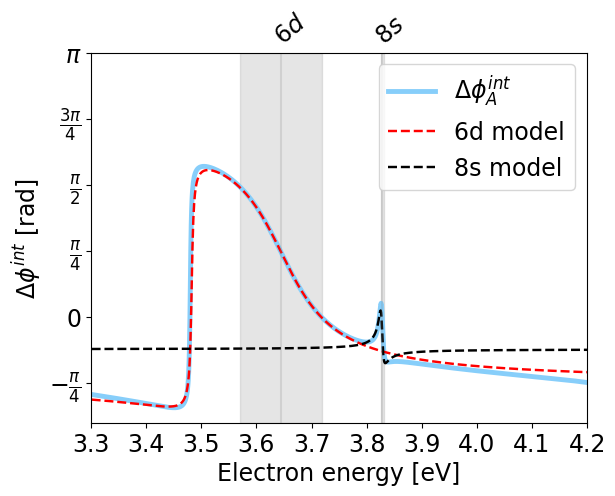

In [28]:
# integrated phases

fontsize = "17"

en, phase_int_a = atomic.get_integrated_atomic_phase(
    two_photons_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_abs,
    energies_mode="abs"
)

en_low_en, phase_int_w_low_en = atomic.get_integrated_atomic_phase(
    two_photons_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_low_en,
    energies_mode="abs"
)

_, M_emi_matched, M_abs_matched = utils_2ph.get_prepared_matrices(
    two_photons_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_abs,
    energies_mode="abs"
)

_, M_emi_matched_low_en, M_abs_matched_low_en = utils_2ph.get_prepared_matrices(
    two_photons_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_low_en,
    energies_mode="abs"
)


region_mask = np.logical_and(en >= 3.5, en < 4.9)
region_mask_low_en = np.logical_and(en_low_en >= 3.3, en_low_en < 3.5)

en_concat = np.concatenate((en_low_en[region_mask_low_en], en[region_mask]))
phase_int_a_concat = np.concatenate((phase_int_a_low_en[region_mask_low_en], phase_int_a[region_mask]))

M_emi_matched_concat = np.zeros((5, 3, len(en_concat)), dtype=np.complex128)
M_abs_matched_concat = np.zeros((5, 3, len(en_concat)), dtype=np.complex128)

for i in range(5):
    for K in range(3):
        M_emi_matched_concat[i, K, :] = np.concatenate((M_emi_matched_low_en[i, K, region_mask_low_en], M_emi_matched[i, K, region_mask]))
        M_abs_matched_concat[i, K, :] = np.concatenate((M_abs_matched_low_en[i, K, region_mask_low_en], M_abs_matched[i, K, region_mask]))


int_intens_concat = atomic.get_integrated_two_photons_intensity(hole_kappa_6p3half, M_emi_matched_concat, M_abs_matched_concat)

# index corresponding to the 6d resonance in the resonance_data list
res_id_6d = 1

# index corresponding to the 6d resonance in the resonance_data list
res_id_8s = 2

print("6d resonance:")

# calculate 6d resonance contribution
E_res_6d = rn_resonances[res_id_6d][0]
width_res_6d = rn_resonances[res_id_6d][1]
q_6d = rn_resonances[res_id_6d][3]
print("E_res_6d [eV]: ", E_res_6d)
print("width_res_6d [eV]: ", width_res_6d)
print("q_6d [eV]: ", q_6d)

eps_6d = complex_q.get_epsilon(en_concat, "abs", g_omega_IR_eV, E_res_6d, width_res_6d)

A_bg_6d, A_0_6d = complex_q.get_coefficients_for_integrated(
"abs",
eps_6d,
int_intens_concat,
q_6d,
eps_1=-q_6d,
eps_2=1/q_6d,
)
print("A_0_6d: ", A_0_6d)
print("A_bg_6d: ", A_bg_6d)

q_complex_6d = complex_q.get_complex_q_integrated(A_bg_6d, A_0_6d, q_6d)
print("q_complex_6d: ", q_complex_6d)

im_zero_6d, re_zero_1_6d, re_zero_2_6d = complex_q.get_zeros(q_complex_6d)
print("im_zero_6d: ", im_zero_6d)
print("re_zero_1_6d: ", re_zero_1_6d)
print("re_zero_2_6d: ", re_zero_2_6d)

phase_6d_approx = np.angle(
    np.conjugate((A_0_6d + A_bg_6d) * (eps_6d + q_complex_6d) / (eps_6d + 1 * 1j))
)

print("\n")

print("8s resonance:")
# calculate 8s resonance contribution
E_res_8s = rn_resonances[res_id_8s][0]
width_res_8s = rn_resonances[res_id_8s][1]
q_8s = rn_resonances[res_id_8s][3]
print("E_res_8s [eV]: ", E_res_8s)
print("width_res_8s [eV]: ", width_res_8s)
print("q_8s [eV]: ", q_8s)

eps_8s = complex_q.get_epsilon(en_concat, "abs", g_omega_IR_eV, E_res_8s, width_res_8s)

A_bg_8s, A_0_8s = complex_q.get_coefficients_for_integrated(
"abs",
eps_8s,
int_intens_concat,
q_8s,
eps_1=-q_8s,
eps_2=q_8s/3,
)
print("A_0_8s: ", A_0_8s)
print("A_bg_8s: ", A_bg_8s)

q_complex_8s = complex_q.get_complex_q_integrated(A_bg_8s, A_0_8s, q_8s)
print("q_complex_8s: ", q_complex_8s)

im_zero_8s, re_zero_1_8s, re_zero_2_8s = complex_q.get_zeros(q_complex_8s)
print("im_zero_8s: ", im_zero_8s)
print("re_zero_1_8s: ", re_zero_1_8s)
print("re_zero_2_8s: ", re_zero_2_8s)

phase_8s_approx = np.angle(
    np.conjugate((A_0_8s + A_bg_8s) * (eps_8s + q_complex_8s) / (eps_8s + 1 * 1j))
)


line_styles = ["solid", "dashed",  "dashdot", (3, (2, 1))]

plt.plot(en_concat, phase_int_a_concat, color="lightskyblue", linewidth=3.5, label="$\\Delta \\phi_A^{int}$")
plt.plot(en_concat, phase_6d_approx, linestyle="--", color="red", linewidth=1.75, label="6d model")
plt.plot(en_concat, phase_8s_approx, linestyle="--", color="black", linewidth=1.75, label="8s model")
plt.legend(fontsize=fontsize, loc=(0.58, 0.63));

ax= plt.gca()
ymin, ymax = ax.get_ylim()
ymin = -np.pi/2.5
ymax = np.pi
ax.set_ylim([ymin, ymax])
ax.set_ymargin(0)
ax.set_xmargin(0)
for i, (r, width, name, _) in enumerate(rn_resonances[res_id_6d: res_id_8s + 1]):
    r += g_omega_IR_eV
    plt.fill_betweenx([ymin, ymax], r-width/2,r+width/2, color="gray", alpha=.2)
    ax.plot([r, r],[ymin,ymax], color="gray",alpha=.2)
    if name == "$8d$":
        ax.text((r - 1.2 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    elif name == "$10s$":
        ax.text((r - 8.5 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    else:
        ax.text((r - 0.02), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)

plt.xlabel("Electron energy [eV]", fontsize=fontsize);
plt.ylabel("$\\Delta \\phi^{int}$ [rad]", fontsize=fontsize);


major = Multiple(4, np.pi, '\\pi')
minor = Multiple(16, np.pi, '\\pi')
ax.yaxis.set_major_locator(major.locator())
ax.yaxis.set_major_formatter(major.formatter())

plt.xticks([3.3 + i * 0.1 for i in range(17)],fontsize=fontsize);
plt.yticks(fontsize=fontsize);
plt.xlim([3.3, 4.2])

plt.savefig(f"atomic_int_model_6d_8s.pdf", format="pdf", bbox_inches="tight")

7d resonance:
E_res_7d [eV]:  2.871
width_res_7d [eV]:  0.0625
q_7d [eV]:  2.7
A_0_7d:  (117915.44024545474+79851.19697253779j)
A_bg_7d:  (23295.57658513142+36412.82188220333j)
q_complex_7d:  (2.020165830970047+0.028476603593914438j)
im_zero_7d:  -2.0793794966165087
re_zero_1_7d:  -0.014195927639108041
re_zero_2_7d:  -2.005969903330939


9s resonance:
E_res_9s [eV]:  2.97
width_res_9s [eV]:  0.0021
q_9s [eV]:  9.55
A_0_9s:  (5692.166840191687+24441.853002030155j)
A_bg_9s:  (242400.90355076757+81006.16921387175j)
q_complex_9s:  (0.5994768781439703+1.6631135561565704j)
im_zero_9s:  0.9040335136843823
re_zero_1_9s:  nan
re_zero_2_9s:  nan


D:\photoionization_analysis\fortran_output_analysis\complex_q_parameter.py:258: RuntimeWarning: invalid value encountered in sqrt
  re_zero_1 = -np.real(q_complex) / 2 + np.sqrt(
D:\photoionization_analysis\fortran_output_analysis\complex_q_parameter.py:261: RuntimeWarning: invalid value encountered in sqrt
  re_zero_2 = -np.real(q_complex) / 2 - np.sqrt(


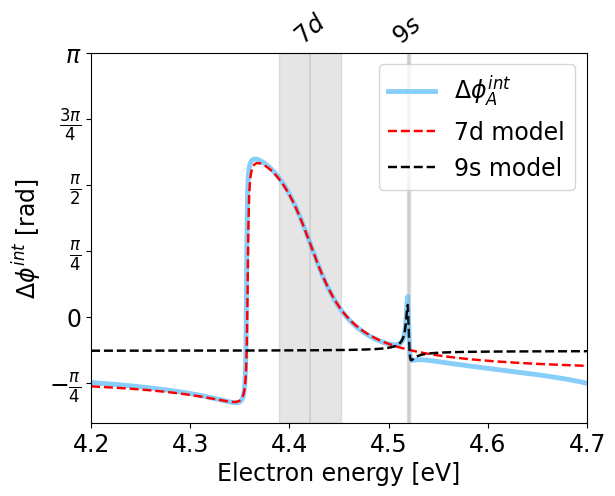

In [29]:
# integrated phases

fontsize = "17"

en, phase_int_a = atomic.get_integrated_atomic_phase(
    two_photons_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_abs,
    energies_mode="abs"
)

en_low_en, phase_int_w_low_en = atomic.get_integrated_atomic_phase(
    two_photons_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_low_en,
    energies_mode="abs"
)

_, M_emi_matched, M_abs_matched = utils_2ph.get_prepared_matrices(
    two_photons_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_abs,
    energies_mode="abs"
)

_, M_emi_matched_low_en, M_abs_matched_low_en = utils_2ph.get_prepared_matrices(
    two_photons_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_low_en,
    energies_mode="abs"
)


region_mask = np.logical_and(en >= 3.5, en < 4.9)
region_mask_low_en = np.logical_and(en_low_en >= 3.3, en_low_en < 3.5)

en_concat = np.concatenate((en_low_en[region_mask_low_en], en[region_mask]))
phase_int_a_concat = np.concatenate((phase_int_a_low_en[region_mask_low_en], phase_int_a[region_mask]))

M_emi_matched_concat = np.zeros((5, 3, len(en_concat)), dtype=np.complex128)
M_abs_matched_concat = np.zeros((5, 3, len(en_concat)), dtype=np.complex128)

for i in range(5):
    for K in range(3):
        M_emi_matched_concat[i, K, :] = np.concatenate((M_emi_matched_low_en[i, K, region_mask_low_en], M_emi_matched[i, K, region_mask]))
        M_abs_matched_concat[i, K, :] = np.concatenate((M_abs_matched_low_en[i, K, region_mask_low_en], M_abs_matched[i, K, region_mask]))


int_intens_concat = atomic.get_integrated_two_photons_intensity(hole_kappa_6p3half, M_emi_matched_concat, M_abs_matched_concat)

# index corresponding to the 7d resonance in the resonance_data list
res_id_7d = 3

# index corresponding to the 7d resonance in the resonance_data list
res_id_9s = 4

print("7d resonance:")

# calculate 7d resonance contribution
E_res_7d = rn_resonances[res_id_7d][0]
width_res_7d = rn_resonances[res_id_7d][1]
q_7d = rn_resonances[res_id_7d][3]
print("E_res_7d [eV]: ", E_res_7d)
print("width_res_7d [eV]: ", width_res_7d)
print("q_7d [eV]: ", q_7d)

eps_7d = complex_q.get_epsilon(en_concat, "abs", g_omega_IR_eV, E_res_7d, width_res_7d)

A_bg_7d, A_0_7d = complex_q.get_coefficients_for_integrated(
"abs",
eps_7d,
int_intens_concat,
q_7d,
eps_1=-q_7d,
eps_2=1/q_7d,
)
print("A_0_7d: ", A_0_7d)
print("A_bg_7d: ", A_bg_7d)

q_complex_7d = complex_q.get_complex_q_integrated(A_bg_7d, A_0_7d, q_7d)
print("q_complex_7d: ", q_complex_7d)

im_zero_7d, re_zero_1_7d, re_zero_2_7d = complex_q.get_zeros(q_complex_7d)
print("im_zero_7d: ", im_zero_7d)
print("re_zero_1_7d: ", re_zero_1_7d)
print("re_zero_2_7d: ", re_zero_2_7d)

phase_7d_approx = np.angle(
    np.conjugate((A_0_7d + A_bg_7d) * (eps_7d + q_complex_7d) / (eps_7d + 1 * 1j))
)

print("\n")

print("9s resonance:")
# calculate 9s resonance contribution
E_res_9s = rn_resonances[res_id_9s][0]
width_res_9s = rn_resonances[res_id_9s][1]
q_9s = rn_resonances[res_id_9s][3]
print("E_res_9s [eV]: ", E_res_9s)
print("width_res_9s [eV]: ", width_res_9s)
print("q_9s [eV]: ", q_9s)

eps_9s = complex_q.get_epsilon(en_concat, "abs", g_omega_IR_eV, E_res_9s, width_res_9s)

A_bg_9s, A_0_9s = complex_q.get_coefficients_for_integrated(
"abs",
eps_9s,
int_intens_concat,
q_9s,
eps_1=-q_9s,
eps_2=q_9s/3,
)
print("A_0_9s: ", A_0_9s)
print("A_bg_9s: ", A_bg_9s)

q_complex_9s = complex_q.get_complex_q_integrated(A_bg_9s, A_0_9s, q_9s)
print("q_complex_9s: ", q_complex_9s)

im_zero_9s, re_zero_1_9s, re_zero_2_9s = complex_q.get_zeros(q_complex_9s)
print("im_zero_9s: ", im_zero_9s)
print("re_zero_1_9s: ", re_zero_1_9s)
print("re_zero_2_9s: ", re_zero_2_9s)

phase_9s_approx = np.angle(
    np.conjugate((A_0_9s + A_bg_9s) * (eps_9s + q_complex_9s) / (eps_9s + 1 * 1j))
)


line_styles = ["solid", "dashed",  "dashdot", (3, (2, 1))]

plt.plot(en_concat, phase_int_a_concat, color="lightskyblue", linewidth=3.5, label="$\\Delta \\phi_A^{int}$")
plt.plot(en_concat, phase_7d_approx, linestyle="--", color="red", linewidth=1.75, label="7d model")
plt.plot(en_concat, phase_9s_approx, linestyle="--", color="black", linewidth=1.75, label="9s model")
plt.legend(fontsize=fontsize, loc=(0.58, 0.63));

ax= plt.gca()
ymin, ymax = ax.get_ylim()
ymin = -np.pi/2.5
ymax = np.pi
ax.set_ylim([ymin, ymax])
ax.set_ymargin(0)
ax.set_xmargin(0)
for i, (r, width, name, _) in enumerate(rn_resonances[res_id_7d: res_id_9s + 1]):
    r += g_omega_IR_eV
    plt.fill_betweenx([ymin, ymax], r-width/2,r+width/2, color="gray", alpha=.2)
    ax.plot([r, r],[ymin,ymax], color="gray",alpha=.2)
    if name == "$8d$":
        ax.text((r - 1.2 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    elif name == "$10s$":
        ax.text((r - 8.5 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    else:
        ax.text((r - 0.02), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)

plt.xlabel("Electron energy [eV]", fontsize=fontsize);
plt.ylabel("$\\Delta \\phi^{int}$ [rad]", fontsize=fontsize);


major = Multiple(4, np.pi, '\\pi')
minor = Multiple(16, np.pi, '\\pi')
ax.yaxis.set_major_locator(major.locator())
ax.yaxis.set_major_formatter(major.formatter())

plt.xticks([3.3 + i * 0.1 for i in range(17)],fontsize=fontsize);
plt.yticks(fontsize=fontsize);
plt.xlim([4.2, 4.7])

plt.savefig(f"atomic_int_model_7d_9s.pdf", format="pdf", bbox_inches="tight")

8d resonance:
E_res_8d [eV]:  3.229
width_res_8d [eV]:  0.03
q_8d [eV]:  2.62
A_0_8d:  (125138.12695851403+77345.65773021434j)
A_bg_8d:  (24910.097115263095+35641.97145585202j)
q_complex_8d:  (1.9715627248791152+0.03194654466790446j)
im_zero_8d:  -2.0366258846757184
re_zero_1_8d:  -0.016339074386634844
re_zero_2_8d:  -1.9552236504924805


10s resonance:
E_res_10s [eV]:  3.283
width_res_10s [eV]:  0.001
q_10s [eV]:  9.64
A_0_10s:  (5461.083737170222+22501.473992783984j)
A_bg_10s:  (231133.87569835508+76255.28363293939j)
q_complex_10s:  (0.5881884000657374+1.6482198380541033j)
im_zero_10s:  0.9073903104098529
re_zero_1_10s:  nan
re_zero_2_10s:  nan


D:\photoionization_analysis\fortran_output_analysis\complex_q_parameter.py:258: RuntimeWarning: invalid value encountered in sqrt
  re_zero_1 = -np.real(q_complex) / 2 + np.sqrt(
D:\photoionization_analysis\fortran_output_analysis\complex_q_parameter.py:261: RuntimeWarning: invalid value encountered in sqrt
  re_zero_2 = -np.real(q_complex) / 2 - np.sqrt(


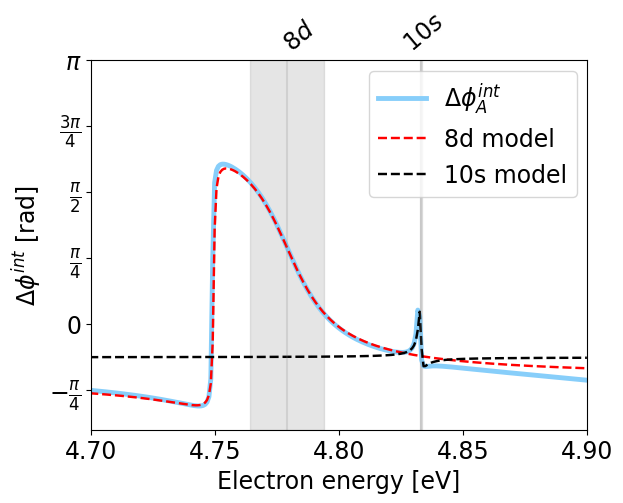

In [30]:
# integrated phases

fontsize = "17"

en, phase_int_a = atomic.get_integrated_atomic_phase(
    two_photons_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_abs,
    energies_mode="abs"
)

en_low_en, phase_int_w_low_en = atomic.get_integrated_atomic_phase(
    two_photons_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_low_en,
    energies_mode="abs"
)

_, M_emi_matched, M_abs_matched = utils_2ph.get_prepared_matrices(
    two_photons_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_abs,
    energies_mode="abs"
)

_, M_emi_matched_low_en, M_abs_matched_low_en = utils_2ph.get_prepared_matrices(
    two_photons_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_low_en,
    energies_mode="abs"
)


region_mask = np.logical_and(en >= 3.5, en < 4.9)
region_mask_low_en = np.logical_and(en_low_en >= 3.3, en_low_en < 3.5)

en_concat = np.concatenate((en_low_en[region_mask_low_en], en[region_mask]))
phase_int_a_concat = np.concatenate((phase_int_a_low_en[region_mask_low_en], phase_int_a[region_mask]))

M_emi_matched_concat = np.zeros((5, 3, len(en_concat)), dtype=np.complex128)
M_abs_matched_concat = np.zeros((5, 3, len(en_concat)), dtype=np.complex128)

for i in range(5):
    for K in range(3):
        M_emi_matched_concat[i, K, :] = np.concatenate((M_emi_matched_low_en[i, K, region_mask_low_en], M_emi_matched[i, K, region_mask]))
        M_abs_matched_concat[i, K, :] = np.concatenate((M_abs_matched_low_en[i, K, region_mask_low_en], M_abs_matched[i, K, region_mask]))


int_intens_concat = atomic.get_integrated_two_photons_intensity(hole_kappa_6p3half, M_emi_matched_concat, M_abs_matched_concat)

# index corresponding to the 8d resonance in the resonance_data list
res_id_8d = 5

# index corresponding to the 8d resonance in the resonance_data list
res_id_10s = 6

print("8d resonance:")

# calculate 8d resonance contribution
E_res_8d = rn_resonances[res_id_8d][0]
width_res_8d = rn_resonances[res_id_8d][1]
q_8d = rn_resonances[res_id_8d][3]
print("E_res_8d [eV]: ", E_res_8d)
print("width_res_8d [eV]: ", width_res_8d)
print("q_8d [eV]: ", q_8d)

eps_8d = complex_q.get_epsilon(en_concat, "abs", g_omega_IR_eV, E_res_8d, width_res_8d)

A_bg_8d, A_0_8d = complex_q.get_coefficients_for_integrated(
"abs",
eps_8d,
int_intens_concat,
q_8d,
eps_1=-q_8d,
eps_2=1/q_8d,
)
print("A_0_8d: ", A_0_8d)
print("A_bg_8d: ", A_bg_8d)

q_complex_8d = complex_q.get_complex_q_integrated(A_bg_8d, A_0_8d, q_8d)
print("q_complex_8d: ", q_complex_8d)

im_zero_8d, re_zero_1_8d, re_zero_2_8d = complex_q.get_zeros(q_complex_8d)
print("im_zero_8d: ", im_zero_8d)
print("re_zero_1_8d: ", re_zero_1_8d)
print("re_zero_2_8d: ", re_zero_2_8d)

phase_8d_approx = np.angle(
    np.conjugate((A_0_8d + A_bg_8d) * (eps_8d + q_complex_8d) / (eps_8d + 1 * 1j))
)

print("\n")

print("10s resonance:")
# calculate 10s resonance contribution
E_res_10s = rn_resonances[res_id_10s][0]
width_res_10s = rn_resonances[res_id_10s][1]
q_10s = rn_resonances[res_id_10s][3]
print("E_res_10s [eV]: ", E_res_10s)
print("width_res_10s [eV]: ", width_res_10s)
print("q_10s [eV]: ", q_10s)

eps_10s = complex_q.get_epsilon(en_concat, "abs", g_omega_IR_eV, E_res_10s, width_res_10s)

A_bg_10s, A_0_10s = complex_q.get_coefficients_for_integrated(
"abs",
eps_10s,
int_intens_concat,
q_10s,
eps_1=-q_10s,
eps_2=q_10s/3,
)
print("A_0_10s: ", A_0_10s)
print("A_bg_10s: ", A_bg_10s)

q_complex_10s = complex_q.get_complex_q_integrated(A_bg_10s, A_0_10s, q_10s)
print("q_complex_10s: ", q_complex_10s)

im_zero_10s, re_zero_1_10s, re_zero_2_10s = complex_q.get_zeros(q_complex_10s)
print("im_zero_10s: ", im_zero_10s)
print("re_zero_1_10s: ", re_zero_1_10s)
print("re_zero_2_10s: ", re_zero_2_10s)

phase_10s_approx = np.angle(
    np.conjugate((A_0_10s + A_bg_10s) * (eps_10s + q_complex_10s) / (eps_10s + 1 * 1j))
)


line_styles = ["solid", "dashed",  "dashdot", (3, (2, 1))]

plt.plot(en_concat, phase_int_a_concat, color="lightskyblue", linewidth=3.5, label="$\\Delta \\phi_A^{int}$")
plt.plot(en_concat, phase_8d_approx, linestyle="--", color="red", linewidth=1.75, label="8d model")
plt.plot(en_concat, phase_10s_approx, linestyle="--", color="black", linewidth=1.75, label="10s model")
plt.legend(fontsize=fontsize, loc=(0.56, 0.63));

ax= plt.gca()
ymin, ymax = ax.get_ylim()
ymin = -np.pi/2.5
ymax = np.pi
ax.set_ylim([ymin, ymax])
ax.set_ymargin(0)
ax.set_xmargin(0)
for i, (r, width, name, _) in enumerate(rn_resonances[res_id_8d: res_id_10s + 1]):
    r += g_omega_IR_eV
    plt.fill_betweenx([ymin, ymax], r-width/2,r+width/2, color="gray", alpha=.2)
    ax.plot([r, r],[ymin,ymax], color="gray",alpha=.2)
    if name == "$8d$":
        ax.text((r - 0.1 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    elif name == "$10s$":
        ax.text((r - 8.5 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    else:
        ax.text((r - 0.02), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)

plt.xlabel("Electron energy [eV]", fontsize=fontsize);
plt.ylabel("$\\Delta \\phi^{int}$ [rad]", fontsize=fontsize);


major = Multiple(4, np.pi, '\\pi')
minor = Multiple(16, np.pi, '\\pi')
ax.yaxis.set_major_locator(major.locator())
ax.yaxis.set_major_formatter(major.formatter())

plt.xticks([3.3 + i * 0.05 for i in range(33)],fontsize=fontsize);
plt.yticks(fontsize=fontsize);
plt.xlim([4.7, 4.9])

plt.savefig(f"atomic_int_model_8d_10s.pdf", format="pdf", bbox_inches="tight")

In [31]:
re = 0.41
im = 1.75

eps_i = re / (im - 1)
eps_r_1 = -re / 2 - np.sqrt((re / 2) ** 2 - im)
eps_r_2 = -re / 2 + np.sqrt((re / 2) ** 2 - im)

eps_i, eps_r_1, eps_r_2

C:\Users\shapo\AppData\Local\Temp\ipykernel_13892\3624237944.py:5: RuntimeWarning: invalid value encountered in sqrt
  eps_r_1 = -re / 2 - np.sqrt((re / 2) ** 2 - im)
C:\Users\shapo\AppData\Local\Temp\ipykernel_13892\3624237944.py:6: RuntimeWarning: invalid value encountered in sqrt
  eps_r_2 = -re / 2 + np.sqrt((re / 2) ** 2 - im)


(0.5466666666666666, np.float64(nan), np.float64(nan))

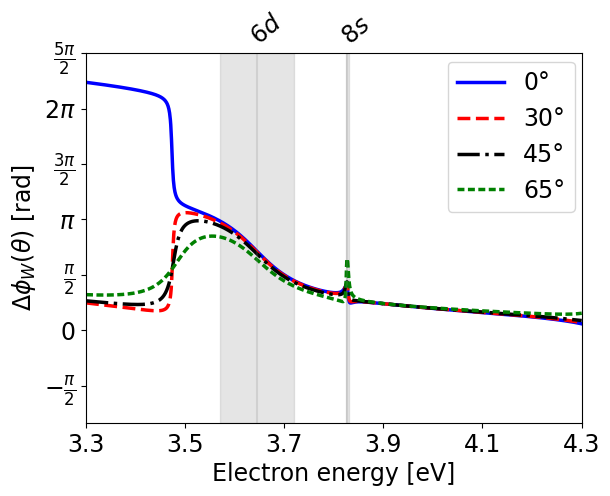

In [32]:
fontsize = "17"


angles = [0, 30, 45, 65]

en, phase_ang_w = wigner.get_wigner_phase(
    one_photon_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    g_omega_IR,
    angles,
    one_photon_2=one_photon_abs,
    g_omega_IR_2=g_omega_IR,
    energies_mode="abs"
)

en_low_en, phase_ang_w_low_en = wigner.get_wigner_phase(
    one_photon_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    g_omega_IR,
    angles,
    one_photon_2=one_photon_low_en,
    g_omega_IR_2=g_omega_IR,
    energies_mode="abs"
)

phase_ang_w_low_en[0, :] += 2 * np.pi

region_mask = np.logical_and(en >= 3.5, en < 4.9)
region_mask_low_en = np.logical_and(en_low_en >= 3.3, en_low_en < 3.5)

en_concat = np.concatenate((en_low_en[region_mask_low_en], en[region_mask]))
phase_ang_w_concat = np.zeros((len(angles), len(en_concat)))

for i in range(len(angles)):
    phase_ang_w_concat[i, :] = np.concatenate((phase_ang_w_low_en[i, region_mask_low_en], phase_ang_w[i, region_mask]))


line_styles = ["solid", "--", "dashdot", (3, (2, 1))]

cmap = blue_red_cmap(4)

colors = ["blue", "red", "black", "green"]
for i in range(len(angles)):
    plt.plot(en_concat, phase_ang_w_concat[i, :], color=colors[i], linewidth=2.5, linestyle=line_styles[i], label=f"{angles[i]}°")

plt.legend(fontsize=fontsize, loc=(0.73, 0.57));

ax= plt.gca()
ymin, ymax = ax.get_ylim()
ymin = -np.pi / 1.2
ymax = 10 * np.pi / 4
ax.set_ylim([ymin, ymax])
ax.set_ymargin(0)
ax.set_xmargin(0)
for i, (r, width, name, _) in enumerate(rn_resonances[1:3]):
    r += g_omega_IR_eV
    plt.fill_betweenx([ymin, ymax], r-width/2,r+width/2, color="gray", alpha=.2)
    ax.plot([r, r],[ymin,ymax], color="gray",alpha=.2)
    if name == "$8d$":
        ax.text((r - 0.1 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    elif name == "$10s$":
        ax.text((r - 8.5 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    else:
        ax.text((r - 0.02), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)

plt.xlabel("Electron energy [eV]", fontsize=fontsize);
plt.ylabel("$\\Delta \\phi_W(\\theta)$ [rad]", fontsize=fontsize);
major = Multiple(2, np.pi, '\\pi')
minor = Multiple(16, np.pi, '\\pi')
ax.yaxis.set_major_locator(major.locator())
ax.yaxis.set_major_formatter(major.formatter())

plt.xticks([3.3 + i * 0.2 for i in range(9)],fontsize=fontsize);
plt.yticks(fontsize=fontsize);
plt.xlim([3.3, 4.3])

plt.savefig(f"wigner_ang_6d_8s.pdf", format="pdf", bbox_inches="tight")


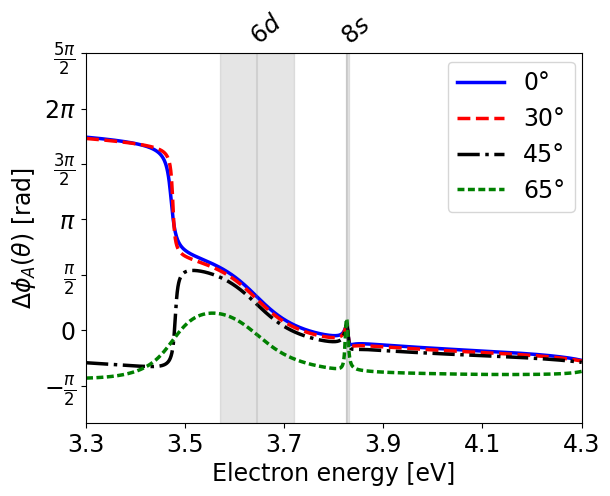

In [33]:
fontsize = "17"


angles = [0, 30, 45, 65]

en, phase_ang_a = atomic.get_atomic_phase(
    two_photons_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    angles,
    two_photons_2=two_photons_abs,
    energies_mode="abs"
)

en_low_en, phase_ang_a_low_en = atomic.get_atomic_phase(
    two_photons_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    angles,
    two_photons_2=two_photons_low_en,
    energies_mode="abs"
)


phase_ang_a_low_en[0, :] += 2 * np.pi
phase_ang_a_low_en[1, :] += 2 * np.pi

region_mask = np.logical_and(en >= 3.5, en < 4.9)
region_mask_low_en = np.logical_and(en_low_en >= 3.3, en_low_en < 3.5)

en_concat = np.concatenate((en_low_en[region_mask_low_en], en[region_mask]))
phase_ang_a_concat = np.zeros((len(angles), len(en_concat)))

for i in range(len(angles)):
    phase_ang_a_concat[i, :] = np.concatenate((phase_ang_a_low_en[i, region_mask_low_en], phase_ang_a[i, region_mask]))


line_styles = ["solid", "--", "dashdot", (3, (2, 1))]

cmap = blue_red_cmap(4)

# colors = ["blue", "red", cmap[2], cmap[1]]

colors = ["blue", "red", "black", "green"]

for i in range(len(angles)):
    plt.plot(en_concat, phase_ang_a_concat[i, :], color=colors[i], linewidth=2.5, linestyle=line_styles[i], label=f"{angles[i]}°")

plt.legend(fontsize=fontsize, loc=(0.73, 0.57));

ax= plt.gca()
ymin, ymax = ax.get_ylim()
ymin = -np.pi / 1.2
ymax = 10 * np.pi / 4
ax.set_ylim([ymin, ymax])
ax.set_ymargin(0)
ax.set_xmargin(0)
for i, (r, width, name, _) in enumerate(rn_resonances[1:3]):
    r += g_omega_IR_eV
    plt.fill_betweenx([ymin, ymax], r-width/2,r+width/2, color="gray", alpha=.2)
    ax.plot([r, r],[ymin,ymax], color="gray",alpha=.2)
    if name == "$8d$":
        ax.text((r - 0.1 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    elif name == "$10s$":
        ax.text((r - 8.5 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    else:
        ax.text((r - 0.02), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)

plt.xlabel("Electron energy [eV]", fontsize=fontsize);
plt.ylabel("$\\Delta \\phi_A(\\theta)$ [rad]", fontsize=fontsize);
major = Multiple(2, np.pi, '\\pi')
minor = Multiple(16, np.pi, '\\pi')
ax.yaxis.set_major_locator(major.locator())
ax.yaxis.set_major_formatter(major.formatter())

plt.xticks([3.3 + i * 0.2 for i in range(9)],fontsize=fontsize);
plt.yticks(fontsize=fontsize);
plt.xlim([3.3, 4.3])

plt.savefig(f"atomic_ang_6d_8s.pdf", format="pdf", bbox_inches="tight")


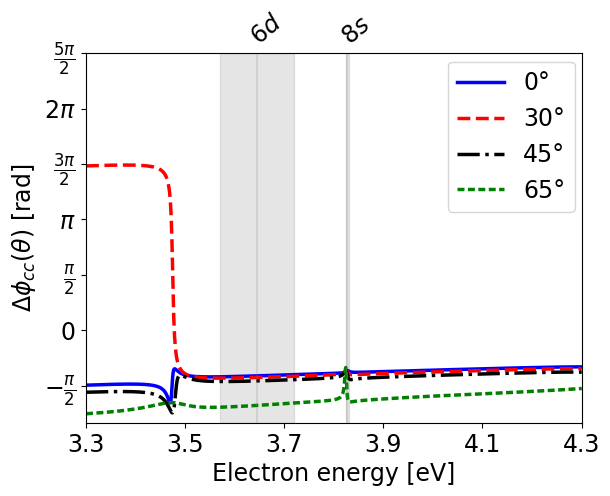

In [34]:
line_styles = ["solid", "--", "dashdot", (3, (2, 1))]

cmap = blue_red_cmap(4)

# colors = ["blue", "red", cmap[2], cmap[1]]

colors = ["blue", "red", "black", "green"]

for i in range(len(angles)):
    plt.plot(en_concat, (phase_ang_a_concat[i, :] - phase_ang_w_concat[i, :]), color=colors[i], linewidth=2.5, linestyle=line_styles[i], label=f"{angles[i]}°")

plt.legend(fontsize=fontsize, loc=(0.73, 0.57));

ax= plt.gca()
ymin, ymax = ax.get_ylim()
ymin = -np.pi / 1.2
ymax = 10 * np.pi / 4
ax.set_ylim([ymin, ymax])
ax.set_ymargin(0)
ax.set_xmargin(0)
for i, (r, width, name, _) in enumerate(rn_resonances[1:3]):
    r += g_omega_IR_eV
    plt.fill_betweenx([ymin, ymax], r-width/2,r+width/2, color="gray", alpha=.2)
    ax.plot([r, r],[ymin,ymax], color="gray",alpha=.2)
    if name == "$8d$":
        ax.text((r - 0.1 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    elif name == "$10s$":
        ax.text((r - 8.5 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    else:
        ax.text((r - 0.02), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)

plt.xlabel("Electron energy [eV]", fontsize=fontsize);
plt.ylabel("$\\Delta \\phi_{cc}(\\theta)$ [rad]", fontsize=fontsize);
major = Multiple(2, np.pi, '\\pi')
minor = Multiple(16, np.pi, '\\pi')
ax.yaxis.set_major_locator(major.locator())
ax.yaxis.set_major_formatter(major.formatter())

plt.xticks([3.3 + i * 0.2 for i in range(9)],fontsize=fontsize);
plt.yticks(fontsize=fontsize);
plt.xlim([3.3, 4.3])

plt.savefig(f"cc_ang_6d_8s.pdf", format="pdf", bbox_inches="tight")

In [35]:
import fortran_output_analysis.onephoton.onephoton_asymmetry_parameters as asym_p_1ph
import fortran_output_analysis.twophotons.twophotons_asymmetry_parameters as asym_p_2ph

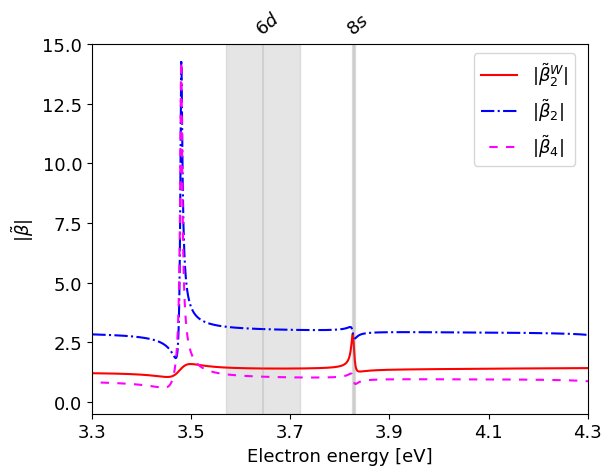

In [36]:
fontsize = "13"

en, b2_w = asym_p_1ph.get_complex_asymmetry_parameter(
    one_photon_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    g_omega_IR,
    one_photon_2=one_photon_abs,
    g_omega_IR_2=g_omega_IR,
    energies_mode="abs"
)

en_low_en, b2_w_low_en = asym_p_1ph.get_complex_asymmetry_parameter(
    one_photon_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    g_omega_IR,
    one_photon_2=one_photon_low_en,
    g_omega_IR_2=g_omega_IR,
    energies_mode="abs"
)


_, b2_a = asym_p_2ph.get_complex_asymmetry_parameter(
    two_photons_emi,
    2,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_abs,
    energies_mode="abs"
)

_, b2_a_low_en = asym_p_2ph.get_complex_asymmetry_parameter(
    two_photons_emi,
    2,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_low_en,
    energies_mode="abs"
)


_, b4_a = asym_p_2ph.get_complex_asymmetry_parameter(
    two_photons_emi,
    4,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_abs,
    energies_mode="abs"
)

_, b4_a_low_en = asym_p_2ph.get_complex_asymmetry_parameter(
    two_photons_emi,
    4,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_low_en,
    energies_mode="abs"
)

region_mask = np.logical_and(en >= 3.5, en < 4.9)
region_mask_low_en = np.logical_and(en_low_en >= 3.3, en_low_en < 3.5)

en_concat = np.concatenate((en_low_en[region_mask_low_en], en[region_mask]))
b2_w_concat = np.concatenate((b2_w_low_en[region_mask_low_en], b2_w[region_mask]))
b2_a_concat = np.concatenate((b2_a_low_en[region_mask_low_en], b2_a[region_mask]))
b4_a_concat = np.concatenate((b4_a_low_en[region_mask_low_en], b4_a[region_mask]))


plt.plot(en_concat, np.abs(b2_w_concat), color="red", linestyle="-", label="$|\\tilde{\\beta}_2^W|$")
plt.plot(en_concat, np.abs(b2_a_concat), color="blue", linestyle="-.", label="$|\\tilde{\\beta}_2|$")
plt.plot(en_concat, np.abs(b4_a_concat), color="magenta", linestyle=(4, (4, 4)), label="$|\\tilde{\\beta}_4|$")
plt.legend(fontsize=fontsize, loc=(0.77, 0.67));


ax= plt.gca()
ymin, ymax = ax.get_ylim()
ymin = -0.5
ymax = 15
ax.set_ylim([ymin, ymax])
ax.set_ymargin(0)
ax.set_xmargin(0)
for i, (r, width, name, _) in enumerate(rn_resonances[1:3]):
    r += g_omega_IR_eV
    plt.fill_betweenx([ymin, ymax], r-width/2,r+width/2, color="gray", alpha=.2)
    ax.plot([r, r],[ymin,ymax], color="gray",alpha=.2)
    if name == "$8d$":
        ax.text((r - 0.1 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    elif name == "$10s$":
        ax.text((r - 8.5 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    else:
        ax.text((r - 0.02), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)

plt.xlabel("Electron energy [eV]", fontsize=fontsize);
plt.ylabel("$|\\tilde{\\beta}|$", fontsize=fontsize);

plt.xticks([3.3 + i * 0.2 for i in range(9)],fontsize=fontsize);
plt.yticks(fontsize=fontsize);
plt.xlim([3.3, 4.3])

plt.savefig(f"complex_asymp_abs.pdf", format="pdf", bbox_inches="tight")



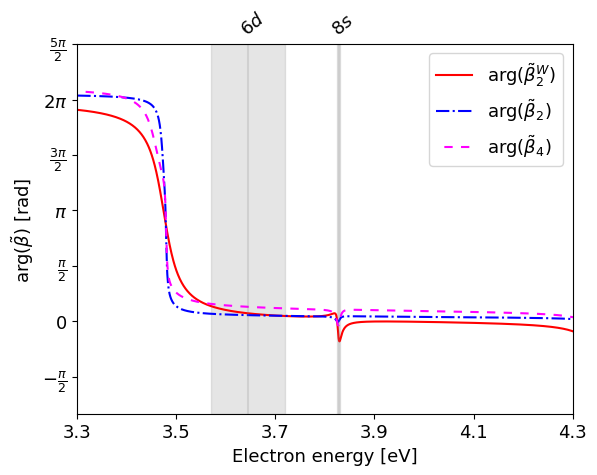

In [37]:
fontsize = "13"

en, b2_w = asym_p_1ph.get_complex_asymmetry_parameter(
    one_photon_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    g_omega_IR,
    one_photon_2=one_photon_abs,
    g_omega_IR_2=g_omega_IR,
    energies_mode="abs"
)

en_low_en, b2_w_low_en = asym_p_1ph.get_complex_asymmetry_parameter(
    one_photon_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    g_omega_IR,
    one_photon_2=one_photon_low_en,
    g_omega_IR_2=g_omega_IR,
    energies_mode="abs"
)


_, b2_a = asym_p_2ph.get_complex_asymmetry_parameter(
    two_photons_emi,
    2,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_abs,
    energies_mode="abs"
)

_, b2_a_low_en = asym_p_2ph.get_complex_asymmetry_parameter(
    two_photons_emi,
    2,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_low_en,
    energies_mode="abs"
)


_, b4_a = asym_p_2ph.get_complex_asymmetry_parameter(
    two_photons_emi,
    4,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_abs,
    energies_mode="abs"
)

_, b4_a_low_en = asym_p_2ph.get_complex_asymmetry_parameter(
    two_photons_emi,
    4,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_low_en,
    energies_mode="abs"
)

region_mask = np.logical_and(en >= 3.5, en < 4.9)
region_mask_low_en = np.logical_and(en_low_en >= 3.3, en_low_en < 3.5)

en_concat = np.concatenate((en_low_en[region_mask_low_en], en[region_mask]))
b2_w_concat = np.concatenate((b2_w_low_en[region_mask_low_en], b2_w[region_mask]))
b2_a_concat = np.concatenate((b2_a_low_en[region_mask_low_en], b2_a[region_mask]))
b4_a_concat = np.concatenate((b4_a_low_en[region_mask_low_en], b4_a[region_mask]))

phase_b2_w = np.angle(b2_w_concat)
phase_b2_a = np.angle(b2_a_concat)
phase_b4_a = np.angle(b4_a_concat)

phase_b2_w[en_concat < 3.474] += 2 * np.pi
phase_b2_a[en_concat < 3.479] += 2 * np.pi
phase_b4_a[en_concat < 3.479] += 2 * np.pi

plt.plot(en_concat, phase_b2_w, color="red", linestyle="-", label="arg($\\tilde{\\beta}_2^W$)")
plt.plot(en_concat, phase_b2_a, color="blue", linestyle="-.", label="arg($\\tilde{\\beta}_2$)")
plt.plot(en_concat, phase_b4_a, color="magenta", linestyle=(4, (4, 4)), label="arg($\\tilde{\\beta}_4$)")
plt.legend(fontsize=fontsize, loc=(0.71, 0.67));


ax= plt.gca()
ymin, ymax = ax.get_ylim()
ymin = -np.pi / 1.2
ymax = 5 * np.pi /2
ax.set_ylim([ymin, ymax])
ax.set_ymargin(0)
ax.set_xmargin(0)
for i, (r, width, name, _) in enumerate(rn_resonances[1:3]):
    r += g_omega_IR_eV
    plt.fill_betweenx([ymin, ymax], r-width/2,r+width/2, color="gray", alpha=.2)
    ax.plot([r, r],[ymin,ymax], color="gray",alpha=.2)
    if name == "$8d$":
        ax.text((r - 0.1 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    elif name == "$10s$":
        ax.text((r - 8.5 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    else:
        ax.text((r - 0.02), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)

plt.xlabel("Electron energy [eV]", fontsize=fontsize);
plt.ylabel("arg($\\tilde{\\beta}$) [rad]", fontsize=fontsize);

major = Multiple(2, np.pi, '\\pi')
minor = Multiple(16, np.pi, '\\pi')
ax.yaxis.set_major_locator(major.locator())
ax.yaxis.set_major_formatter(major.formatter())
plt.xticks([3.3 + i * 0.2 for i in range(9)],fontsize=fontsize);
plt.yticks(fontsize=fontsize);
plt.xlim([3.3, 4.3])

plt.savefig(f"complex_asymp_phase.pdf", format="pdf", bbox_inches="tight")



6d resonance: 
E_res_6d [eV]:  2.095
width_res_6d [eV]:  0.1488
q_6d [eV]:  2.91
A_0_6d_int:  (14.740536080921755-14.578744478270966j)
A_bg_6d_int:  (4.180897562948022-5.4160553959671764j)
q_complex_6d_int:  (2.215296522676777+0.31980461301661506j)


For $\theta$ = 0: 
q_complex_6d_ang:  (2.295771403052418-0.031706431437647245j)
im_zero_6d_ang:  -2.225217690901994
re_zero_1_6d_ang:  0.013728698869190703
re_zero_2_6d_ang:  -2.309500101921609


For $\theta$ = 30: 
q_complex_6d_ang:  (2.281277644484251+0.04040862860785686j)
im_zero_6d_ang:  -2.377342807047806
re_zero_1_6d_ang:  -0.017852870157737177
re_zero_2_6d_ang:  -2.2634247743265137


For $\theta$ = 45: 
q_complex_6d_ang:  (2.253479216886955+0.1663800070648221j)
im_zero_6d_ang:  -2.703245166844487
re_zero_1_6d_ang:  -0.07642435187974517
re_zero_2_6d_ang:  -2.17705486500721


For $\theta$ = 65: 
q_complex_6d_ang:  (2.135311877330866+0.5927097369997747j)
im_zero_6d_ang:  -5.242727536871375
re_zero_1_6d_ang:  -0.3279401375851856
re_zero

D:\photoionization_analysis\fortran_output_analysis\complex_q_parameter.py:258: RuntimeWarning: invalid value encountered in sqrt
  re_zero_1 = -np.real(q_complex) / 2 + np.sqrt(
D:\photoionization_analysis\fortran_output_analysis\complex_q_parameter.py:261: RuntimeWarning: invalid value encountered in sqrt
  re_zero_2 = -np.real(q_complex) / 2 - np.sqrt(


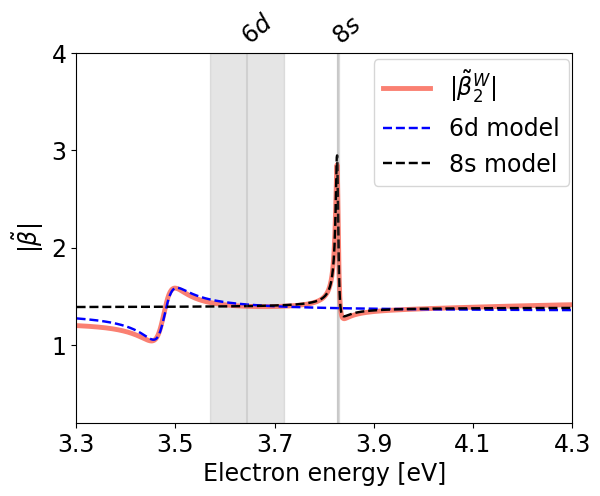

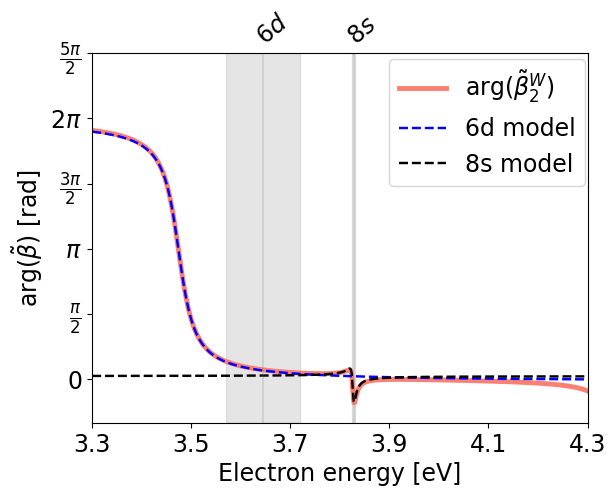

In [38]:
fontsize = "17"

angles = [0, 30, 45, 65]

en, M_emi_matched, M_abs_matched = utils_1ph.get_prepared_matrices(
    one_photon_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    g_omega_IR,
    one_photon_2=one_photon_abs,
    g_omega_IR_2=g_omega_IR,
    energies_mode="abs"
)

en_low_en, M_emi_matched_low_en, M_abs_matched_low_en = utils_1ph.get_prepared_matrices(
    one_photon_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    g_omega_IR,
    one_photon_2=one_photon_low_en,
    g_omega_IR_2=g_omega_IR,
    energies_mode="abs"
)


region_mask = np.logical_and(en >= 3.5, en < 4.9)
region_mask_low_en = np.logical_and(en_low_en >= 3.3, en_low_en < 3.5)

en_concat = np.concatenate((en_low_en[region_mask_low_en], en[region_mask]))

M_emi_matched_concat = np.zeros((3, len(en_concat)), dtype=np.complex128)
M_abs_matched_concat = np.zeros((3, len(en_concat)), dtype=np.complex128)

for i in range(3):
    M_emi_matched_concat[i, :] = np.concatenate((M_emi_matched_low_en[i, region_mask_low_en], M_emi_matched[i, region_mask]))
    M_abs_matched_concat[i, :] = np.concatenate((M_abs_matched_low_en[i, region_mask_low_en], M_abs_matched[i, region_mask]))

int_intens_concat = wigner.get_wigner_intensity(hole_kappa_6p3half, M_emi_matched_concat, M_abs_matched_concat)

_, b2_w = asym_p_1ph.get_complex_asymmetry_parameter(
    one_photon_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    g_omega_IR,
    one_photon_2=one_photon_abs,
    g_omega_IR_2=g_omega_IR,
    energies_mode="abs"
)

_, b2_w_low_en = asym_p_1ph.get_complex_asymmetry_parameter(
    one_photon_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    g_omega_IR,
    one_photon_2=one_photon_low_en,
    g_omega_IR_2=g_omega_IR,
    energies_mode="abs"
)

b2_w_concat = np.concatenate((b2_w_low_en[region_mask_low_en], b2_w[region_mask]))

# index corresponding to the 6d resonance in the resonance_data list
res_id_6d = 1

# index corresponding to the 6d resonance in the resonance_data list
res_id_8s = 2

print("6d resonance: ")

# calculate 6d resonance contribution
E_res_6d = rn_resonances[res_id_6d][0]
width_res_6d = rn_resonances[res_id_6d][1]
q_6d = rn_resonances[res_id_6d][3]
print("E_res_6d [eV]: ", E_res_6d)
print("width_res_6d [eV]: ", width_res_6d)
print("q_6d [eV]: ", q_6d)

eps_6d = complex_q.get_epsilon(en_concat, "abs", g_omega_IR_eV, E_res_6d, width_res_6d)

A_bg_6d_int, A_0_6d_int = complex_q.get_coefficients_for_integrated(
"abs",
eps_6d,
int_intens_concat,
q_6d,
# eps_1=-q_6d/1.5,
# eps_2=1/q_6d,
eps_1=-2.49,
eps_2=-1.95
)
print("A_0_6d_int: ", A_0_6d_int)
print("A_bg_6d_int: ", A_bg_6d_int)

q_complex_6d_int = complex_q.get_complex_q_integrated(A_bg_6d_int, A_0_6d_int, q_6d)
print("q_complex_6d_int: ", q_complex_6d_int)

# q complex coefficients for the second order beta parameter
A_bg_6d_b2, A_0_6d_b2 = complex_q.get_coefficients_for_beta_param(
                                "abs", 
                                eps_6d,
                                int_intens_concat,
                                b2_w_concat,
                                q_6d,
                                # eps_1=-q_6d,
                                # eps_2=1/q_6d,
                                eps_1=-2.49,
                                eps_2=-1.95
                            )

# q complex coefficients for the fourth order beta parameter will be zero
# since the fourth order beta is zero in the one photon case
A_bg_6d_b4, A_0_6d_b4 = 0, 0

print("\n")
for angle in angles:
    print(f"For $\\theta$ = {angle}: ")
    q_complex_6d_ang = complex_q.get_complex_q_angular(
        angle,
        A_bg_6d_int, 
        A_0_6d_int,
        A_bg_6d_b2, 
        A_0_6d_b2,
        A_bg_6d_b4, 
        A_0_6d_b4,
        q_6d
    )
    print("q_complex_6d_ang: ", q_complex_6d_ang)

    # zeros of the real and imaginary part for 6d resonance
    im_zero_6d_ang, re_zero_1_6d_ang, re_zero_2_6d_ang = complex_q.get_zeros(q_complex_6d_ang)
    print("im_zero_6d_ang: ", im_zero_6d_ang)
    print("re_zero_1_6d_ang: ", re_zero_1_6d_ang)
    print("re_zero_2_6d_ang: ", re_zero_2_6d_ang)
    print("\n")

q_b2_6d = complex_q.get_complex_q_integrated(A_bg_6d_b2, A_0_6d_b2, q_6d)
b2_w_6d_approx = (
    np.conjugate(
(A_0_6d_b2 + A_bg_6d_b2) * (eps_6d + q_b2_6d) / ((A_0_6d_int + A_bg_6d_int) * (eps_6d + q_complex_6d_int))
    )
)

print("\n")
print("8s resonance: ")

# calculate 8s resonance contribution
E_res_8s = rn_resonances[res_id_8s][0]
width_res_8s = rn_resonances[res_id_8s][1]
q_8s = rn_resonances[res_id_8s][3]
print("E_res_8s [eV]: ", E_res_8s)
print("width_res_8s [eV]: ", width_res_8s)
print("q_8s [eV]: ", q_8s)

eps_8s = complex_q.get_epsilon(en_concat, "abs", g_omega_IR_eV, E_res_8s, width_res_8s)

A_bg_8s_int, A_0_8s_int = complex_q.get_coefficients_for_integrated(
"abs",
eps_8s,
int_intens_concat,
q_8s,
# eps_1=-q_8s/1.5,
# eps_2=1/q_8s,
eps_1=-q_8s,
eps_2=1/q_8s,
)
print("A_0_8s_int: ", A_0_8s_int)
print("A_bg_8s_int: ", A_bg_8s_int)

q_complex_8s_int = complex_q.get_complex_q_integrated(A_bg_8s_int, A_0_8s_int, q_8s)
print("q_complex_8s_int: ", q_complex_8s_int)

# q complex coefficients for the second order beta parameter
A_bg_8s_b2, A_0_8s_b2 = complex_q.get_coefficients_for_beta_param(
                                "abs", 
                                eps_8s,
                                int_intens_concat,
                                b2_w_concat,
                                q_8s,
                                eps_1=-q_8s,
                                eps_2=1/q_8s,
                            )

# q complex coefficients for the fourth order beta parameter will be zero
# since the fourth order beta is zero in the one photon case
A_bg_8s_b4, A_0_8s_b4 = 0, 0

print("\n")
for angle in angles:
    print(f"For $\\theta$ = {angle}: ")
    q_complex_8s_ang = complex_q.get_complex_q_angular(
        angle,
        A_bg_8s_int, 
        A_0_8s_int,
        A_bg_8s_b2, 
        A_0_8s_b2,
        A_bg_8s_b4, 
        A_0_8s_b4,
        q_8s
    )
    print("q_complex_8s_ang: ", q_complex_8s_ang)

    # zeros of the real and imaginary part for 8s resonance
    im_zero_8s_ang, re_zero_1_8s_ang, re_zero_2_8s_ang = complex_q.get_zeros(q_complex_8s_ang)
    print("im_zero_8s_ang: ", im_zero_8s_ang)
    print("re_zero_1_8s_ang: ", re_zero_1_8s_ang)
    print("re_zero_2_8s_ang: ", re_zero_2_8s_ang)
    print("\n")

q_b2_8s = complex_q.get_complex_q_integrated(A_bg_8s_b2, A_0_8s_b2, q_8s)
b2_w_8s_approx = (
    np.conjugate(
(A_0_8s_b2 + A_bg_8s_b2) * (eps_8s + q_b2_8s) / ((A_0_8s_int + A_bg_8s_int) * (eps_8s + q_complex_8s_int))
)
)

plt.figure("Abs")
plt.plot(en_concat, np.abs(b2_w_concat), color="salmon", linewidth=3.5, label="$|\\tilde{\\beta}_2^W|$")
plt.plot(en_concat, np.abs(b2_w_6d_approx), color="blue", linewidth=1.75, linestyle="--", label="6d model")
plt.plot(en_concat, np.abs(b2_w_8s_approx), color="black", linewidth=1.75, linestyle="--", label="8s model")

plt.legend(fontsize=fontsize, loc=(0.6, 0.64))

ax= plt.gca()
ymin, ymax = ax.get_ylim()
ymin = 0.2
ymax = 4
ax.set_ylim([ymin, ymax])
ax.set_ymargin(0)
ax.set_xmargin(0)
for i, (r, width, name, _) in enumerate(rn_resonances[res_id_6d: res_id_8s + 1]):
    r += g_omega_IR_eV
    plt.fill_betweenx([ymin, ymax], r-width/2,r+width/2, color="gray", alpha=.2)
    ax.plot([r, r],[ymin,ymax], color="gray",alpha=.2)
    if name == "$8d$":
        ax.text((r - 0.1 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    elif name == "$10s$":
        ax.text((r - 8.5 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    else:
        ax.text((r - 0.02), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)

plt.xlabel("Electron energy [eV]", fontsize=fontsize);
plt.ylabel("$|\\tilde{\\beta}|$", fontsize=fontsize);

plt.xticks([3.3 + i * 0.2 for i in range(9)],fontsize=fontsize);
plt.yticks(fontsize=fontsize);
plt.xlim([3.3, 4.3])
plt.savefig(f"b2_wigner_abs_model.pdf", format="pdf", bbox_inches="tight")



plt.figure("phase")
b2_w_phase = np.angle(b2_w_concat)
b2_w_phase_6d_approx = np.angle(b2_w_6d_approx)
b2_w_phase_8s_approx = np.angle(b2_w_8s_approx)

b2_w_phase[en_concat < 3.474] += 2 * np.pi
b2_w_phase_6d_approx[en_concat < 3.474] += 2 * np.pi
# b2_w_phase_8s_approx[en_concat < 3.474] += 2 * np.pi

plt.plot(en_concat, b2_w_phase, color="salmon", linewidth=3.5, label="arg($\\tilde{\\beta}_2^W$)")
plt.plot(en_concat, b2_w_phase_6d_approx, color="blue", linewidth=1.75, linestyle="--", label="6d model")
plt.plot(en_concat, b2_w_phase_8s_approx, color="black", linewidth=1.75, linestyle="--", label="8s model")

plt.legend(fontsize=fontsize, loc=(0.6, 0.64))

ax= plt.gca()
ymin, ymax = ax.get_ylim()
ymin = - np.pi / 3
ymax = 5 * np.pi / 2
ax.set_ylim([ymin, ymax])
ax.set_ymargin(0)
ax.set_xmargin(0)
for i, (r, width, name, _) in enumerate(rn_resonances[res_id_6d: res_id_8s + 1]):
    r += g_omega_IR_eV
    plt.fill_betweenx([ymin, ymax], r-width/2,r+width/2, color="gray", alpha=.2)
    ax.plot([r, r],[ymin,ymax], color="gray",alpha=.2)
    if name == "$8d$":
        ax.text((r - 0.1 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    elif name == "$10s$":
        ax.text((r - 8.5 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    else:
        ax.text((r - 0.02), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)

plt.xlabel("Electron energy [eV]", fontsize=fontsize);
plt.ylabel("arg($\\tilde{\\beta}$) [rad]", fontsize=fontsize);

major = Multiple(2, np.pi, '\\pi')
minor = Multiple(16, np.pi, '\\pi')
ax.yaxis.set_major_locator(major.locator())
ax.yaxis.set_major_formatter(major.formatter())
plt.xticks([3.3 + i * 0.2 for i in range(9)],fontsize=fontsize);
plt.yticks(fontsize=fontsize);
plt.xlim([3.3, 4.3])
plt.savefig(f"b2_wigner_phase_model.pdf", format="pdf", bbox_inches="tight")

6d resonance: 
E_res_6d [eV]:  2.095
width_res_6d [eV]:  0.1488
q_6d [eV]:  2.91
A_0_6d_int:  (104204.97418706305+87533.81457101162j)
A_bg_6d_int:  (18510.0806392699+34316.73855355302j)
q_complex_6d_int:  (2.216710679353398+0.025474124988142468j)
6d resonance: 
For $\theta$ = 0: 
q_complex_6d_ang:  (2.315656866169012-0.09182174327111407j)
im_zero_6d_ang:  -2.1209111106647036
re_zero_1_6d_ang:  0.03899587471093513
re_zero_2_6d_ang:  -2.354652740879947


For $\theta$ = 30: 
q_complex_6d_ang:  (2.2728674328616467-0.042233047221947116j)
im_zero_6d_ang:  -2.1807669972852355
re_zero_1_6d_ang:  0.01843192036971808
re_zero_2_6d_ang:  -2.2912993532313646


For $\theta$ = 45: 
q_complex_6d_ang:  (2.206367456370689+0.05956252521615349j)
im_zero_6d_ang:  -2.3461075462542667
re_zero_1_6d_ang:  -0.027334383287666686
re_zero_2_6d_ang:  -2.1790330730830223


For $\theta$ = 65: 
q_complex_6d_ang:  (2.2593501056429313+0.6398408078593466j)
im_zero_6d_ang:  -6.273198504845004
re_zero_1_6d_ang:  -0.3319752

D:\photoionization_analysis\fortran_output_analysis\complex_q_parameter.py:258: RuntimeWarning: invalid value encountered in sqrt
  re_zero_1 = -np.real(q_complex) / 2 + np.sqrt(
D:\photoionization_analysis\fortran_output_analysis\complex_q_parameter.py:261: RuntimeWarning: invalid value encountered in sqrt
  re_zero_2 = -np.real(q_complex) / 2 - np.sqrt(


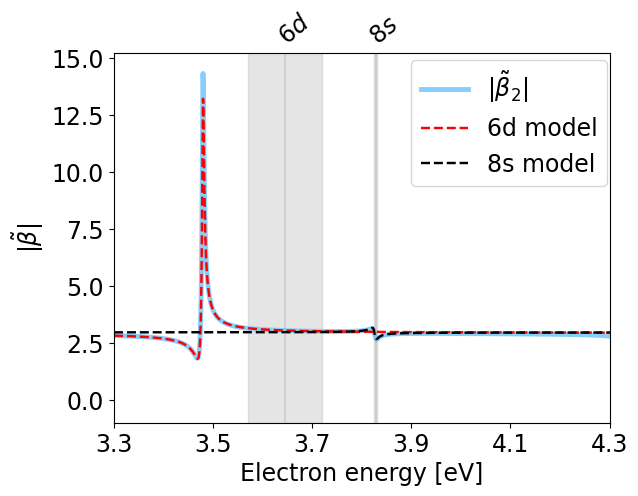

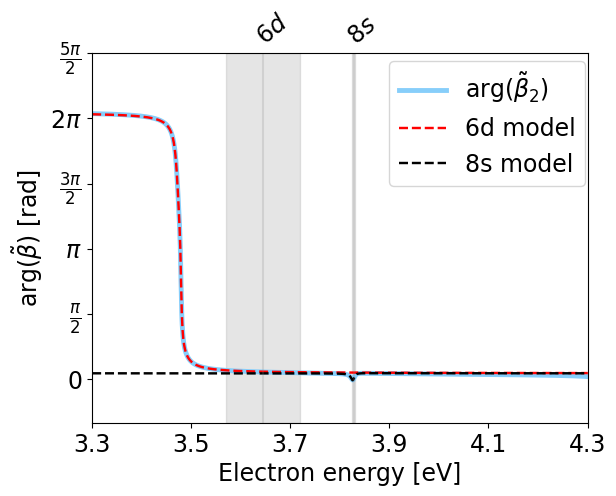

In [39]:
fontsize = "17"

angles = [0, 30, 45, 65]

en, M_emi_matched, M_abs_matched = utils_2ph.get_prepared_matrices(
    two_photons_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_abs,
    energies_mode="abs"
)

en_low_en, M_emi_matched_low_en, M_abs_matched_low_en = utils_2ph.get_prepared_matrices(
    two_photons_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_low_en,
    energies_mode="abs"
)

_, b2_a = asym_p_2ph.get_complex_asymmetry_parameter(
    two_photons_emi,
    2,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_abs,
    energies_mode="abs"
)

_, b2_a_low_en = asym_p_2ph.get_complex_asymmetry_parameter(
    two_photons_emi,
    2,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_low_en,
    energies_mode="abs"
)


_, b4_a = asym_p_2ph.get_complex_asymmetry_parameter(
    two_photons_emi,
    4,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_abs,
    energies_mode="abs"
)

_, b4_a_low_en = asym_p_2ph.get_complex_asymmetry_parameter(
    two_photons_emi,
    4,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_low_en,
    energies_mode="abs"
)


region_mask = np.logical_and(en >= 3.5, en < 4.9)
region_mask_low_en = np.logical_and(en_low_en >= 3.3, en_low_en < 3.5)

en_concat = np.concatenate((en_low_en[region_mask_low_en], en[region_mask]))

M_emi_matched_concat = np.zeros((5, 3, len(en_concat)), dtype=np.complex128)
M_abs_matched_concat = np.zeros((5, 3, len(en_concat)), dtype=np.complex128)

for i in range(5):
    for K in range(3):
        M_emi_matched_concat[i, K, :] = np.concatenate((M_emi_matched_low_en[i, K, region_mask_low_en], M_emi_matched[i, K, region_mask]))
        M_abs_matched_concat[i, K, :] = np.concatenate((M_abs_matched_low_en[i, K, region_mask_low_en], M_abs_matched[i, K, region_mask]))


int_intens_concat = atomic.get_integrated_two_photons_intensity(hole_kappa_6p3half, M_emi_matched_concat, M_abs_matched_concat)

b2_a_concat = np.concatenate((b2_a_low_en[region_mask_low_en], b2_a[region_mask]))
b4_a_concat = np.concatenate((b4_a_low_en[region_mask_low_en], b4_a[region_mask]))


# index corresponding to the 6d resonance in the resonance_data list
res_id_6d = 1

# index corresponding to the 6d resonance in the resonance_data list
res_id_8s = 2

print("6d resonance: ")

# calculate 6d resonance contribution
E_res_6d = rn_resonances[res_id_6d][0]
width_res_6d = rn_resonances[res_id_6d][1]
q_6d = rn_resonances[res_id_6d][3]
print("E_res_6d [eV]: ", E_res_6d)
print("width_res_6d [eV]: ", width_res_6d)
print("q_6d [eV]: ", q_6d)

eps_6d = complex_q.get_epsilon(en_concat, "abs", g_omega_IR_eV, E_res_6d, width_res_6d)

A_bg_6d_int, A_0_6d_int = complex_q.get_coefficients_for_integrated(
"abs",
eps_6d,
int_intens_concat,
q_6d,
# eps_1=-q_6d/1.5,
# eps_2=1/q_6d,
eps_1=-2.49,
eps_2=-1.95
)
print("A_0_6d_int: ", A_0_6d_int)
print("A_bg_6d_int: ", A_bg_6d_int)

q_complex_6d_int = complex_q.get_complex_q_integrated(A_bg_6d_int, A_0_6d_int, q_6d)
print("q_complex_6d_int: ", q_complex_6d_int)

# q complex coefficients for the second order beta parameter
A_bg_6d_b2, A_0_6d_b2 = complex_q.get_coefficients_for_beta_param(
                                "abs", 
                                eps_6d,
                                int_intens_concat,
                                b2_a_concat,
                                q_6d,
                                # eps_1=-q_6d/1.3,
                                # eps_2=1/q_6d,
                                eps_1=-2.49,
                                eps_2=-1.95
                            )

# q complex coefficients for the fourth order beta parameter will be zero
# since the fourth order beta is zero in the one photon case
A_bg_6d_b4, A_0_6d_b4 = complex_q.get_coefficients_for_beta_param(
                                "abs", 
                                eps_6d,
                                int_intens_concat,
                                b4_a_concat,
                                q_6d,
                                # eps_1=-q_6d,
                                # eps_2=1/q_6d,
                                eps_1=-2.49,
                                eps_2=-1.95
                            )

print("6d resonance: ")

for angle in angles:
    print(f"For $\\theta$ = {angle}: ")
    q_complex_6d_ang = complex_q.get_complex_q_angular(
        angle,
        A_bg_6d_int, 
        A_0_6d_int,
        A_bg_6d_b2, 
        A_0_6d_b2,
        A_bg_6d_b4, 
        A_0_6d_b4,
        q_6d
    )
    print("q_complex_6d_ang: ", q_complex_6d_ang)

    # zeros of the real and imaginary part for 6d resonance
    im_zero_6d_ang, re_zero_1_6d_ang, re_zero_2_6d_ang = complex_q.get_zeros(q_complex_6d_ang)
    print("im_zero_6d_ang: ", im_zero_6d_ang)
    print("re_zero_1_6d_ang: ", re_zero_1_6d_ang)
    print("re_zero_2_6d_ang: ", re_zero_2_6d_ang)
    print("\n")

q_b2_6d = complex_q.get_complex_q_integrated(A_bg_6d_b2, A_0_6d_b2, q_6d)
b2_a_6d_approx = (
    np.conjugate(
(A_0_6d_b2 + A_bg_6d_b2) * (eps_6d + q_b2_6d) / ((A_0_6d_int + A_bg_6d_int) * (eps_6d + q_complex_6d_int))
    )
)

q_b4_6d = complex_q.get_complex_q_integrated(A_bg_6d_b4, A_0_6d_b4, q_6d)
b4_a_6d_approx = (
    np.conjugate(
(A_0_6d_b4 + A_bg_6d_b4) * (eps_6d + q_b4_6d) / ((A_0_6d_int + A_bg_6d_int) * (eps_6d + q_complex_6d_int))
    )
)

print("\n")

print("8s resonance: ")

# calculate 8s resonance contribution
E_res_8s = rn_resonances[res_id_8s][0]
width_res_8s = rn_resonances[res_id_8s][1]
q_8s = rn_resonances[res_id_8s][3]
print("E_res_8s [eV]: ", E_res_8s)
print("width_res_8s [eV]: ", width_res_8s)
print("q_8s [eV]: ", q_8s)

eps_8s = complex_q.get_epsilon(en_concat, "abs", g_omega_IR_eV, E_res_8s, width_res_8s)

A_bg_8s_int, A_0_8s_int = complex_q.get_coefficients_for_integrated(
"abs",
eps_8s,
int_intens_concat,
q_8s,
# eps_1=-q_8s/1.5,
# eps_2=1/q_8s,
eps_1=-q_8s,
eps_2=1/q_8s,
)
print("A_0_8s_int: ", A_0_8s_int)
print("A_bg_8s_int: ", A_bg_8s_int)

q_complex_8s_int = complex_q.get_complex_q_integrated(A_bg_8s_int, A_0_8s_int, q_8s)
print("q_complex_8s_int: ", q_complex_8s_int)

# q complex coefficients for the second order beta parameter
A_bg_8s_b2, A_0_8s_b2 = complex_q.get_coefficients_for_beta_param(
                                "abs", 
                                eps_8s,
                                int_intens_concat,
                                b2_a_concat,
                                q_8s,
                                eps_1=-q_8s,
                                eps_2=1/q_8s,
                            )

# q complex coefficients for the fourth order beta parameter will be zero
# since the fourth order beta is zero in the one photon case
A_bg_8s_b4, A_0_8s_b4 = complex_q.get_coefficients_for_beta_param(
                                "abs", 
                                eps_8s,
                                int_intens_concat,
                                b4_a_concat,
                                q_8s,
                                eps_1=-q_8s,
                                eps_2=1/q_8s,
                            )

print("8s resonance: ")

for angle in angles:
    print(f"For $\\theta$ = {angle}: ")
    q_complex_8s_ang = complex_q.get_complex_q_angular(
        angle,
        A_bg_8s_int, 
        A_0_8s_int,
        A_bg_8s_b2, 
        A_0_8s_b2,
        A_bg_8s_b4, 
        A_0_8s_b4,
        q_8s
    )
    print("q_complex_8s_ang: ", q_complex_8s_ang)

    # zeros of the real and imaginary part for 8s resonance
    im_zero_8s_ang, re_zero_1_8s_ang, re_zero_2_8s_ang = complex_q.get_zeros(q_complex_8s_ang)
    print("im_zero_8s_ang: ", im_zero_8s_ang)
    print("re_zero_1_8s_ang: ", re_zero_1_8s_ang)
    print("re_zero_2_8s_ang: ", re_zero_2_8s_ang)
    print("\n")

q_b2_8s = complex_q.get_complex_q_integrated(A_bg_8s_b2, A_0_8s_b2, q_8s)
b2_a_8s_approx = (
    np.conjugate(
(A_0_8s_b2 + A_bg_8s_b2) * (eps_8s + q_b2_8s) / ((A_0_8s_int + A_bg_8s_int) * (eps_8s + q_complex_8s_int))
    )
)

q_b4_8s = complex_q.get_complex_q_integrated(A_bg_8s_b4, A_0_8s_b4, q_8s)
b4_a_8s_approx = (
    np.conjugate(
(A_0_8s_b4 + A_bg_8s_b4) * (eps_8s + q_b4_8s) / ((A_0_8s_int + A_bg_8s_int) * (eps_8s + q_complex_8s_int))
    )
)

plt.figure("Abs_b2")
plt.plot(en_concat, np.abs(b2_a_concat), color="lightskyblue", linewidth=3.5, label="$|\\tilde{\\beta}_2|$")
plt.plot(en_concat, np.abs(b2_a_6d_approx), color="red", linewidth=1.75, linestyle="--", label="6d model")
plt.plot(en_concat, np.abs(b2_a_8s_approx), color="black", linewidth=1.75, linestyle="--", label="8s model")

plt.legend(fontsize=fontsize, loc=(0.6, 0.64))

ax= plt.gca()
ymin, ymax = ax.get_ylim()
ymin = -1
# ymax = 4
ax.set_ylim([ymin, ymax])
ax.set_ymargin(0)
ax.set_xmargin(0)
for i, (r, width, name, _) in enumerate(rn_resonances[res_id_6d: res_id_8s + 1]):
    r += g_omega_IR_eV
    plt.fill_betweenx([ymin, ymax], r-width/2,r+width/2, color="gray", alpha=.2)
    ax.plot([r, r],[ymin,ymax], color="gray",alpha=.2)
    if name == "$8d$":
        ax.text((r - 0.1 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    elif name == "$10s$":
        ax.text((r - 8.5 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    else:
        ax.text((r - 0.02), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)

plt.xlabel("Electron energy [eV]", fontsize=fontsize);
plt.ylabel("$|\\tilde{\\beta}|$", fontsize=fontsize);

plt.xticks([3.3 + i * 0.2 for i in range(9)],fontsize=fontsize);
plt.yticks(fontsize=fontsize);
plt.xlim([3.3, 4.3])
plt.savefig(f"b2_atomic_abs_model.pdf", format="pdf", bbox_inches="tight")



plt.figure("phase_b2")
b2_a_phase = np.angle(b2_a_concat)
b2_a_phase_6d_approx = np.angle(b2_a_6d_approx)
b2_a_phase_8s_approx = np.angle(b2_a_8s_approx)

b2_a_phase[en_concat < 3.479] += 2 * np.pi
b2_a_phase_6d_approx[en_concat < 3.479] += 2 * np.pi
# b2_w_phase_8s_approx[en_concat < 3.474] += 2 * np.pi

plt.plot(en_concat, b2_a_phase, color="lightskyblue", linewidth=3.5, label="arg($\\tilde{\\beta}_2$)")
plt.plot(en_concat, b2_a_phase_6d_approx, color="red", linewidth=1.75, linestyle="--", label="6d model")
plt.plot(en_concat, b2_a_phase_8s_approx, color="black", linewidth=1.75, linestyle="--", label="8s model")

plt.legend(fontsize=fontsize, loc=(0.6, 0.64))

ax= plt.gca()
ymin, ymax = ax.get_ylim()
ymin = - np.pi / 3
ymax = 5 * np.pi / 2
ax.set_ylim([ymin, ymax])
ax.set_ymargin(0)
ax.set_xmargin(0)
for i, (r, width, name, _) in enumerate(rn_resonances[res_id_6d: res_id_8s + 1]):
    r += g_omega_IR_eV
    plt.fill_betweenx([ymin, ymax], r-width/2,r+width/2, color="gray", alpha=.2)
    ax.plot([r, r],[ymin,ymax], color="gray",alpha=.2)
    if name == "$8d$":
        ax.text((r - 0.1 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    elif name == "$10s$":
        ax.text((r - 8.5 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    else:
        ax.text((r - 0.02), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)

plt.xlabel("Electron energy [eV]", fontsize=fontsize);
plt.ylabel("arg($\\tilde{\\beta}$) [rad]", fontsize=fontsize);

major = Multiple(2, np.pi, '\\pi')
minor = Multiple(16, np.pi, '\\pi')
ax.yaxis.set_major_locator(major.locator())
ax.yaxis.set_major_formatter(major.formatter())
plt.xticks([3.3 + i * 0.2 for i in range(9)],fontsize=fontsize);
plt.yticks(fontsize=fontsize);
plt.xlim([3.3, 4.3])
plt.savefig(f"b2_atomic_phase_model.pdf", format="pdf", bbox_inches="tight")

6d resonance: 
E_res_6d [eV]:  2.095
width_res_6d [eV]:  0.1488
q_6d [eV]:  2.91
A_0_6d_int:  (104204.97418706305+87533.81457101162j)
A_bg_6d_int:  (18510.0806392699+34316.73855355302j)
q_complex_6d_int:  (2.216710679353398+0.025474124988142468j)
For $\theta$ = 0: 
q_complex_6d_ang:  (2.315656866169012-0.09182174327111407j)
im_zero_6d_ang:  -2.1209111106647036
re_zero_1_6d_ang:  0.03899587471093513
re_zero_2_6d_ang:  -2.354652740879947


For $\theta$ = 30: 
q_complex_6d_ang:  (2.2728674328616467-0.042233047221947116j)
im_zero_6d_ang:  -2.1807669972852355
re_zero_1_6d_ang:  0.01843192036971808
re_zero_2_6d_ang:  -2.2912993532313646


For $\theta$ = 45: 
q_complex_6d_ang:  (2.206367456370689+0.05956252521615349j)
im_zero_6d_ang:  -2.3461075462542667
re_zero_1_6d_ang:  -0.027334383287666686
re_zero_2_6d_ang:  -2.1790330730830223


For $\theta$ = 65: 
q_complex_6d_ang:  (2.2593501056429313+0.6398408078593466j)
im_zero_6d_ang:  -6.273198504845004
re_zero_1_6d_ang:  -0.3319752865510758
re_ze

D:\photoionization_analysis\fortran_output_analysis\complex_q_parameter.py:258: RuntimeWarning: invalid value encountered in sqrt
  re_zero_1 = -np.real(q_complex) / 2 + np.sqrt(
D:\photoionization_analysis\fortran_output_analysis\complex_q_parameter.py:261: RuntimeWarning: invalid value encountered in sqrt
  re_zero_2 = -np.real(q_complex) / 2 - np.sqrt(


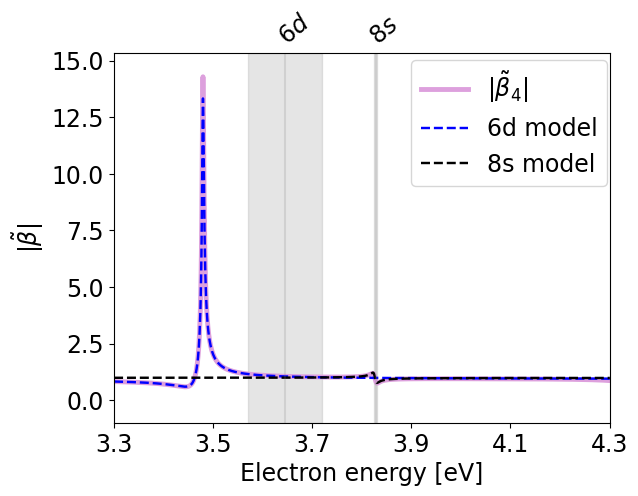

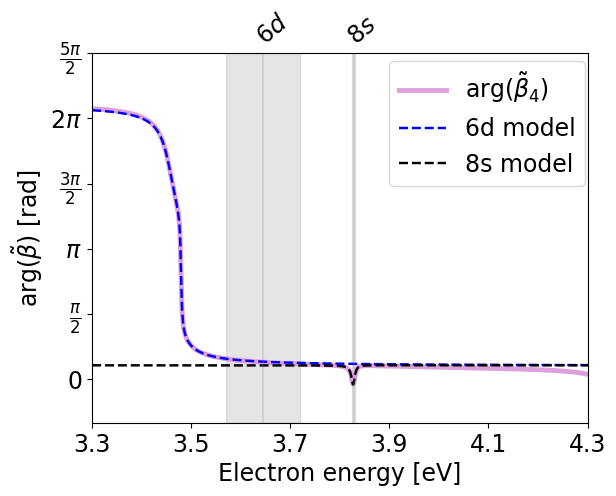

In [40]:
fontsize = "17"

angles = [0, 30, 45, 65]

en, M_emi_matched, M_abs_matched = utils_2ph.get_prepared_matrices(
    two_photons_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_abs,
    energies_mode="abs"
)

en_low_en, M_emi_matched_low_en, M_abs_matched_low_en = utils_2ph.get_prepared_matrices(
    two_photons_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_low_en,
    energies_mode="abs"
)

_, b2_a = asym_p_2ph.get_complex_asymmetry_parameter(
    two_photons_emi,
    2,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_abs,
    energies_mode="abs"
)

_, b2_a_low_en = asym_p_2ph.get_complex_asymmetry_parameter(
    two_photons_emi,
    2,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_low_en,
    energies_mode="abs"
)


_, b4_a = asym_p_2ph.get_complex_asymmetry_parameter(
    two_photons_emi,
    4,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_abs,
    energies_mode="abs"
)

_, b4_a_low_en = asym_p_2ph.get_complex_asymmetry_parameter(
    two_photons_emi,
    4,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_low_en,
    energies_mode="abs"
)


region_mask = np.logical_and(en >= 3.5, en < 4.9)
region_mask_low_en = np.logical_and(en_low_en >= 3.3, en_low_en < 3.5)

en_concat = np.concatenate((en_low_en[region_mask_low_en], en[region_mask]))

M_emi_matched_concat = np.zeros((5, 3, len(en_concat)), dtype=np.complex128)
M_abs_matched_concat = np.zeros((5, 3, len(en_concat)), dtype=np.complex128)

for i in range(5):
    for K in range(3):
        M_emi_matched_concat[i, K, :] = np.concatenate((M_emi_matched_low_en[i, K, region_mask_low_en], M_emi_matched[i, K, region_mask]))
        M_abs_matched_concat[i, K, :] = np.concatenate((M_abs_matched_low_en[i, K, region_mask_low_en], M_abs_matched[i, K, region_mask]))


int_intens_concat = atomic.get_integrated_two_photons_intensity(hole_kappa_6p3half, M_emi_matched_concat, M_abs_matched_concat)

b2_a_concat = np.concatenate((b2_a_low_en[region_mask_low_en], b2_a[region_mask]))
b4_a_concat = np.concatenate((b4_a_low_en[region_mask_low_en], b4_a[region_mask]))


# index corresponding to the 6d resonance in the resonance_data list
res_id_6d = 1

# index corresponding to the 6d resonance in the resonance_data list
res_id_8s = 2

print("6d resonance: ")

# calculate 6d resonance contribution
E_res_6d = rn_resonances[res_id_6d][0]
width_res_6d = rn_resonances[res_id_6d][1]
q_6d = rn_resonances[res_id_6d][3]
print("E_res_6d [eV]: ", E_res_6d)
print("width_res_6d [eV]: ", width_res_6d)
print("q_6d [eV]: ", q_6d)

eps_6d = complex_q.get_epsilon(en_concat, "abs", g_omega_IR_eV, E_res_6d, width_res_6d)

A_bg_6d_int, A_0_6d_int = complex_q.get_coefficients_for_integrated(
"abs",
eps_6d,
int_intens_concat,
q_6d,
# eps_1=-q_6d/1.5,
# eps_2=1/q_6d,
eps_1=-2.49,
eps_2=-1.95
)
print("A_0_6d_int: ", A_0_6d_int)
print("A_bg_6d_int: ", A_bg_6d_int)

q_complex_6d_int = complex_q.get_complex_q_integrated(A_bg_6d_int, A_0_6d_int, q_6d)
print("q_complex_6d_int: ", q_complex_6d_int)

# q complex coefficients for the second order beta parameter
A_bg_6d_b2, A_0_6d_b2 = complex_q.get_coefficients_for_beta_param(
                                "abs", 
                                eps_6d,
                                int_intens_concat,
                                b2_a_concat,
                                q_6d,
                                # eps_1=-q_6d/1.3,
                                # eps_2=1/q_6d,
                                eps_1=-2.49,
                                eps_2=-1.95
                            )

# q complex coefficients for the fourth order beta parameter will be zero
# since the fourth order beta is zero in the one photon case
A_bg_6d_b4, A_0_6d_b4 = complex_q.get_coefficients_for_beta_param(
                                "abs", 
                                eps_6d,
                                int_intens_concat,
                                b4_a_concat,
                                q_6d,
                                # eps_1=-q_6d,
                                # eps_2=1/q_6d,
                                eps_1=-2.49,
                                eps_2=-1.95
                            )

for angle in angles:
    print(f"For $\\theta$ = {angle}: ")
    q_complex_6d_ang = complex_q.get_complex_q_angular(
        angle,
        A_bg_6d_int, 
        A_0_6d_int,
        A_bg_6d_b2, 
        A_0_6d_b2,
        A_bg_6d_b4, 
        A_0_6d_b4,
        q_6d
    )
    print("q_complex_6d_ang: ", q_complex_6d_ang)

    # zeros of the real and imaginary part for 6d resonance
    im_zero_6d_ang, re_zero_1_6d_ang, re_zero_2_6d_ang = complex_q.get_zeros(q_complex_6d_ang)
    print("im_zero_6d_ang: ", im_zero_6d_ang)
    print("re_zero_1_6d_ang: ", re_zero_1_6d_ang)
    print("re_zero_2_6d_ang: ", re_zero_2_6d_ang)
    print("\n")

q_b2_6d = complex_q.get_complex_q_integrated(A_bg_6d_b2, A_0_6d_b2, q_6d)
b2_a_6d_approx = (
    np.conjugate(
(A_0_6d_b2 + A_bg_6d_b2) * (eps_6d + q_b2_6d) / ((A_0_6d_int + A_bg_6d_int) * (eps_6d + q_complex_6d_int))
    )
)

q_b4_6d = complex_q.get_complex_q_integrated(A_bg_6d_b4, A_0_6d_b4, q_6d)
b4_a_6d_approx = (
    np.conjugate(
(A_0_6d_b4 + A_bg_6d_b4) * (eps_6d + q_b4_6d) / ((A_0_6d_int + A_bg_6d_int) * (eps_6d + q_complex_6d_int))
    )
)

print("\n")

print("8s resonance: ")

# calculate 8s resonance contribution
E_res_8s = rn_resonances[res_id_8s][0]
width_res_8s = rn_resonances[res_id_8s][1]
q_8s = rn_resonances[res_id_8s][3]
print("E_res_8s [eV]: ", E_res_8s)
print("width_res_8s [eV]: ", width_res_8s)
print("q_8s [eV]: ", q_8s)

eps_8s = complex_q.get_epsilon(en_concat, "abs", g_omega_IR_eV, E_res_8s, width_res_8s)

A_bg_8s_int, A_0_8s_int = complex_q.get_coefficients_for_integrated(
"abs",
eps_8s,
int_intens_concat,
q_8s,
# eps_1=-q_8s/1.5,
# eps_2=1/q_8s,
eps_1=-q_8s,
eps_2=1/q_8s,
)
print("A_0_8s_int: ", A_0_8s_int)
print("A_bg_8s_int: ", A_bg_8s_int)

q_complex_8s_int = complex_q.get_complex_q_integrated(A_bg_8s_int, A_0_8s_int, q_8s)
print("q_complex_8s_int: ", q_complex_8s_int)

# q complex coefficients for the second order beta parameter
A_bg_8s_b2, A_0_8s_b2 = complex_q.get_coefficients_for_beta_param(
                                "abs", 
                                eps_8s,
                                int_intens_concat,
                                b2_a_concat,
                                q_8s,
                                eps_1=-q_8s,
                                eps_2=1/q_8s,
                            )

# q complex coefficients for the fourth order beta parameter will be zero
# since the fourth order beta is zero in the one photon case
A_bg_8s_b4, A_0_8s_b4 = complex_q.get_coefficients_for_beta_param(
                                "abs", 
                                eps_8s,
                                int_intens_concat,
                                b4_a_concat,
                                q_8s,
                                eps_1=-q_8s,
                                eps_2=1/q_8s,
                            )


for angle in angles:
    print(f"For $\\theta$ = {angle}: ")
    q_complex_8s_ang = complex_q.get_complex_q_angular(
        angle,
        A_bg_8s_int, 
        A_0_8s_int,
        A_bg_8s_b2, 
        A_0_8s_b2,
        A_bg_8s_b4, 
        A_0_8s_b4,
        q_8s
    )
    print("q_complex_8s_ang: ", q_complex_8s_ang)

    # zeros of the real and imaginary part for 8s resonance
    im_zero_8s_ang, re_zero_1_8s_ang, re_zero_2_8s_ang = complex_q.get_zeros(q_complex_8s_ang)
    print("im_zero_8s_ang: ", im_zero_8s_ang)
    print("re_zero_1_8s_ang: ", re_zero_1_8s_ang)
    print("re_zero_2_8s_ang: ", re_zero_2_8s_ang)
    print("\n")

q_b2_8s = complex_q.get_complex_q_integrated(A_bg_8s_b2, A_0_8s_b2, q_8s)
b2_a_8s_approx = (
    np.conjugate(
(A_0_8s_b2 + A_bg_8s_b2) * (eps_8s + q_b2_8s) / ((A_0_8s_int + A_bg_8s_int) * (eps_8s + q_complex_8s_int))
    )
)

q_b4_8s = complex_q.get_complex_q_integrated(A_bg_8s_b4, A_0_8s_b4, q_8s)
b4_a_8s_approx = (
    np.conjugate(
(A_0_8s_b4 + A_bg_8s_b4) * (eps_8s + q_b4_8s) / ((A_0_8s_int + A_bg_8s_int) * (eps_8s + q_complex_8s_int))
    )
)

plt.figure("Abs_b4")
plt.plot(en_concat, np.abs(b4_a_concat), color="plum", linewidth=3.5, label="$|\\tilde{\\beta}_4|$")
plt.plot(en_concat, np.abs(b4_a_6d_approx), color="blue", linewidth=1.75, linestyle="--", label="6d model")
plt.plot(en_concat, np.abs(b4_a_8s_approx), color="black", linewidth=1.75, linestyle="--", label="8s model")

plt.legend(fontsize=fontsize, loc=(0.6, 0.64))

ax= plt.gca()
ymin, ymax = ax.get_ylim()
ymin = -1
# ymax = 4
ax.set_ylim([ymin, ymax])
ax.set_ymargin(0)
ax.set_xmargin(0)
for i, (r, width, name, _) in enumerate(rn_resonances[res_id_6d: res_id_8s + 1]):
    r += g_omega_IR_eV
    plt.fill_betweenx([ymin, ymax], r-width/2,r+width/2, color="gray", alpha=.2)
    ax.plot([r, r],[ymin,ymax], color="gray",alpha=.2)
    if name == "$8d$":
        ax.text((r - 0.1 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    elif name == "$10s$":
        ax.text((r - 8.5 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    else:
        ax.text((r - 0.02), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)

plt.xlabel("Electron energy [eV]", fontsize=fontsize);
plt.ylabel("$|\\tilde{\\beta}|$", fontsize=fontsize);

plt.xticks([3.3 + i * 0.2 for i in range(9)],fontsize=fontsize);
plt.yticks(fontsize=fontsize);
plt.xlim([3.3, 4.3])
plt.savefig(f"b4_atomic_abs_model.pdf", format="pdf", bbox_inches="tight")



plt.figure("phase_b4")
b4_a_phase = np.angle(b4_a_concat)
b4_a_phase_6d_approx = np.angle(b4_a_6d_approx)
b4_a_phase_8s_approx = np.angle(b4_a_8s_approx)

b4_a_phase[en_concat < 3.479] += 2 * np.pi
b4_a_phase_6d_approx[en_concat < 3.479] += 2 * np.pi
# b4_w_phase_8s_approx[en_concat < 3.474] += 2 * np.pi

plt.plot(en_concat, b4_a_phase, color="plum", linewidth=3.5, label="arg($\\tilde{\\beta}_4$)")
plt.plot(en_concat, b4_a_phase_6d_approx, color="blue", linewidth=1.75, linestyle="--", label="6d model")
plt.plot(en_concat, b4_a_phase_8s_approx, color="black", linewidth=1.75, linestyle="--", label="8s model")

plt.legend(fontsize=fontsize, loc=(0.6, 0.64))

ax= plt.gca()
ymin, ymax = ax.get_ylim()
ymin = - np.pi / 3
ymax = 5 * np.pi / 2
ax.set_ylim([ymin, ymax])
ax.set_ymargin(0)
ax.set_xmargin(0)
for i, (r, width, name, _) in enumerate(rn_resonances[res_id_6d: res_id_8s + 1]):
    r += g_omega_IR_eV
    plt.fill_betweenx([ymin, ymax], r-width/2,r+width/2, color="gray", alpha=.2)
    ax.plot([r, r],[ymin,ymax], color="gray",alpha=.2)
    if name == "$8d$":
        ax.text((r - 0.1 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    elif name == "$10s$":
        ax.text((r - 8.5 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    else:
        ax.text((r - 0.02), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)

plt.xlabel("Electron energy [eV]", fontsize=fontsize);
plt.ylabel("arg($\\tilde{\\beta}$) [rad]", fontsize=fontsize);

major = Multiple(2, np.pi, '\\pi')
minor = Multiple(16, np.pi, '\\pi')
ax.yaxis.set_major_locator(major.locator())
ax.yaxis.set_major_formatter(major.formatter())
plt.xticks([3.3 + i * 0.2 for i in range(9)],fontsize=fontsize);
plt.yticks(fontsize=fontsize);
plt.xlim([3.3, 4.3])
plt.savefig(f"b4_atomic_phase_model.pdf", format="pdf", bbox_inches="tight")

In [72]:
re = 1.44
im = 0.66

eps_i = re / (im - 1)
eps_r_1 = -re / 2 - np.sqrt((re / 2) ** 2 - im)
eps_r_2 = -re / 2 + np.sqrt((re / 2) ** 2 - im)

eps_i, eps_r_1, eps_r_2

C:\Users\shapo\AppData\Local\Temp\ipykernel_13892\1782738525.py:5: RuntimeWarning: invalid value encountered in sqrt
  eps_r_1 = -re / 2 - np.sqrt((re / 2) ** 2 - im)
C:\Users\shapo\AppData\Local\Temp\ipykernel_13892\1782738525.py:6: RuntimeWarning: invalid value encountered in sqrt
  eps_r_2 = -re / 2 + np.sqrt((re / 2) ** 2 - im)


(-4.235294117647059, np.float64(nan), np.float64(nan))

In [42]:
fontsize = "13"

angles = np.arange(0, 90, 0.1)

en, M_emi_matched, M_abs_matched = utils_2ph.get_prepared_matrices(
    two_photons_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_abs,
    energies_mode="abs"
)

en_low_en, M_emi_matched_low_en, M_abs_matched_low_en = utils_2ph.get_prepared_matrices(
    two_photons_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_low_en,
    energies_mode="abs"
)

_, b2_a = asym_p_2ph.get_complex_asymmetry_parameter(
    two_photons_emi,
    2,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_abs,
    energies_mode="abs"
)

_, b2_a_low_en = asym_p_2ph.get_complex_asymmetry_parameter(
    two_photons_emi,
    2,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_low_en,
    energies_mode="abs"
)


_, b4_a = asym_p_2ph.get_complex_asymmetry_parameter(
    two_photons_emi,
    4,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_abs,
    energies_mode="abs"
)

_, b4_a_low_en = asym_p_2ph.get_complex_asymmetry_parameter(
    two_photons_emi,
    4,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    two_photons_2=two_photons_low_en,
    energies_mode="abs"
)


region_mask = np.logical_and(en >= 3.5, en < 4.9)
region_mask_low_en = np.logical_and(en_low_en >= 3.3, en_low_en < 3.5)

en_concat = np.concatenate((en_low_en[region_mask_low_en], en[region_mask]))

M_emi_matched_concat = np.zeros((5, 3, len(en_concat)), dtype=np.complex128)
M_abs_matched_concat = np.zeros((5, 3, len(en_concat)), dtype=np.complex128)

for i in range(5):
    for K in range(3):
        M_emi_matched_concat[i, K, :] = np.concatenate((M_emi_matched_low_en[i, K, region_mask_low_en], M_emi_matched[i, K, region_mask]))
        M_abs_matched_concat[i, K, :] = np.concatenate((M_abs_matched_low_en[i, K, region_mask_low_en], M_abs_matched[i, K, region_mask]))


int_intens_concat = atomic.get_integrated_two_photons_intensity(hole_kappa_6p3half, M_emi_matched_concat, M_abs_matched_concat)

b2_a_concat = np.concatenate((b2_a_low_en[region_mask_low_en], b2_a[region_mask]))
b4_a_concat = np.concatenate((b4_a_low_en[region_mask_low_en], b4_a[region_mask]))


# index corresponding to the 6d resonance in the resonance_data list
res_id_6d = 1

# index corresponding to the 6d resonance in the resonance_data list
res_id_8s = 2

print("6d resonance: ")
q_complex_6d_ang_arr = []

# calculate 6d resonance contribution
E_res_6d = rn_resonances[res_id_6d][0]
width_res_6d = rn_resonances[res_id_6d][1]
q_6d = rn_resonances[res_id_6d][3]
print("E_res_6d [eV]: ", E_res_6d)
print("width_res_6d [eV]: ", width_res_6d)
print("q_6d [eV]: ", q_6d)

eps_6d = complex_q.get_epsilon(en_concat, "abs", g_omega_IR_eV, E_res_6d, width_res_6d)

A_bg_6d_int, A_0_6d_int = complex_q.get_coefficients_for_integrated(
"abs",
eps_6d,
int_intens_concat,
q_6d,
# eps_1=-q_6d/1.5,
# eps_2=1/q_6d,
eps_1=-2.49,
eps_2=-1.95
)
print("A_0_6d_int: ", A_0_6d_int)
print("A_bg_6d_int: ", A_bg_6d_int)

q_complex_6d_int = complex_q.get_complex_q_integrated(A_bg_6d_int, A_0_6d_int, q_6d)
print("q_complex_6d_int: ", q_complex_6d_int)

# q complex coefficients for the second order beta parameter
A_bg_6d_b2, A_0_6d_b2 = complex_q.get_coefficients_for_beta_param(
                                "abs", 
                                eps_6d,
                                int_intens_concat,
                                b2_a_concat,
                                q_6d,
                                # eps_1=-q_6d/1.3,
                                # eps_2=1/q_6d,
                                eps_1=-2.49,
                                eps_2=-1.95
                            )

# q complex coefficients for the fourth order beta parameter will be zero
# since the fourth order beta is zero in the one photon case
A_bg_6d_b4, A_0_6d_b4 = complex_q.get_coefficients_for_beta_param(
                                "abs", 
                                eps_6d,
                                int_intens_concat,
                                b4_a_concat,
                                q_6d,
                                # eps_1=-q_6d,
                                # eps_2=1/q_6d,
                                eps_1=-2.49,
                                eps_2=-1.95
                            )

for angle in angles:
    q_complex_6d_ang = complex_q.get_complex_q_angular(
        angle,
        A_bg_6d_int, 
        A_0_6d_int,
        A_bg_6d_b2, 
        A_0_6d_b2,
        A_bg_6d_b4, 
        A_0_6d_b4,
        q_6d
    )
    q_complex_6d_ang_arr.append(q_complex_6d_ang)


print("\n")

print("8s resonance: ")
q_complex_8s_ang_arr = []

# calculate 8s resonance contribution
E_res_8s = rn_resonances[res_id_8s][0]
width_res_8s = rn_resonances[res_id_8s][1]
q_8s = rn_resonances[res_id_8s][3]
print("E_res_8s [eV]: ", E_res_8s)
print("width_res_8s [eV]: ", width_res_8s)
print("q_8s [eV]: ", q_8s)

eps_8s = complex_q.get_epsilon(en_concat, "abs", g_omega_IR_eV, E_res_8s, width_res_8s)

A_bg_8s_int, A_0_8s_int = complex_q.get_coefficients_for_integrated(
"abs",
eps_8s,
int_intens_concat,
q_8s,
# eps_1=-q_8s/1.5,
# eps_2=1/q_8s,
eps_1=-q_8s,
eps_2=1/q_8s,
)
print("A_0_8s_int: ", A_0_8s_int)
print("A_bg_8s_int: ", A_bg_8s_int)

q_complex_8s_int = complex_q.get_complex_q_integrated(A_bg_8s_int, A_0_8s_int, q_8s)
print("q_complex_8s_int: ", q_complex_8s_int)

# q complex coefficients for the second order beta parameter
A_bg_8s_b2, A_0_8s_b2 = complex_q.get_coefficients_for_beta_param(
                                "abs", 
                                eps_8s,
                                int_intens_concat,
                                b2_a_concat,
                                q_8s,
                                eps_1=-q_8s,
                                eps_2=1/q_8s,
                            )

# q complex coefficients for the fourth order beta parameter will be zero
# since the fourth order beta is zero in the one photon case
A_bg_8s_b4, A_0_8s_b4 = complex_q.get_coefficients_for_beta_param(
                                "abs", 
                                eps_8s,
                                int_intens_concat,
                                b4_a_concat,
                                q_8s,
                                eps_1=-q_8s,
                                eps_2=1/q_8s,
                            )


for angle in angles:
    q_complex_8s_ang = complex_q.get_complex_q_angular(
        angle,
        A_bg_8s_int, 
        A_0_8s_int,
        A_bg_8s_b2, 
        A_0_8s_b2,
        A_bg_8s_b4, 
        A_0_8s_b4,
        q_8s
    )
    q_complex_8s_ang_arr.append(q_complex_8s_ang)

6d resonance: 
E_res_6d [eV]:  2.095
width_res_6d [eV]:  0.1488
q_6d [eV]:  2.91
A_0_6d_int:  (104204.97418706305+87533.81457101162j)
A_bg_6d_int:  (18510.0806392699+34316.73855355302j)
q_complex_6d_int:  (2.216710679353398+0.025474124988142468j)


8s resonance: 
E_res_8s [eV]:  2.278
width_res_8s [eV]:  0.0057
q_8s [eV]:  9.44
A_0_8s_int:  (10233.81833546262+20479.70834133057j)
A_bg_8s_int:  (266584.31448882114+81522.26882109481j)
q_complex_8s_int:  (0.586995652141369+1.445129479219295j)


In [43]:
fontsize = "17"

angles = np.arange(0, 90, 0.1)

en, M_emi_matched, M_abs_matched = utils_1ph.get_prepared_matrices(
    one_photon_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    g_omega_IR,
    one_photon_2=one_photon_abs,
    g_omega_IR_2=g_omega_IR,
    energies_mode="abs"
)

en_low_en, M_emi_matched_low_en, M_abs_matched_low_en = utils_1ph.get_prepared_matrices(
    one_photon_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    g_omega_IR,
    one_photon_2=one_photon_low_en,
    g_omega_IR_2=g_omega_IR,
    energies_mode="abs"
)


region_mask = np.logical_and(en >= 3.5, en < 4.9)
region_mask_low_en = np.logical_and(en_low_en >= 3.3, en_low_en < 3.5)

en_concat = np.concatenate((en_low_en[region_mask_low_en], en[region_mask]))

M_emi_matched_concat = np.zeros((3, len(en_concat)), dtype=np.complex128)
M_abs_matched_concat = np.zeros((3, len(en_concat)), dtype=np.complex128)

for i in range(3):
    M_emi_matched_concat[i, :] = np.concatenate((M_emi_matched_low_en[i, region_mask_low_en], M_emi_matched[i, region_mask]))
    M_abs_matched_concat[i, :] = np.concatenate((M_abs_matched_low_en[i, region_mask_low_en], M_abs_matched[i, region_mask]))

int_intens_concat = wigner.get_wigner_intensity(hole_kappa_6p3half, M_emi_matched_concat, M_abs_matched_concat)

_, b2_w = asym_p_1ph.get_complex_asymmetry_parameter(
    one_photon_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    g_omega_IR,
    one_photon_2=one_photon_abs,
    g_omega_IR_2=g_omega_IR,
    energies_mode="abs"
)

_, b2_w_low_en = asym_p_1ph.get_complex_asymmetry_parameter(
    one_photon_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    g_omega_IR,
    one_photon_2=one_photon_low_en,
    g_omega_IR_2=g_omega_IR,
    energies_mode="abs"
)

b2_w_concat = np.concatenate((b2_w_low_en[region_mask_low_en], b2_w[region_mask]))

# index corresponding to the 6d resonance in the resonance_data list
res_id_6d = 1

# index corresponding to the 6d resonance in the resonance_data list
res_id_8s = 2

print("6d resonance: ")
q_complex_6d_ang_wigner_arr = []

# calculate 6d resonance contribution
E_res_6d = rn_resonances[res_id_6d][0]
width_res_6d = rn_resonances[res_id_6d][1]
q_6d = rn_resonances[res_id_6d][3]
print("E_res_6d [eV]: ", E_res_6d)
print("width_res_6d [eV]: ", width_res_6d)
print("q_6d [eV]: ", q_6d)

eps_6d = complex_q.get_epsilon(en_concat, "abs", g_omega_IR_eV, E_res_6d, width_res_6d)

A_bg_6d_int, A_0_6d_int = complex_q.get_coefficients_for_integrated(
"abs",
eps_6d,
int_intens_concat,
q_6d,
# eps_1=-q_6d/1.5,
# eps_2=1/q_6d,
eps_1=-2.49,
eps_2=-1.95
)
print("A_0_6d_int: ", A_0_6d_int)
print("A_bg_6d_int: ", A_bg_6d_int)

q_complex_6d_int = complex_q.get_complex_q_integrated(A_bg_6d_int, A_0_6d_int, q_6d)
print("q_complex_6d_int: ", q_complex_6d_int)

# q complex coefficients for the second order beta parameter
A_bg_6d_b2, A_0_6d_b2 = complex_q.get_coefficients_for_beta_param(
                                "abs", 
                                eps_6d,
                                int_intens_concat,
                                b2_w_concat,
                                q_6d,
                                # eps_1=-q_6d,
                                # eps_2=1/q_6d,
                                eps_1=-2.49,
                                eps_2=-1.95
                            )

# q complex coefficients for the fourth order beta parameter will be zero
# since the fourth order beta is zero in the one photon case
A_bg_6d_b4, A_0_6d_b4 = 0, 0

for angle in angles:
    q_complex_6d_ang = complex_q.get_complex_q_angular(
        angle,
        A_bg_6d_int, 
        A_0_6d_int,
        A_bg_6d_b2, 
        A_0_6d_b2,
        A_bg_6d_b4, 
        A_0_6d_b4,
        q_6d
    )
    q_complex_6d_ang_wigner_arr.append(q_complex_6d_ang)

print("\n")
print("8s resonance: ")

q_complex_8s_ang_wigner_arr = []

# calculate 8s resonance contribution
E_res_8s = rn_resonances[res_id_8s][0]
width_res_8s = rn_resonances[res_id_8s][1]
q_8s = rn_resonances[res_id_8s][3]
print("E_res_8s [eV]: ", E_res_8s)
print("width_res_8s [eV]: ", width_res_8s)
print("q_8s [eV]: ", q_8s)

eps_8s = complex_q.get_epsilon(en_concat, "abs", g_omega_IR_eV, E_res_8s, width_res_8s)

A_bg_8s_int, A_0_8s_int = complex_q.get_coefficients_for_integrated(
"abs",
eps_8s,
int_intens_concat,
q_8s,
# eps_1=-q_8s/1.5,
# eps_2=1/q_8s,
eps_1=-q_8s,
eps_2=1/q_8s,
)
print("A_0_8s_int: ", A_0_8s_int)
print("A_bg_8s_int: ", A_bg_8s_int)

q_complex_8s_int = complex_q.get_complex_q_integrated(A_bg_8s_int, A_0_8s_int, q_8s)
print("q_complex_8s_int: ", q_complex_8s_int)

# q complex coefficients for the second order beta parameter
A_bg_8s_b2, A_0_8s_b2 = complex_q.get_coefficients_for_beta_param(
                                "abs", 
                                eps_8s,
                                int_intens_concat,
                                b2_w_concat,
                                q_8s,
                                eps_1=-q_8s,
                                eps_2=1/q_8s,
                            )

# q complex coefficients for the fourth order beta parameter will be zero
# since the fourth order beta is zero in the one photon case
A_bg_8s_b4, A_0_8s_b4 = 0, 0

for angle in angles:
    q_complex_8s_ang = complex_q.get_complex_q_angular(
        angle,
        A_bg_8s_int, 
        A_0_8s_int,
        A_bg_8s_b2, 
        A_0_8s_b2,
        A_bg_8s_b4, 
        A_0_8s_b4,
        q_8s
    )
    q_complex_8s_ang_wigner_arr.append(q_complex_8s_ang)


6d resonance: 
E_res_6d [eV]:  2.095
width_res_6d [eV]:  0.1488
q_6d [eV]:  2.91
A_0_6d_int:  (14.740536080921755-14.578744478270966j)
A_bg_6d_int:  (4.180897562948022-5.4160553959671764j)
q_complex_6d_int:  (2.215296522676777+0.31980461301661506j)


8s resonance: 
E_res_8s [eV]:  2.278
width_res_8s [eV]:  0.0057
q_8s [eV]:  9.44
A_0_8s_int:  (1.3400766443188705-2.2381592873531986j)
A_bg_8s_int:  (24.007338913089207-34.978924618931465j)
q_complex_8s_int:  (0.5425747421820085+0.9102373728571505j)


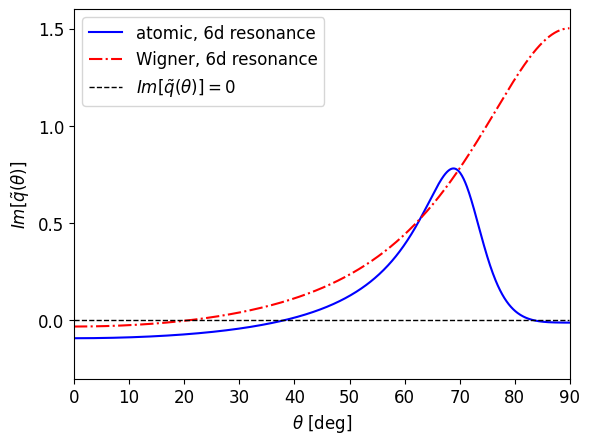

In [44]:
fontsize = "12"
plt.plot(angles, np.imag(q_complex_6d_ang_arr), color="blue", label="atomic, 6d resonance")
plt.plot(angles, np.imag(q_complex_6d_ang_wigner_arr), color="red", linestyle="-.", label="Wigner, 6d resonance")
plt.plot(angles, np.zeros(len(angles)), color="black", linewidth=1, linestyle="--", label="$Im[\\tilde{q}(\\theta)] = 0$")
plt.legend(fontsize=fontsize);

ax= plt.gca()
ymin, ymax = ax.get_ylim()
ymin = - 0.3
ymax = 1.6
ax.set_ylim([ymin, ymax])
ax.set_ymargin(0)
ax.set_xmargin(0)

plt.xlabel("$\\theta$ [deg]", fontsize=fontsize);
plt.ylabel("$Im[\\tilde{q}(\\theta)]$", fontsize=fontsize);

plt.xticks([i * 10 for i in range(10)],fontsize=fontsize);
plt.yticks(fontsize=fontsize);
plt.savefig(f"Im_q_ang_6d.pdf", format="pdf", bbox_inches="tight")

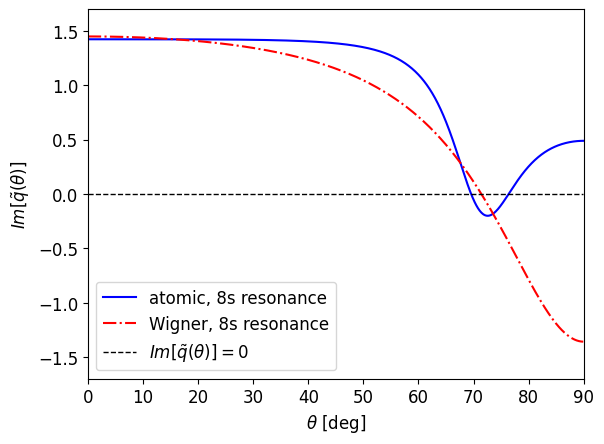

In [45]:
fontsize = "12"
plt.plot(angles, np.imag(q_complex_8s_ang_arr), color="blue", label="atomic, 8s resonance")
plt.plot(angles, np.imag(q_complex_8s_ang_wigner_arr), color="red", linestyle="-.", label="Wigner, 8s resonance")
plt.plot(angles, np.zeros(len(angles)), color="black", linewidth=1, linestyle="--", label="$Im[\\tilde{q}(\\theta)] = 0$")
plt.legend(fontsize=fontsize);

ax= plt.gca()
ymin, ymax = ax.get_ylim()
ymin = - 1.7
ymax = 1.7
ax.set_ylim([ymin, ymax])
ax.set_ymargin(0)
ax.set_xmargin(0)

plt.xlabel("$\\theta$ [deg]", fontsize=fontsize);
plt.ylabel("$Im[\\tilde{q}(\\theta)]$", fontsize=fontsize);

plt.xticks([i * 10 for i in range(10)],fontsize=fontsize);
plt.yticks(fontsize=fontsize);
plt.savefig(f"Im_q_ang_8s.pdf", format="pdf", bbox_inches="tight")

In [46]:
for i in range(1, len(np.imag(q_complex_6d_ang_arr))):
    if np.sign(np.imag(q_complex_6d_ang_arr)[i]) != np.sign(np.imag(q_complex_6d_ang_arr)[i-1]):
        print("Atomic 6d crit angle: ", (angles[i] + angles[i-1]) /2 )

Atomic 6d crit angle:  38.05
Atomic 6d crit angle:  83.55000000000001


In [47]:
for i in range(1, len(np.imag(q_complex_6d_ang_wigner_arr))):
    if np.sign(np.imag(q_complex_6d_ang_wigner_arr)[i]) != np.sign(np.imag(q_complex_6d_ang_wigner_arr)[i-1]):
        print("Winger 6d crit angle: ", (angles[i] + angles[i-1]) /2 )

Winger 6d crit angle:  20.650000000000002


In [48]:
for i in range(1, len(np.imag(q_complex_8s_ang_arr))):
    if np.sign(np.imag(q_complex_8s_ang_arr)[i]) != np.sign(np.imag(q_complex_8s_ang_arr)[i-1]):
        print("Atomic 8s crit angle: ", (angles[i] + angles[i-1]) /2 )

Atomic 8s crit angle:  69.55000000000001
Atomic 8s crit angle:  76.35


In [49]:
for i in range(1, len(np.imag(q_complex_8s_ang_wigner_arr))):
    if np.sign(np.imag(q_complex_8s_ang_wigner_arr)[i]) != np.sign(np.imag(q_complex_8s_ang_wigner_arr)[i-1]):
        print("Winger 8s crit angle: ", (angles[i] + angles[i-1]) /2 )

Winger 8s crit angle:  71.35


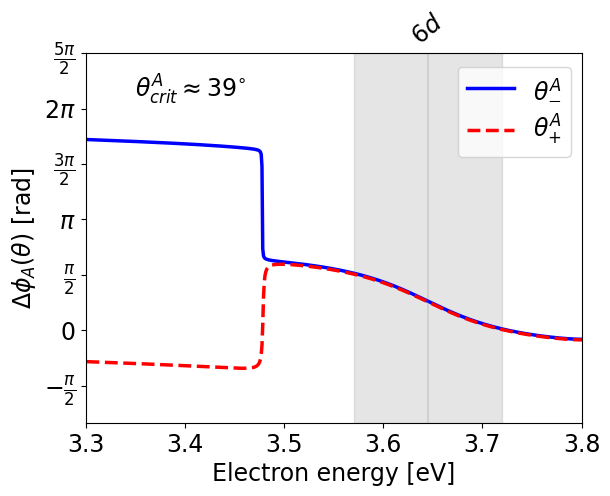

In [50]:
fontsize = "17"


angles = [38, 40]

en, phase_ang_a = atomic.get_atomic_phase(
    two_photons_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    angles,
    two_photons_2=two_photons_abs,
    energies_mode="abs"
)

en_low_en, phase_ang_a_low_en = atomic.get_atomic_phase(
    two_photons_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    angles,
    two_photons_2=two_photons_low_en,
    energies_mode="abs"
)


phase_ang_a_low_en[0, :] += 2 * np.pi
# phase_ang_a_low_en[1, :] += 2 * np.pi

region_mask = np.logical_and(en >= 3.5, en < 4.9)
region_mask_low_en = np.logical_and(en_low_en >= 3.3, en_low_en < 3.5)

en_concat = np.concatenate((en_low_en[region_mask_low_en], en[region_mask]))
phase_ang_a_concat = np.zeros((len(angles), len(en_concat)))

for i in range(len(angles)):
    phase_ang_a_concat[i, :] = np.concatenate((phase_ang_a_low_en[i, region_mask_low_en], phase_ang_a[i, region_mask]))


line_styles = ["solid", "--", "dashdot", (3, (2, 1))]

cmap = blue_red_cmap(4)

# colors = ["blue", "red", cmap[2], cmap[1]]

colors = ["blue", "red", "black", "green"]

labels=["$\\theta_{-}^{A}$", "$\\theta_{+}^{A}$"]
for i in range(len(angles)):
    plt.plot(en_concat, phase_ang_a_concat[i, :], color=colors[i], linewidth=2.5, linestyle=line_styles[i], label=labels[i])

plt.text(3.35, 2.1 * np.pi, "$\\theta_{crit}^A \\approx 39^{\\circ}$", fontsize=fontsize);
plt.legend(fontsize=fontsize, loc=(0.75, 0.72));

ax= plt.gca()
ymin, ymax = ax.get_ylim()
ymin = -np.pi / 1.2
ymax = 10 * np.pi / 4
ax.set_ylim([ymin, ymax])
ax.set_ymargin(0)
ax.set_xmargin(0)
for i, (r, width, name, _) in enumerate(rn_resonances[1:2]):
    r += g_omega_IR_eV
    plt.fill_betweenx([ymin, ymax], r-width/2,r+width/2, color="gray", alpha=.2)
    ax.plot([r, r],[ymin,ymax], color="gray",alpha=.2)
    if name == "$8d$":
        ax.text((r - 0.1 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    elif name == "$10s$":
        ax.text((r - 8.5 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    else:
        ax.text((r - 0.02), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)

plt.xlabel("Electron energy [eV]", fontsize=fontsize);
plt.ylabel("$\\Delta \\phi_A(\\theta)$ [rad]", fontsize=fontsize);
major = Multiple(2, np.pi, '\\pi')
minor = Multiple(16, np.pi, '\\pi')
ax.yaxis.set_major_locator(major.locator())
ax.yaxis.set_major_formatter(major.formatter())

plt.xticks([3.3 + i * 0.1 for i in range(17)],fontsize=fontsize);
plt.yticks(fontsize=fontsize);
plt.xlim([3.3, 3.8])

plt.savefig(f"atomic_ang_6d_crit.pdf", format="pdf", bbox_inches="tight")


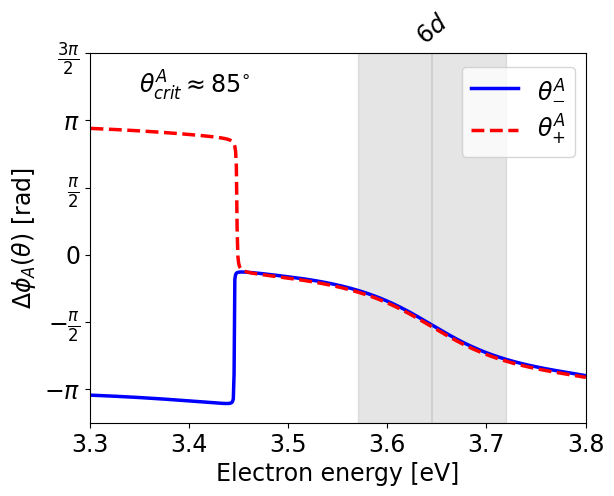

In [51]:
fontsize = "17"


angles = [84, 86]

en, phase_ang_a = atomic.get_atomic_phase(
    two_photons_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    angles,
    two_photons_2=two_photons_abs,
    energies_mode="abs"
)

en_low_en, phase_ang_a_low_en = atomic.get_atomic_phase(
    two_photons_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    angles,
    two_photons_2=two_photons_low_en,
    energies_mode="abs"
)


# phase_ang_a_low_en[0, :] += 2 * np.pi
phase_ang_a_low_en[1, :] += 2 * np.pi

region_mask = np.logical_and(en >= 3.5, en < 4.9)
region_mask_low_en = np.logical_and(en_low_en >= 3.3, en_low_en < 3.5)

en_concat = np.concatenate((en_low_en[region_mask_low_en], en[region_mask]))
phase_ang_a_concat = np.zeros((len(angles), len(en_concat)))

for i in range(len(angles)):
    phase_ang_a_concat[i, :] = np.concatenate((phase_ang_a_low_en[i, region_mask_low_en], phase_ang_a[i, region_mask]))


line_styles = ["solid", "--", "dashdot", (3, (2, 1))]

cmap = blue_red_cmap(4)

# colors = ["blue", "red", cmap[2], cmap[1]]

colors = ["blue", "red", "black", "green"]

labels=["$\\theta_{-}^{A}$", "$\\theta_{+}^{A}$"]
for i in range(len(angles)):
    plt.plot(en_concat, phase_ang_a_concat[i, :], color=colors[i], linewidth=2.5, linestyle=line_styles[i], label=labels[i])

plt.text(3.35, 1.2 * np.pi, "$\\theta_{crit}^A \\approx 85^{\\circ}$", fontsize=fontsize);
plt.legend(fontsize=fontsize, loc=(0.75, 0.72));

ax= plt.gca()
ymin, ymax = ax.get_ylim()
ymin = -2.5 * np.pi / 2
ymax = 3 * np.pi / 2
ax.set_ylim([ymin, ymax])
ax.set_ymargin(0)
ax.set_xmargin(0)
for i, (r, width, name, _) in enumerate(rn_resonances[1:2]):
    r += g_omega_IR_eV
    plt.fill_betweenx([ymin, ymax], r-width/2,r+width/2, color="gray", alpha=.2)
    ax.plot([r, r],[ymin,ymax], color="gray",alpha=.2)
    if name == "$8d$":
        ax.text((r - 0.1 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    elif name == "$10s$":
        ax.text((r - 8.5 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    else:
        ax.text((r - 0.02), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)

plt.xlabel("Electron energy [eV]", fontsize=fontsize);
plt.ylabel("$\\Delta \\phi_A(\\theta)$ [rad]", fontsize=fontsize);
major = Multiple(2, np.pi, '\\pi')
minor = Multiple(16, np.pi, '\\pi')
ax.yaxis.set_major_locator(major.locator())
ax.yaxis.set_major_formatter(major.formatter())

plt.xticks([3.3 + i * 0.1 for i in range(17)],fontsize=fontsize);
plt.yticks(fontsize=fontsize);
plt.xlim([3.3, 3.8])

plt.savefig(f"atomic_ang_6d_crit_1.pdf", format="pdf", bbox_inches="tight")


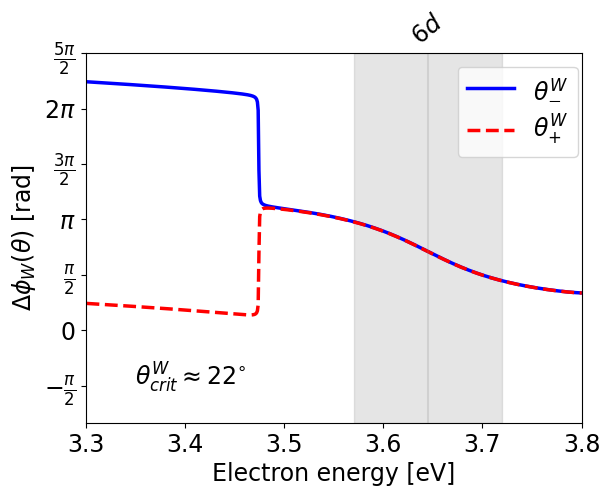

In [52]:
fontsize = "17"


angles = [21, 23]

en, phase_ang_w = wigner.get_wigner_phase(
    one_photon_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    g_omega_IR,
    angles,
    one_photon_2=one_photon_abs,
    g_omega_IR_2=g_omega_IR,
    energies_mode="abs"
)

en_low_en, phase_ang_w_low_en = wigner.get_wigner_phase(
    one_photon_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    g_omega_IR,
    angles,
    one_photon_2=one_photon_low_en,
    g_omega_IR_2=g_omega_IR,
    energies_mode="abs"
)

phase_ang_w_low_en[0, :] += 2 * np.pi

region_mask = np.logical_and(en >= 3.5, en < 4.9)
region_mask_low_en = np.logical_and(en_low_en >= 3.3, en_low_en < 3.5)

en_concat = np.concatenate((en_low_en[region_mask_low_en], en[region_mask]))
phase_ang_w_concat = np.zeros((len(angles), len(en_concat)))

for i in range(len(angles)):
    phase_ang_w_concat[i, :] = np.concatenate((phase_ang_w_low_en[i, region_mask_low_en], phase_ang_w[i, region_mask]))


line_styles = ["solid", "--", "dashdot", (3, (2, 1))]

cmap = blue_red_cmap(4)

colors = ["blue", "red", "black", "green"]
labels=["$\\theta_{-}^{W}$", "$\\theta_{+}^{W}$"]
for i in range(len(angles)):
    plt.plot(en_concat, phase_ang_w_concat[i, :], color=colors[i], linewidth=2.5, linestyle=line_styles[i], label=labels[i])

plt.text(3.35, -np.pi / 2, "$\\theta_{crit}^W \\approx 22^{\\circ}$", fontsize=fontsize);
plt.legend(fontsize=fontsize, loc=(0.75, 0.72));

ax= plt.gca()
ymin, ymax = ax.get_ylim()
ymin = -np.pi / 1.2
ymax = 10 * np.pi / 4
ax.set_ylim([ymin, ymax])
ax.set_ymargin(0)
ax.set_xmargin(0)
for i, (r, width, name, _) in enumerate(rn_resonances[1:2]):
    r += g_omega_IR_eV
    plt.fill_betweenx([ymin, ymax], r-width/2,r+width/2, color="gray", alpha=.2)
    ax.plot([r, r],[ymin,ymax], color="gray",alpha=.2)
    if name == "$8d$":
        ax.text((r - 0.1 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    elif name == "$10s$":
        ax.text((r - 8.5 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    else:
        ax.text((r - 0.02), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)

plt.xlabel("Electron energy [eV]", fontsize=fontsize);
plt.ylabel("$\\Delta \\phi_W(\\theta)$ [rad]", fontsize=fontsize);
major = Multiple(2, np.pi, '\\pi')
minor = Multiple(16, np.pi, '\\pi')
ax.yaxis.set_major_locator(major.locator())
ax.yaxis.set_major_formatter(major.formatter())

plt.xticks([3.3 + i * 0.1 for i in range(17)],fontsize=fontsize);
plt.yticks(fontsize=fontsize);
plt.xlim([3.3, 3.8])

plt.savefig(f"wigner_ang_6d_crit.pdf", format="pdf", bbox_inches="tight")


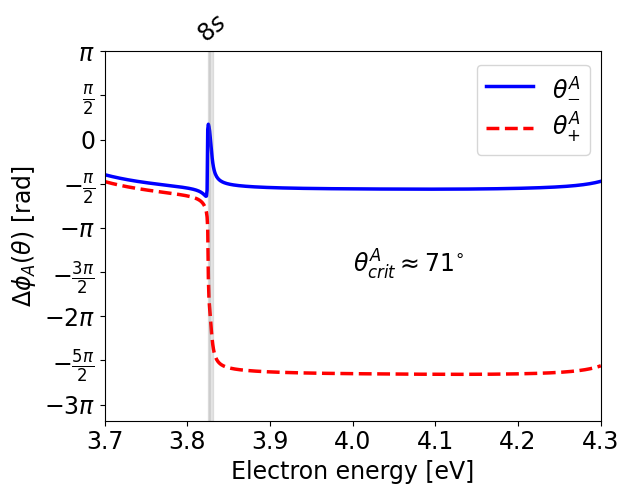

In [53]:
fontsize = "17"


angles = [70, 72]

en, phase_ang_a = atomic.get_atomic_phase(
    two_photons_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    angles,
    two_photons_2=two_photons_abs,
    energies_mode="abs"
)

en_low_en, phase_ang_a_low_en = atomic.get_atomic_phase(
    two_photons_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    angles,
    two_photons_2=two_photons_low_en,
    energies_mode="abs"
)


# phase_ang_a_low_en[0, :] += 2 * np.pi
# phase_ang_a_low_en[1, :] += 2 * np.pi

region_mask = np.logical_and(en >= 3.5, en < 4.9)
region_mask_low_en = np.logical_and(en_low_en >= 3.3, en_low_en < 3.5)

en_concat = np.concatenate((en_low_en[region_mask_low_en], en[region_mask]))
phase_ang_a_concat = np.zeros((len(angles), len(en_concat)))

for i in range(len(angles)):
    phase_ang_a_concat[i, :] = np.concatenate((phase_ang_a_low_en[i, region_mask_low_en], phase_ang_a[i, region_mask]))


line_styles = ["solid", "--", "dashdot", (3, (2, 1))]

cmap = blue_red_cmap(4)

# colors = ["blue", "red", cmap[2], cmap[1]]

colors = ["blue", "red", "black", "green"]

# phase_ang_a_concat[i, en_concat > 3.84] += 2 * np.pi

labels=["$\\theta_{-}^{A}$", "$\\theta_{+}^{A}$"]
for i in range(len(angles)):
    plt.plot(en_concat, phase_ang_a_concat[i, :], color=colors[i], linewidth=2.5, linestyle=line_styles[i], label=labels[i])

plt.text(4, -3 * np.pi / 2, "$\\theta_{crit}^A \\approx 71^{\\circ}$", fontsize=fontsize);
plt.legend(fontsize=fontsize, loc=(0.75, 0.72));

ax= plt.gca()
ymin, ymax = ax.get_ylim()
ymin = -7 * np.pi / 2.2
ymax = np.pi 
ax.set_ylim([ymin, ymax])
ax.set_ymargin(0)
ax.set_xmargin(0)
for i, (r, width, name, _) in enumerate(rn_resonances[2:3]):
    r += g_omega_IR_eV
    plt.fill_betweenx([ymin, ymax], r-width/2,r+width/2, color="gray", alpha=.2)
    ax.plot([r, r],[ymin,ymax], color="gray",alpha=.2)
    if name == "$8d$":
        ax.text((r - 0.1 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    elif name == "$10s$":
        ax.text((r - 8.5 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    else:
        ax.text((r - 0.02), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)

plt.xlabel("Electron energy [eV]", fontsize=fontsize);
plt.ylabel("$\\Delta \\phi_A(\\theta)$ [rad]", fontsize=fontsize);
major = Multiple(2, np.pi, '\\pi')
minor = Multiple(16, np.pi, '\\pi')
ax.yaxis.set_major_locator(major.locator())
ax.yaxis.set_major_formatter(major.formatter())

plt.xticks([3.3 + i * 0.1 for i in range(17)],fontsize=fontsize);
plt.yticks(fontsize=fontsize);
plt.xlim([3.7, 4.3])

plt.savefig(f"atomic_ang_8s_crit.pdf", format="pdf", bbox_inches="tight")


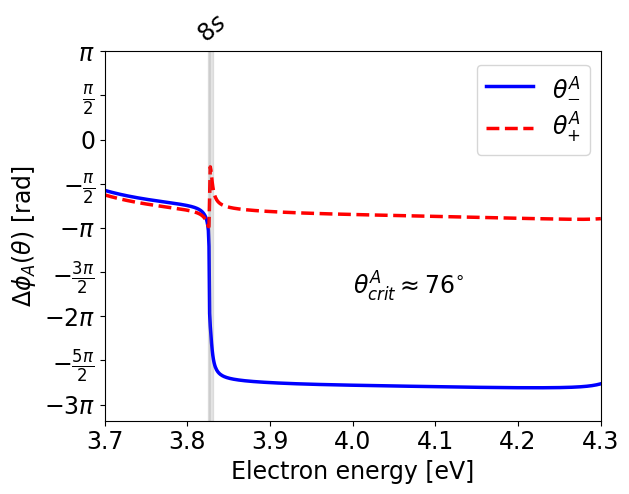

In [54]:
fontsize = "17"


angles = [75, 77]

en, phase_ang_a = atomic.get_atomic_phase(
    two_photons_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    angles,
    two_photons_2=two_photons_abs,
    energies_mode="abs"
)

en_low_en, phase_ang_a_low_en = atomic.get_atomic_phase(
    two_photons_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    angles,
    two_photons_2=two_photons_low_en,
    energies_mode="abs"
)


# phase_ang_a_low_en[0, :] += 2 * np.pi
# phase_ang_a_low_en[1, :] += 2 * np.pi

region_mask = np.logical_and(en >= 3.5, en < 4.9)
region_mask_low_en = np.logical_and(en_low_en >= 3.3, en_low_en < 3.5)

en_concat = np.concatenate((en_low_en[region_mask_low_en], en[region_mask]))
phase_ang_a_concat = np.zeros((len(angles), len(en_concat)))

for i in range(len(angles)):
    phase_ang_a_concat[i, :] = np.concatenate((phase_ang_a_low_en[i, region_mask_low_en], phase_ang_a[i, region_mask]))


line_styles = ["solid", "--", "dashdot", (3, (2, 1))]

cmap = blue_red_cmap(4)

# colors = ["blue", "red", cmap[2], cmap[1]]

colors = ["blue", "red", "black", "green"]

# phase_ang_a_concat[i, en_concat > 3.84] += 2 * np.pi

labels=["$\\theta_{-}^{A}$", "$\\theta_{+}^{A}$"]
for i in range(len(angles)):
    plt.plot(en_concat, phase_ang_a_concat[i, :], color=colors[i], linewidth=2.5, linestyle=line_styles[i], label=labels[i])

plt.text(4, -7 * np.pi / 4, "$\\theta_{crit}^A \\approx 76^{\\circ}$", fontsize=fontsize);
plt.legend(fontsize=fontsize, loc=(0.75, 0.72));

ax= plt.gca()
ymin, ymax = ax.get_ylim()
ymin = -7 * np.pi / 2.2
ymax = np.pi 
ax.set_ylim([ymin, ymax])
ax.set_ymargin(0)
ax.set_xmargin(0)
for i, (r, width, name, _) in enumerate(rn_resonances[2:3]):
    r += g_omega_IR_eV
    plt.fill_betweenx([ymin, ymax], r-width/2,r+width/2, color="gray", alpha=.2)
    ax.plot([r, r],[ymin,ymax], color="gray",alpha=.2)
    if name == "$8d$":
        ax.text((r - 0.1 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    elif name == "$10s$":
        ax.text((r - 8.5 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    else:
        ax.text((r - 0.02), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)

plt.xlabel("Electron energy [eV]", fontsize=fontsize);
plt.ylabel("$\\Delta \\phi_A(\\theta)$ [rad]", fontsize=fontsize);
major = Multiple(2, np.pi, '\\pi')
minor = Multiple(16, np.pi, '\\pi')
ax.yaxis.set_major_locator(major.locator())
ax.yaxis.set_major_formatter(major.formatter())

plt.xticks([3.3 + i * 0.1 for i in range(17)],fontsize=fontsize);
plt.yticks(fontsize=fontsize);
plt.xlim([3.7, 4.3])

plt.savefig(f"atomic_ang_8s_crit_1.pdf", format="pdf", bbox_inches="tight")


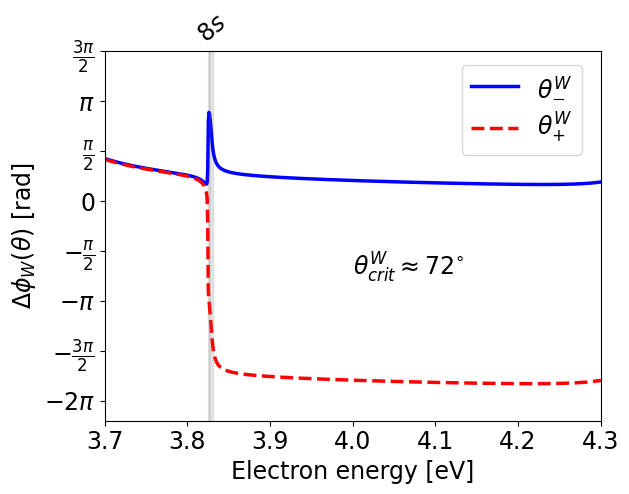

In [55]:
fontsize = "17"


angles = [71, 73]

en, phase_ang_w = wigner.get_wigner_phase(
    one_photon_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    g_omega_IR,
    angles,
    one_photon_2=one_photon_abs,
    g_omega_IR_2=g_omega_IR,
    energies_mode="abs"
)

en_low_en, phase_ang_w_low_en = wigner.get_wigner_phase(
    one_photon_emi,
    hole_n_6p3half,
    hole_kappa_6p3half,
    Z,
    g_omega_IR,
    angles,
    one_photon_2=one_photon_low_en,
    g_omega_IR_2=g_omega_IR,
    energies_mode="abs"
)

phase_ang_w_low_en[0, :] += 2 * np.pi

region_mask = np.logical_and(en >= 3.5, en < 4.9)
region_mask_low_en = np.logical_and(en_low_en >= 3.3, en_low_en < 3.5)

en_concat = np.concatenate((en_low_en[region_mask_low_en], en[region_mask]))
phase_ang_w_concat = np.zeros((len(angles), len(en_concat)))

for i in range(len(angles)):
    phase_ang_w_concat[i, :] = np.concatenate((phase_ang_w_low_en[i, region_mask_low_en], phase_ang_w[i, region_mask]))


line_styles = ["solid", "--", "dashdot", (3, (2, 1))]

cmap = blue_red_cmap(4)

colors = ["blue", "red", "black", "green"]
labels=["$\\theta_{-}^{W}$", "$\\theta_{+}^{W}$"]
for i in range(len(angles)):
    plt.plot(en_concat, phase_ang_w_concat[i, :], color=colors[i], linewidth=2.5, linestyle=line_styles[i], label=labels[i])

plt.text(4, -3 * np.pi / 4, "$\\theta_{crit}^W \\approx 72^{\\circ}$", fontsize=fontsize);
plt.legend(fontsize=fontsize, loc=(0.72, 0.72));

ax= plt.gca()
ymin, ymax = ax.get_ylim()
ymin = -2.2 * np.pi 
ymax = 3 * np.pi / 2
ax.set_ylim([ymin, ymax])
ax.set_ymargin(0)
ax.set_xmargin(0)
for i, (r, width, name, _) in enumerate(rn_resonances[2:3]):
    r += g_omega_IR_eV
    plt.fill_betweenx([ymin, ymax], r-width/2,r+width/2, color="gray", alpha=.2)
    ax.plot([r, r],[ymin,ymax], color="gray",alpha=.2)
    if name == "$8d$":
        ax.text((r - 0.1 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    elif name == "$10s$":
        ax.text((r - 8.5 * width), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)
    else:
        ax.text((r - 0.02), ymax+(ymax-ymin)/40, name, rotation=40, fontsize=fontsize)

plt.xlabel("Electron energy [eV]", fontsize=fontsize);
plt.ylabel("$\\Delta \\phi_W(\\theta)$ [rad]", fontsize=fontsize);
major = Multiple(2, np.pi, '\\pi')
minor = Multiple(16, np.pi, '\\pi')
ax.yaxis.set_major_locator(major.locator())
ax.yaxis.set_major_formatter(major.formatter())

plt.xticks([3.3 + i * 0.1 for i in range(17)],fontsize=fontsize);
plt.yticks(fontsize=fontsize);
plt.xlim([3.7, 4.3])

plt.savefig(f"wigner_ang_8s_crit.pdf", format="pdf", bbox_inches="tight")
